In [1]:
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
file_path = '/Users/xinyingjinzhu/Desktop/PROJECT/Glovo Product Recommendation Survey.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet0')
print(df.head())

             StartDate              EndDate         Status      IPAddress  \
0           Start Date             End Date  Response Type     IP Address   
1  2024-07-17 05:33:21  2024-07-17 05:33:37              1            NaN   
2  2024-07-17 05:34:14  2024-07-17 05:34:51              0    94.119.32.6   
3  2024-07-17 05:51:29  2024-07-17 05:52:32              0  104.28.88.131   
4  2024-07-17 05:50:52  2024-07-17 05:58:01              0   144.82.8.104   

   Progress  Duration (in seconds)  Finished                RecordedDate  \
0  Progress  Duration (in seconds)  Finished               Recorded Date   
1       100                     15         1  2024-07-17 05:33:37.777000   
2       100                     37         1  2024-07-17 05:34:52.228000   
3       100                     63         1  2024-07-17 05:52:33.354000   
4       100                    428         1  2024-07-17 05:58:02.023000   

          ResponseId    RecipientLastName  ...                            Oil  \

In [3]:
# Define the mapping of numbers to models
model_mapping = {
    1: ["Sentence Transformers"],
    2: ["BERT", "Hybrid"], 
    3: ["TF-IDF"],
    4: ["Word2vec"]
}

# Function to map and count models
def map_models(value):
    if pd.isna(value):
        return []
    models = []
    for v in str(value).split(','):
        v = v.strip() 
        if v.isdigit(): 
            model_number = int(v)
            if model_number in model_mapping:
                models.extend(model_mapping[model_number])
    return models

all_models = df['freezer bag'].apply(map_models).sum()
model_counts = pd.Series(all_models).value_counts()
print(model_counts)

Sentence Transformers    82
BERT                     24
Hybrid                   24
TF-IDF                   12
Word2vec                  7
dtype: int64


In [5]:
# Define the mapping of numbers to models for the columns 'Cheese', 'Oil', 'Baking Powder', 'Loin'
specific_model_mapping = {
    1: ["Word2vec"],
    2: ["TF-IDF"],
    3: ["BERT"],
    4: ["Hybrid"],
    5: ["Sentence Transformers"]
}

# Function to map and count models
def map_models(value, model_mapping):
    if pd.isna(value):
        return []
    
    models = []
    for v in str(value).split(','):
        v = v.strip() 
        if v.isdigit(): 
            model_number = int(v)
            if model_number in model_mapping:
                models.extend(model_mapping[model_number])
    return models

# List of item columns with specific model mappings
specific_item_columns = ['Cheese', 'Oil', 'Baking Powder', 'lomo']

specific_item_model_counts = {}

for item in specific_item_columns:
    all_models = df[item].apply(lambda x: map_models(x, specific_model_mapping)).sum()
    model_counts = pd.Series(all_models).value_counts()
    specific_item_model_counts[item] = model_counts

# Convert the dictionary to a contingency table
specific_contingency_table = pd.DataFrame(specific_item_model_counts).fillna(0)
print(specific_contingency_table)

                       Cheese  Oil  Baking Powder  lomo
BERT                       15    8             21    12
Hybrid                     17    6             20    13
Sentence Transformers      34   64             57    64
TF-IDF                     42   34             15    10
Word2vec                   33   15              8    29


In [6]:
# Define the mapping of numbers to models for the 'liqueur' column
liqueur_model_mapping = {
    1: ["Word2vec"],
    2: ["TF-IDF"],
    3: ["BERT", "Hybrid"],  # BERT and Hybrid are combined for choice 3
    4: ["Sentence Transformers"]
}

def map_models(value, model_mapping):
    if pd.isna(value):
        return []
    
    models = []
    for v in str(value).split(','):
        v = v.strip() 
        if v.isdigit(): 
            model_number = int(v)
            if model_number in model_mapping:
                models.extend(model_mapping[model_number])
    return models

all_models = df['liqueur'].apply(lambda x: map_models(x, liqueur_model_mapping)).sum()
model_counts = pd.Series(all_models).value_counts()
print(model_counts)

BERT                     40
Hybrid                   40
Sentence Transformers    37
Word2vec                 22
TF-IDF                   18
dtype: int64


In [7]:
# Define the mapping of numbers to models for 'sardines', 'oat milk', 'hot dog bread'
product_model_mapping = {
    1: ["Word2vec", "TF-IDF"],  # Choice 1 maps to both Word2vec and TF-IDF
    2: ["BERT", "Hybrid"],      # Choice 2 maps to both BERT and Hybrid
    3: ["Sentence Transformers"] # Choice 3 maps to Sentence Transformers
}

def map_models(value, model_mapping):
    if pd.isna(value):
        return []
    
    models = []
    for v in str(value).split(','):
        v = v.strip() 
        if v.isdigit(): 
            model_number = int(v)
            if model_number in model_mapping:
                models.extend(model_mapping[model_number])
    return models

# List of item columns with the same mapping
product_columns = ['sardines', 'oat milk', 'hot dog bread']

product_model_counts = {}

for item in product_columns:
    all_models = df[item].apply(lambda x: map_models(x, product_model_mapping)).sum()
    model_counts = pd.Series(all_models).value_counts()
    product_model_counts[item] = model_counts

product_contingency_table = pd.DataFrame(product_model_counts).fillna(0)
print(product_contingency_table)

                       sardines  oat milk  hot dog bread
Sentence Transformers        70        75             80
BERT                         25        33             19
Hybrid                       25        33             19
Word2vec                     20        10             18
TF-IDF                       20        10             18


In [8]:
# Create individual Series for each item
freezer_bag_counts = pd.Series({
    'Sentence Transformers': 82,
    'BERT': 24,
    'Hybrid': 24,
    'TF-IDF': 12,
    'Word2vec': 7
})

cheese_oil_baking_lomo_counts = pd.DataFrame({
    'Cheese': [33, 42, 34, 17, 15],
    'Oil': [15, 34, 64, 6, 8],
    'Baking Powder': [8, 15, 57, 20, 21],
    'lomo': [29, 10, 64, 13, 12]
}, index=['Word2vec', 'TF-IDF', 'Sentence Transformers', 'Hybrid', 'BERT'])

liqueur_counts = pd.Series({
    'BERT': 40,
    'Hybrid': 40,
    'Sentence Transformers': 37,
    'Word2vec': 22,
    'TF-IDF': 18
})

sardines_oat_hotdog_counts = pd.DataFrame({
    'sardines': [20, 20, 70, 25, 25],
    'oat milk': [10, 10, 75, 33, 33],
    'hot dog bread': [18, 18, 80, 19, 19]
}, index=['Word2vec', 'TF-IDF', 'Sentence Transformers', 'BERT', 'Hybrid'])

# Combine all into one dataframe
combined_df = pd.DataFrame({
    'freezer bag': freezer_bag_counts,
    'Cheese': cheese_oil_baking_lomo_counts['Cheese'],
    'Oil': cheese_oil_baking_lomo_counts['Oil'],
    'Baking Powder': cheese_oil_baking_lomo_counts['Baking Powder'],
    'lomo': cheese_oil_baking_lomo_counts['lomo'],
    'liqueur': liqueur_counts,
    'sardines': sardines_oat_hotdog_counts['sardines'],
    'oat milk': sardines_oat_hotdog_counts['oat milk'],
    'hot dog bread': sardines_oat_hotdog_counts['hot dog bread']
})

# Fill NaN values with 0 
combined_df = combined_df.fillna(0)
print(combined_df)

                       freezer bag  Cheese  Oil  Baking Powder  lomo  liqueur  \
BERT                            24      15    8             21    12       40   
Hybrid                          24      17    6             20    13       40   
Sentence Transformers           82      34   64             57    64       37   
TF-IDF                          12      42   34             15    10       18   
Word2vec                         7      33   15              8    29       22   

                       sardines  oat milk  hot dog bread  
BERT                         25        33             19  
Hybrid                       25        33             19  
Sentence Transformers        70        75             80  
TF-IDF                       20        10             18  
Word2vec                     20        10             18  


In [9]:
# Contingency table 
contingency_table = np.array([
    [7, 12, 24, 24, 82],  # Freezer Bags
    [33, 42, 15, 17, 34],   # Sheep Cheese
    [15, 34, 8, 6, 64],   # Food Oil
    [8, 15, 21, 20, 57],    # Baking Powder
    [22, 18, 40, 40, 37],   # Alcohol Free Liqueur
    [29, 10, 12, 13, 64],   # Iberian Cebo Lomo
    [20, 20, 25, 25, 70],   # Sardines
    [10, 10, 33, 33, 75],  # Oat Milk
    [18, 18, 19, 19, 80]   # Hot Dog Bread
])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}, degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-Square: 187.79867883017198, p-value: 5.862022151873326e-24, degrees of freedom: 32
Expected frequencies:
[[18.596302   20.54776579 22.61402157 22.61402157 64.62788906]
 [17.59784284 19.44453005 21.39984592 21.39984592 61.15793529]
 [15.85053929 17.51386749 19.27503852 19.27503852 55.08551618]
 [15.10169492 16.68644068 18.36440678 18.36440678 52.48305085]
 [19.59476117 21.65100154 23.82819723 23.82819723 68.09784284]
 [15.97534669 17.65177196 19.42681048 19.42681048 55.5192604 ]
 [19.96918336 22.06471495 24.2835131  24.2835131  69.3990755 ]
 [20.09399076 22.20261941 24.43528505 24.43528505 69.83281972]
 [19.22033898 21.23728814 23.37288136 23.37288136 66.79661017]]


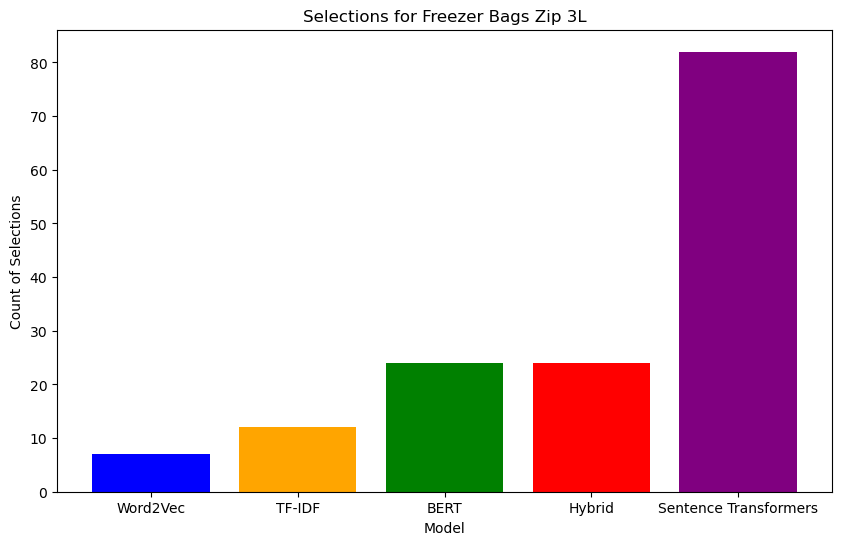

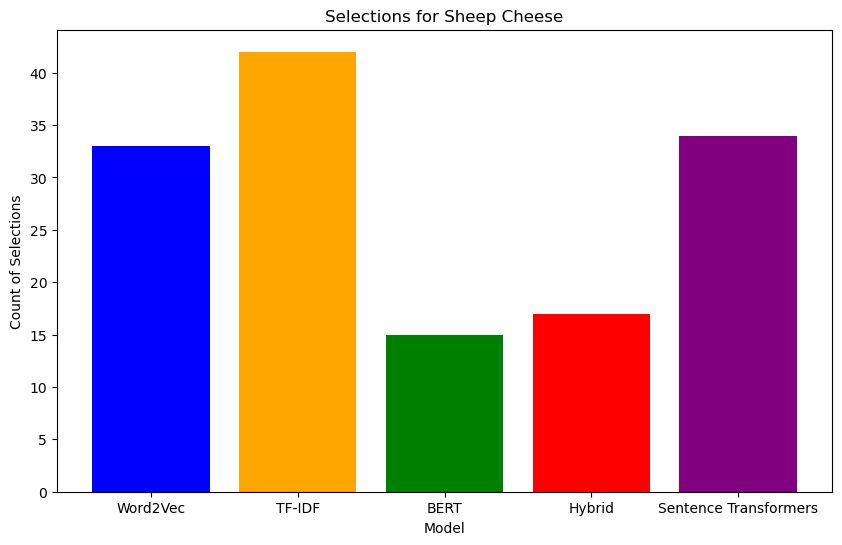

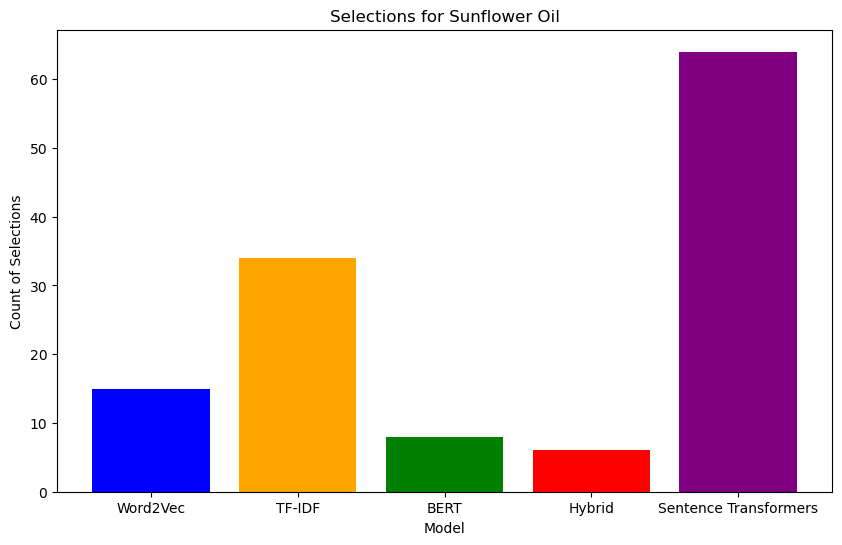

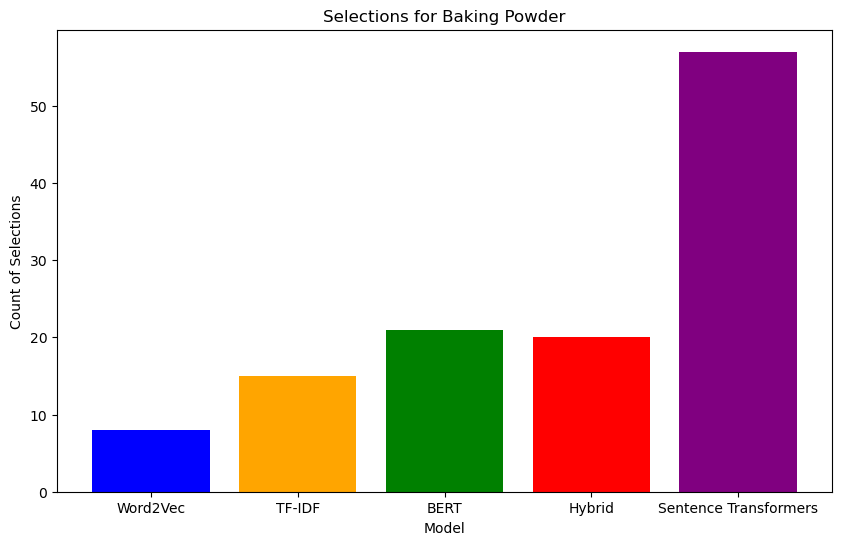

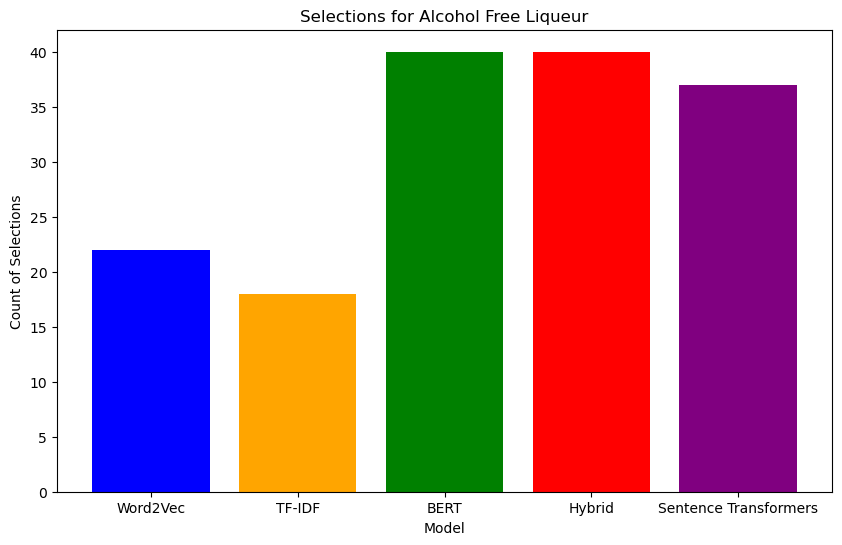

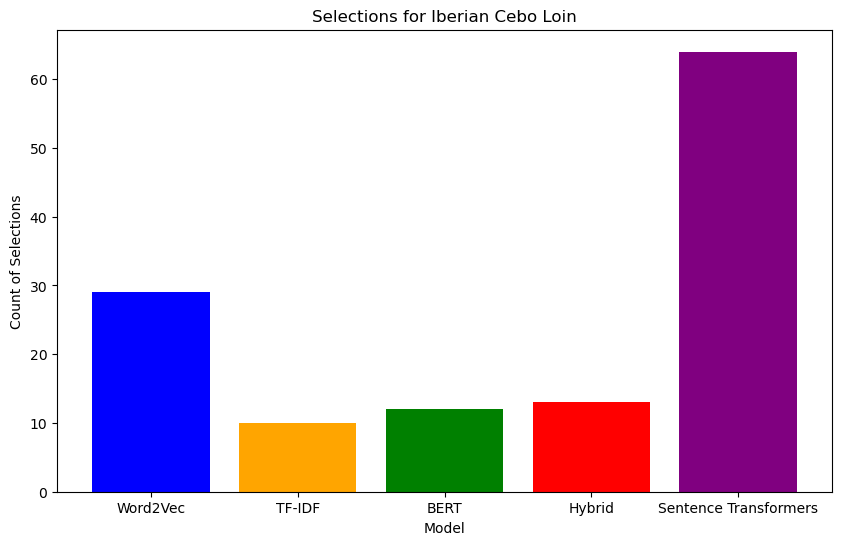

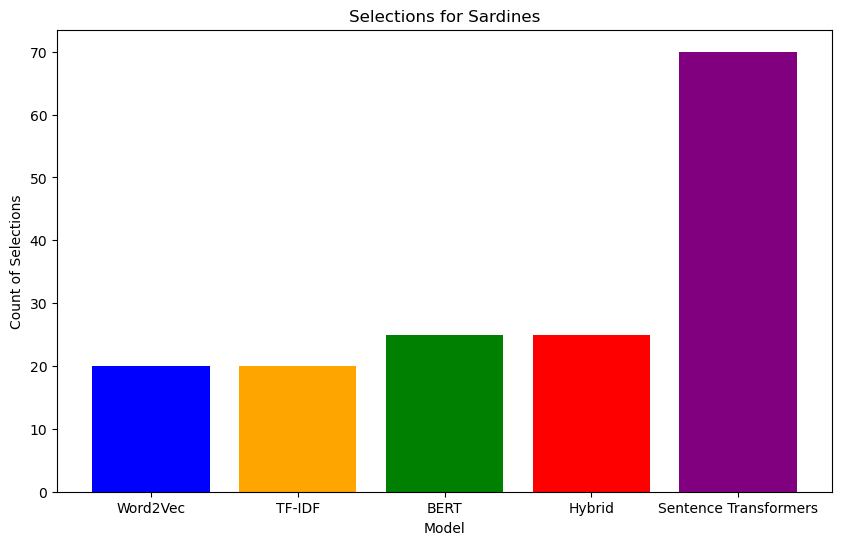

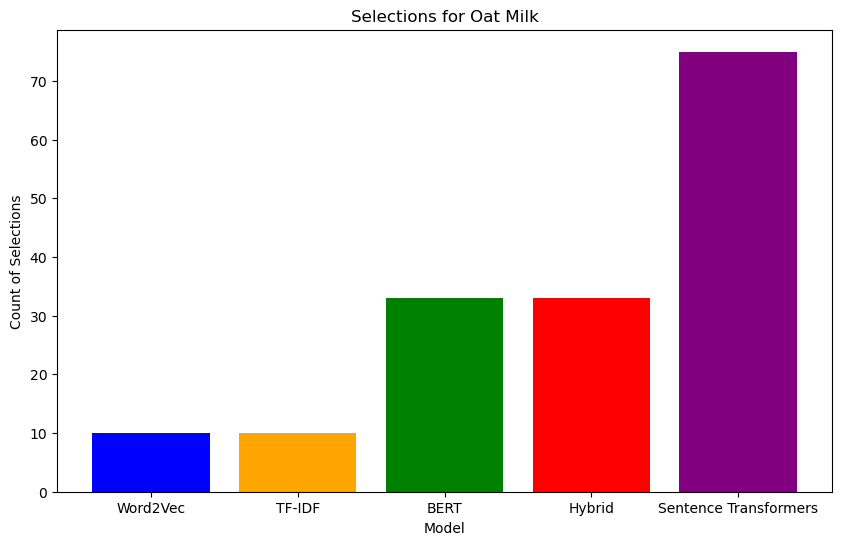

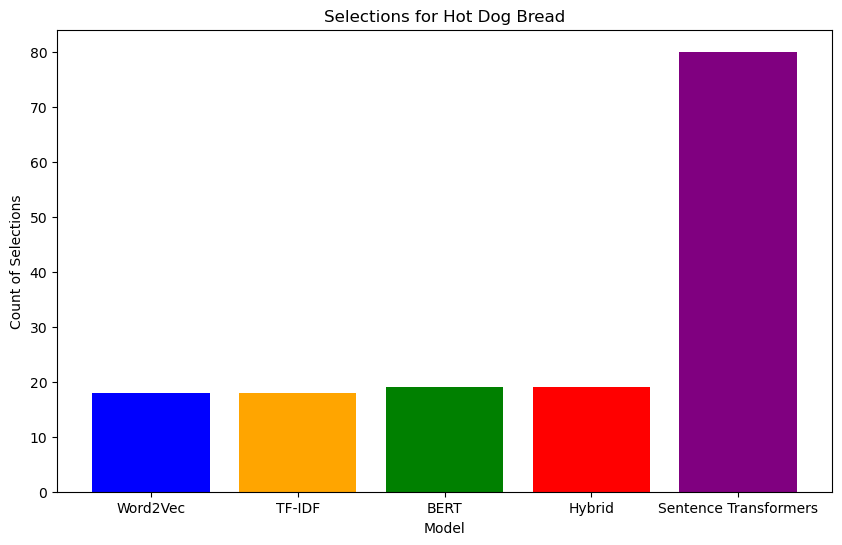

In [11]:
models = ['Word2Vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']
items = [
    'Freezer Bags Zip 3L', 'Sheep Cheese', 'Sunflower Oil', 'Baking Powder',
    'Alcohol Free Liqueur', 'Iberian Cebo Loin', 'Sardines', 'Oat Milk', 'Hot Dog Bread'
]

# Create bar charts for each item
for i, item in enumerate(items):
    counts = contingency_table[i]
    plt.figure(figsize=(10, 6))
    plt.bar(models, counts, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.xlabel('Model')
    plt.ylabel('Count of Selections')
    plt.title(f'Selections for {item}')
    plt.show()

Total selections for each model:
[162 179 197 197 563]


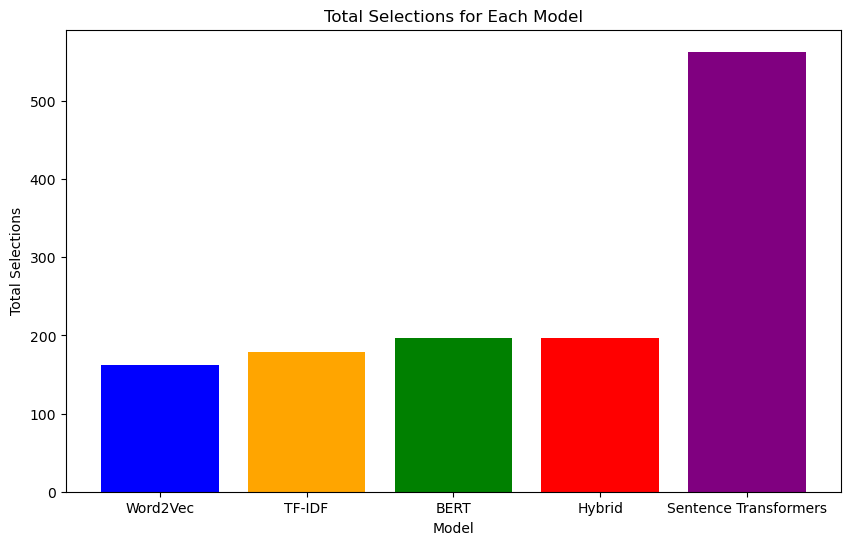

In [12]:
# Summarize total counts for each model
total_model_counts = contingency_table.sum(axis=0)
print("Total selections for each model:")
print(total_model_counts)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, total_model_counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Total Selections')
plt.title('Total Selections for Each Model')
plt.show()

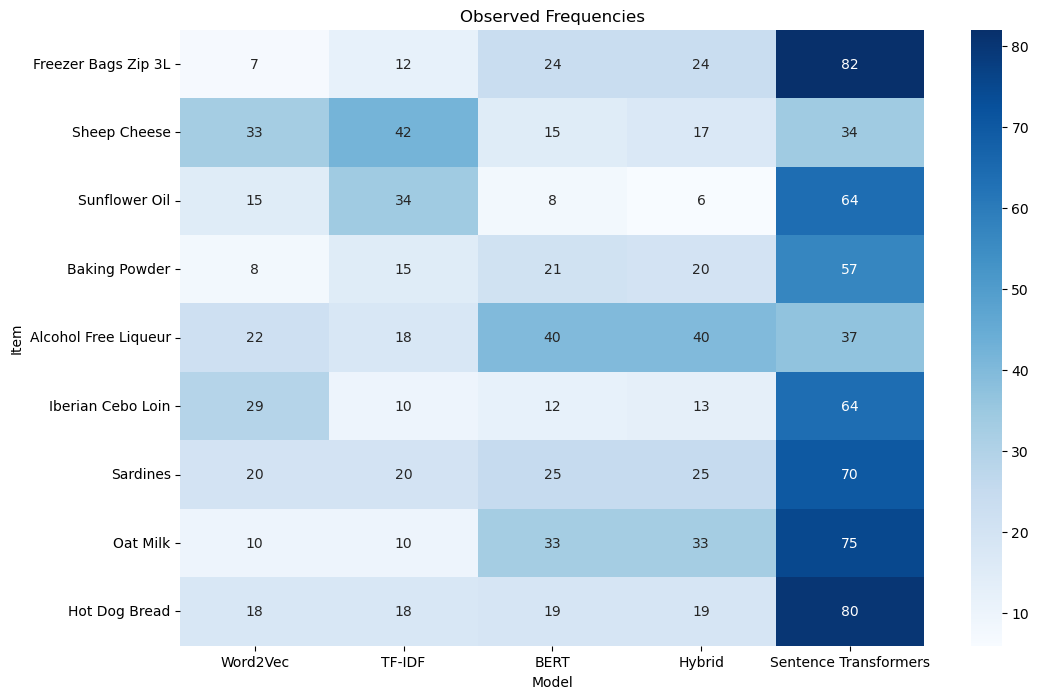

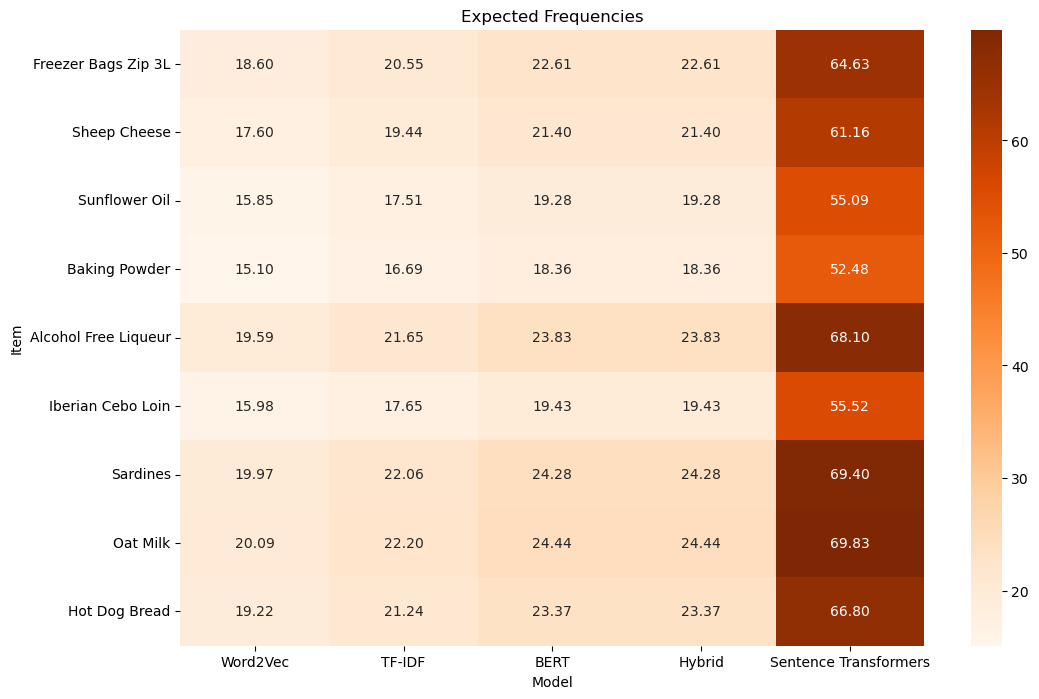

In [13]:
# Calculate expected frequencies using chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

models = ['Word2Vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']
items = [
    'Freezer Bags Zip 3L', 'Sheep Cheese', 'Sunflower Oil', 'Baking Powder',
    'Alcohol Free Liqueur', 'Iberian Cebo Loin', 'Sardines', 'Oat Milk', 'Hot Dog Bread'
]

# Heatmap of observed frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', xticklabels=models, yticklabels=items)
plt.title('Observed Frequencies')
plt.xlabel('Model')
plt.ylabel('Item')
plt.show()

# Heatmap of expected frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(expected, annot=True, fmt='.2f', cmap='Oranges', xticklabels=models, yticklabels=items)
plt.title('Expected Frequencies')
plt.xlabel('Model')
plt.ylabel('Item')
plt.show()

In [14]:
# Perform pairwise chi-square tests
for i in range(len(models)):
    for j in range(i + 1, len(models)):
        sub_table = contingency_table[:, [i, j]]
        chi2, p, dof, expected = chi2_contingency(sub_table)
        print(f'Chi-Square Test between {models[i]} and {models[j]}: chi2 = {chi2}, p = {p}')

Chi-Square Test between Word2Vec and TF-IDF: chi2 = 20.754055393125313, p = 0.007830262665212235
Chi-Square Test between Word2Vec and BERT: chi2 = 46.21712929825626, p = 2.1614153177723102e-07
Chi-Square Test between Word2Vec and Hybrid: chi2 = 44.66077291669311, p = 4.2668368026638277e-07
Chi-Square Test between Word2Vec and Sentence Transformers: chi2 = 61.15652100172949, p = 2.7629667271998815e-10
Chi-Square Test between TF-IDF and BERT: chi2 = 54.559601148669884, p = 5.376197954427012e-09
Chi-Square Test between TF-IDF and Hybrid: chi2 = 55.7947121677347, p = 3.0927767536967536e-09
Chi-Square Test between TF-IDF and Sentence Transformers: chi2 = 69.11328223900934, p = 7.37735999947442e-12
Chi-Square Test between BERT and Hybrid: chi2 = 0.4751045296167248, p = 0.9998901948821418
Chi-Square Test between BERT and Sentence Transformers: chi2 = 44.19718961713234, p = 5.221710913288254e-07
Chi-Square Test between Hybrid and Sentence Transformers: chi2 = 47.0159217323789, p = 1.5227025200

In [15]:
# Contingency table for the four items where BERT and Hybrid differ
contingency_table_diff = np.array([
    [33, 42, 15, 17, 34],   # Sheep Cheese
    [15, 34, 8, 6, 64],   # Food Oil
    [8, 15, 21, 20, 57],    # Baking Powder
    [29, 10, 12, 13, 64]    # Iberian Cebo Lomo
])

# Perform Chi-Square test
chi2_diff, p_diff, dof_diff, expected_diff = chi2_contingency(contingency_table_diff)

print(f"Chi-Square: {chi2_diff}, p-value: {p_diff}, degrees of freedom: {dof_diff}")
print("Expected frequencies:")
print(expected_diff)

Chi-Square: 70.17439285060117, p-value: 2.9711591735495524e-10, degrees of freedom: 12
Expected frequencies:
[[23.18181818 27.54545455 15.27272727 15.27272727 59.72727273]
 [20.88007737 24.81044487 13.75628627 13.75628627 53.79690522]
 [19.89361702 23.63829787 13.10638298 13.10638298 51.25531915]
 [21.04448743 25.00580271 13.86460348 13.86460348 54.2205029 ]]


In [16]:
# Extract the columns for BERT (3rd column) and Hybrid (4th column)
bert_data = contingency_table_diff[:, 2]
hybrid_data = contingency_table_diff[:, 3]

# Create a new contingency table for just BERT and Hybrid
bert_vs_hybrid = np.vstack([bert_data, hybrid_data]).T

# Perform Chi-Square test for BERT vs Hybrid
chi2_bert_hybrid, p_bert_hybrid, dof_bert_hybrid, expected_bert_hybrid = chi2_contingency(bert_vs_hybrid)

print(f"Chi-Square: {chi2_bert_hybrid}, p-value: {p_bert_hybrid}, degrees of freedom: {dof_bert_hybrid}")
print("Expected frequencies:")
print(expected_bert_hybrid)

Chi-Square: 0.4751045296167247, p-value: 0.9243257899406634, degrees of freedom: 3
Expected frequencies:
[[16.  16. ]
 [ 7.   7. ]
 [20.5 20.5]
 [12.5 12.5]]


Even when BERT and Hybrid recommended different items, participants perceived them as relatively equivalent in terms of the quality or relevance of the recommendations. This finding aligns with the earlier observation that BERT and Hybrid often provided similar recommendations, which might explain why they were perceived as comparable by participants.

In [17]:
# Contingency table for the six items where Word2Vec and TF-IDF differ
contingency_table_diff = np.array([
    [7, 12, 24, 24, 82],  # Freezer Bags
    [33, 42, 15, 17, 34],   # Sheep Cheese
    [15, 34, 8, 6, 64],   # Food Oil
    [8, 15, 21, 20, 57],    # Baking Powder
    [22, 18, 40, 40, 37],   # Alcohol Free Liqueur
    [29, 10, 12, 13, 64]    # Iberian Cebo Lomo
])

# Perform Chi-Square test
chi2_diff, p_diff, dof_diff, expected_diff = chi2_contingency(contingency_table_diff)

print(f"Chi-Square: {chi2_diff}, p-value: {p_diff}, degrees of freedom: {dof_diff}")
print("Expected frequencies:")
print(expected_diff)

Chi-Square: 153.3965812162874, p-value: 1.4029647926773588e-22, degrees of freedom: 20
Expected frequencies:
[[20.63912515 23.71688943 21.7253949  21.7253949  61.19319563]
 [19.5309842  22.44349939 20.55893074 20.55893074 57.90765492]
 [17.59173755 20.21506683 18.51761847 18.51761847 52.15795869]
 [16.76063183 19.2600243  17.64277035 17.64277035 49.69380316]
 [21.7472661  24.99027947 22.89185905 22.89185905 64.47873633]
 [17.73025516 20.37424058 18.66342649 18.66342649 52.56865128]]


In [18]:
# Extract the columns for Word2Vec (1st column) and TF-IDF (2nd column)
word2vec_data = contingency_table_diff[:, 0]
tfidf_data = contingency_table_diff[:, 1]

# Create a new contingency table for just BERT and Hybrid
word2vec_vs_tfidf = np.vstack([word2vec_data, tfidf_data]).T

# Perform Chi-Square test for BERT vs Hybrid
chi2_word2vec_tfidf, p_word2vec_tfidf, dof_word2vec_tfidf, expected_word2vec_tfidf = chi2_contingency(word2vec_vs_tfidf)

print(f"Chi-Square: {chi2_word2vec_tfidf}, p-value: {p_word2vec_tfidf}, degrees of freedom: {dof_word2vec_tfidf}")
print("Expected frequencies:")
print(expected_word2vec_tfidf)

Chi-Square: 20.468940615792945, p-value: 0.0010201728532176497, degrees of freedom: 5
Expected frequencies:
[[ 8.84081633 10.15918367]
 [34.89795918 40.10204082]
 [22.8        26.2       ]
 [10.70204082 12.29795918]
 [18.6122449  21.3877551 ]
 [18.14693878 20.85306122]]


There is a statistically significant difference in how participants responded to the recommendations from Word2Vec and TF-IDF when only considering the six items where their recommendations differed.

This result suggests that participants did have a clear preference between Word2Vec and TF-IDF for the items where the models provided different recommendations. The significant Chi-Square statistic confirms that the difference in user preferences is not due to random chance.

In [19]:
# Total responses 
total_responses = 111 * 9  # 111 participants, 9 items each

# Proportion calculation
model_selections = {
    'Word2Vec': 162,
    'TF-IDF': 179,
    'BERT': 197,
    'Hybrid': 197,
    'Sentence Transformers': 563
}

model_proportions = {model: count / total_responses for model, count in model_selections.items()}
print(model_proportions)

{'Word2Vec': 0.16216216216216217, 'TF-IDF': 0.17917917917917917, 'BERT': 0.1971971971971972, 'Hybrid': 0.1971971971971972, 'Sentence Transformers': 0.5635635635635635}


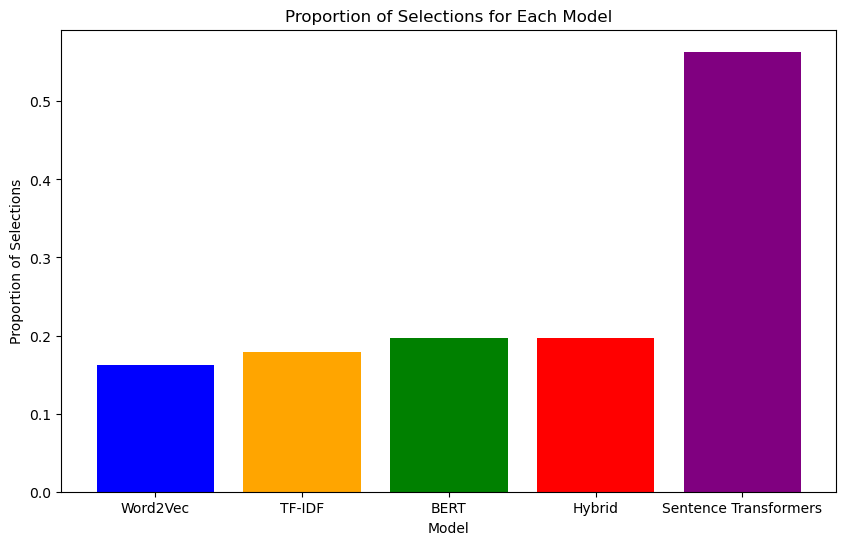

In [20]:
# Data for plotting
models = list(model_proportions.keys())
proportions = list(model_proportions.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, proportions, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Proportion of Selections')
plt.title('Proportion of Selections for Each Model')
plt.show()

In [21]:
# Inspect the demographic columns
demographic_columns = ['Q20', 'Q21', 'Q22']

print(df[demographic_columns].head())

         Q20     Q21                Q22
0  Age Group  Gender  Educational Level
1        NaN     NaN                NaN
2    20 - 30  Female            Masters
3    20 - 30  Female            Masters
4    20 - 30    Male            Masters


In [22]:
# Rename columns 
df.rename(columns={
    'Q20': 'Age Group',
    'Q21': 'Gender',
    'Q22': 'Educational Level',
}, inplace=True)

df = pd.read_excel(file_path, skiprows=1)

# Drop rows with NaN in any of the demographic columns
df.dropna(subset=['Age Group', 'Gender', 'Educational Level'], inplace=True)

# Inspect the cleaned DataFrame
print(df[['Age Group', 'Gender', 'Educational Level']].head())

  Age Group  Gender Educational Level
1   20 - 30  Female           Masters
2   20 - 30  Female           Masters
3   20 - 30    Male           Masters
4   20 - 30    Male           Masters
5   20 - 30  Female           Masters


In [23]:
# Analyse demographic distributions
age_group_distribution = df['Age Group'].value_counts()
gender_distribution = df['Gender'].value_counts()
education_level_distribution = df['Educational Level'].value_counts()

print("Age Group Distribution:")
print(age_group_distribution)
print("\nGender Distribution:")
print(gender_distribution)
print("\nEducational Level Distribution:")
print(education_level_distribution)

Age Group Distribution:
20 - 30     69
30 - 40     23
40 - 50      9
15 - 20      6
50 - 100     2
Name: Age Group, dtype: int64

Gender Distribution:
Male                         62
Female                       45
Non-binary / third gender     2
Name: Gender, dtype: int64

Educational Level Distribution:
Masters        48
Bachelors      41
High School    16
PhD             4
Name: Educational Level, dtype: int64


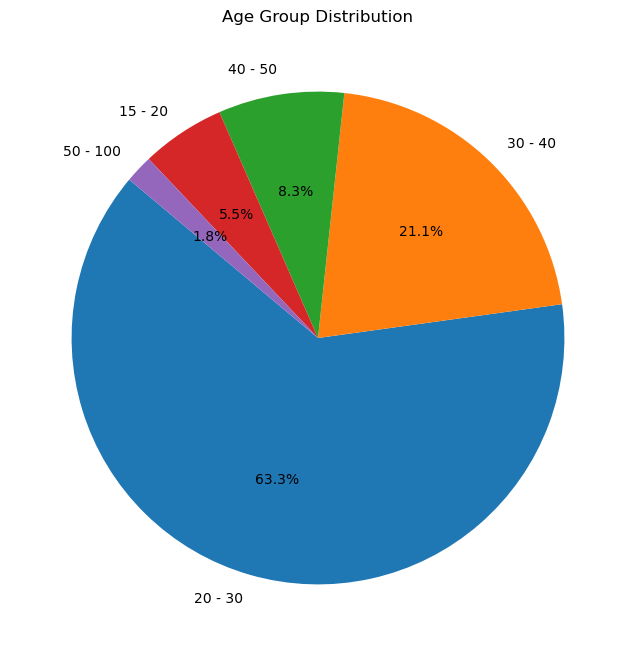

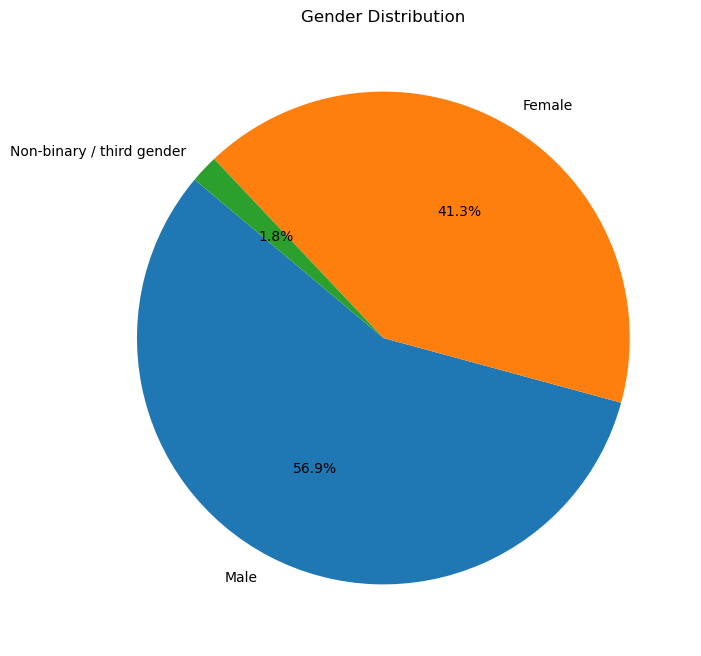

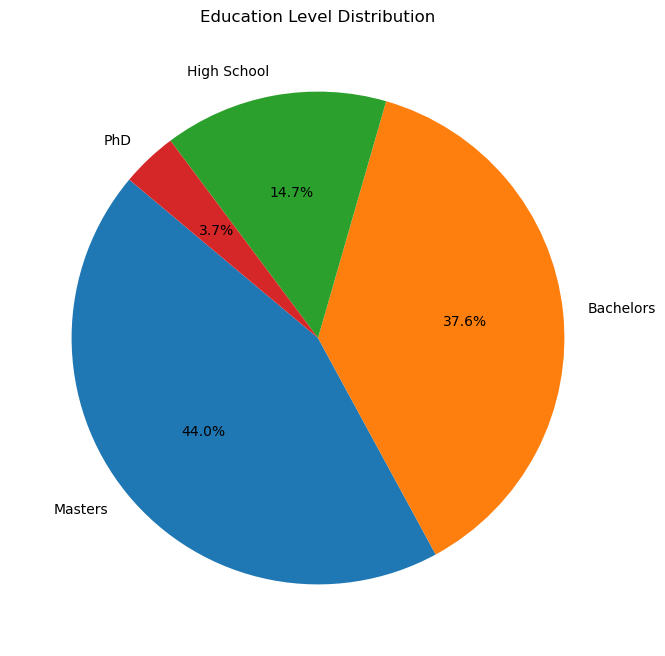

In [24]:
# Pie chart for Age Group
age_group_counts = df['Age Group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.show()

# Pie chart for Gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

# Pie chart for Education Level
education_counts = df['Educational Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Level Distribution')
plt.show()

In [25]:
print(df.columns)

Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language',
       'Freezer Bags Zip 3l Dia Pack 40 Pcs.',
       'Insolito El Cencerro Cured Sheep Cheese 200 Gr.',
       'Diasol Sunflower Food Oil 1 L',
       'Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr',
       'Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL',
       'Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena',
       'Albo Sardines In Olive Oil 85g', 'Oat Milk Natural Vegedia 1L',
       'Bimbo Hot Dog Bread 6u 330g', 'Age Group', 'Gender',
       'Educational Level'],
      dtype='object')


In [26]:
# Define the mappings for each item
freezer_bag_mapping = {
    1: ["Sentence Transformers"],
    2: ["BERT", "Hybrid"],
    3: ["TF-IDF"],
    4: ["Word2vec"]
}

specific_model_mapping = {
    1: ["Word2vec"],
    2: ["TF-IDF"],
    3: ["BERT"],
    4: ["Hybrid"],
    5: ["Sentence Transformers"]
}

liqueur_mapping = {
    1: ["Word2vec"],
    2: ["TF-IDF"],
    3: ["BERT", "Hybrid"],
    4: ["Sentence Transformers"]
}

product_mapping = {
    1: ["Word2vec", "TF-IDF"],
    2: ["BERT", "Hybrid"],
    3: ["Sentence Transformers"]
}

# Function to map models 
def apply_mapping(column, mapping):
    mapped_values = df[column].apply(lambda x: map_models(x, mapping))
    mapped_values = mapped_values.apply(lambda x: pd.Series(x, dtype='object') if isinstance(x, list) else pd.Series(dtype='object'))
    one_hot_df = pd.get_dummies(mapped_values.stack()).groupby(level=0).sum()
    return one_hot_df

# Apply the mapping to each item column
df_mapped = pd.concat([
    apply_mapping('Freezer Bags Zip 3l Dia Pack 40 Pcs.', freezer_bag_mapping),
    apply_mapping('Insolito El Cencerro Cured Sheep Cheese 200 Gr.', specific_model_mapping),
    apply_mapping('Diasol Sunflower Food Oil 1 L', specific_model_mapping),
    apply_mapping('Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr', specific_model_mapping),
    apply_mapping('Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena', specific_model_mapping),
    apply_mapping('Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL', liqueur_mapping),
    apply_mapping('Albo Sardines In Olive Oil 85g', product_mapping),
    apply_mapping('Oat Milk Natural Vegedia 1L', product_mapping),
    apply_mapping('Bimbo Hot Dog Bread 6u 330g', product_mapping)
], axis=1).fillna(0)

df_mapped = df_mapped.groupby(df_mapped.columns, axis=1).sum()
df_combined = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_mapped], axis=1)
print(df_combined.head())

  Age Group  Gender Educational Level  BERT  Hybrid  Sentence Transformers  \
1   20 - 30  Female           Masters   0.0     0.0                    9.0   
2   20 - 30  Female           Masters   2.0     1.0                    2.0   
3   20 - 30    Male           Masters   4.0     3.0                    1.0   
4   20 - 30    Male           Masters   1.0     2.0                    6.0   
5   20 - 30  Female           Masters   1.0     1.0                    7.0   

   TF-IDF  Word2vec  
1     0.0       0.0  
2     4.0       3.0  
3     1.0       4.0  
4     1.0       0.0  
5     1.0       0.0  


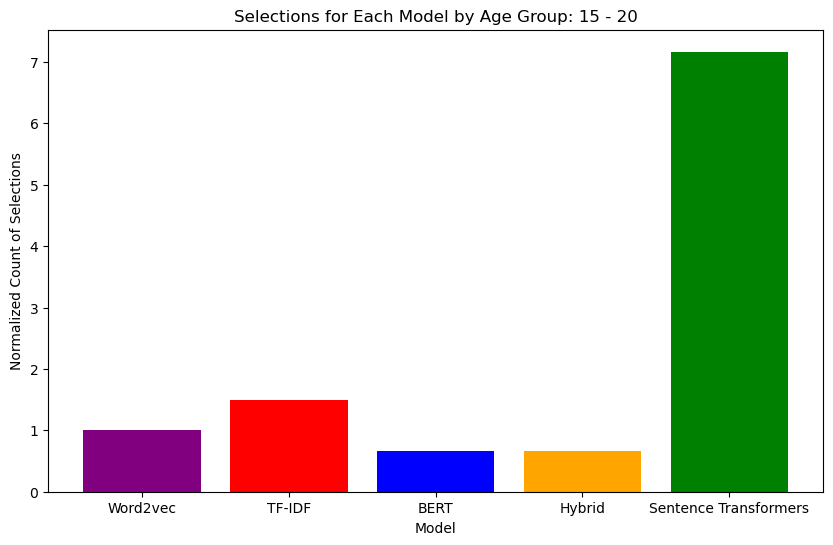

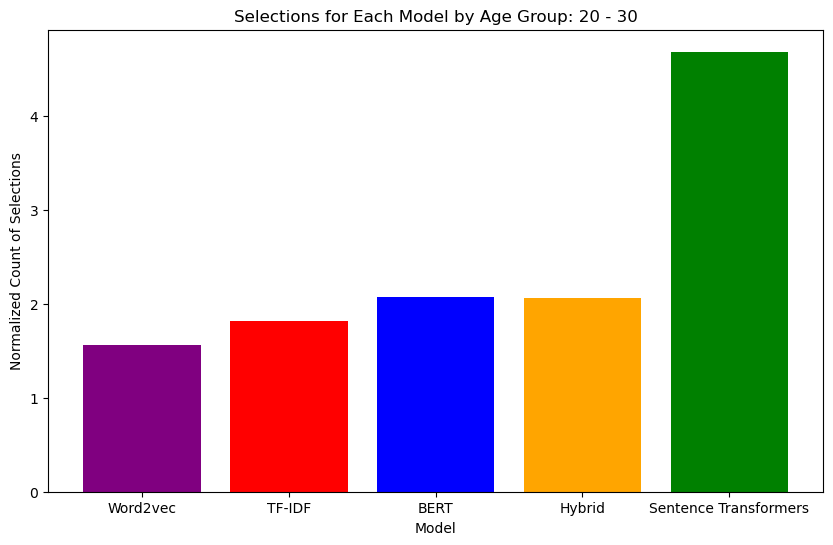

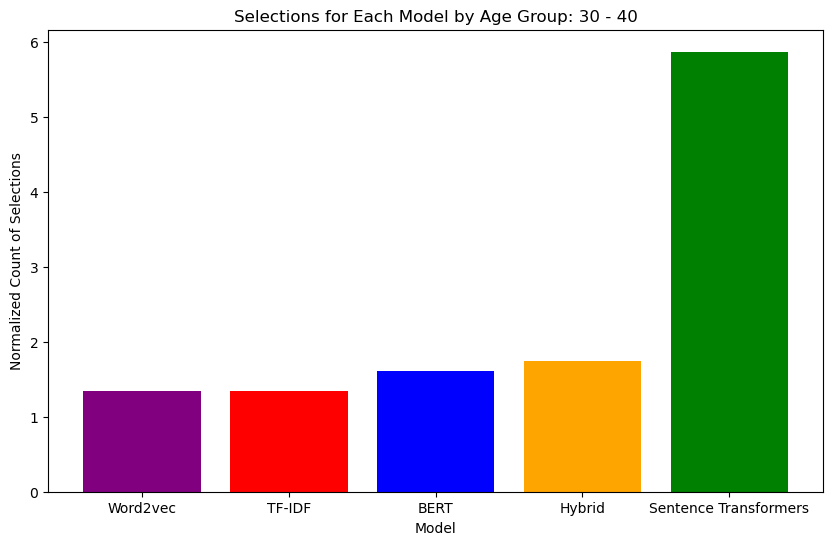

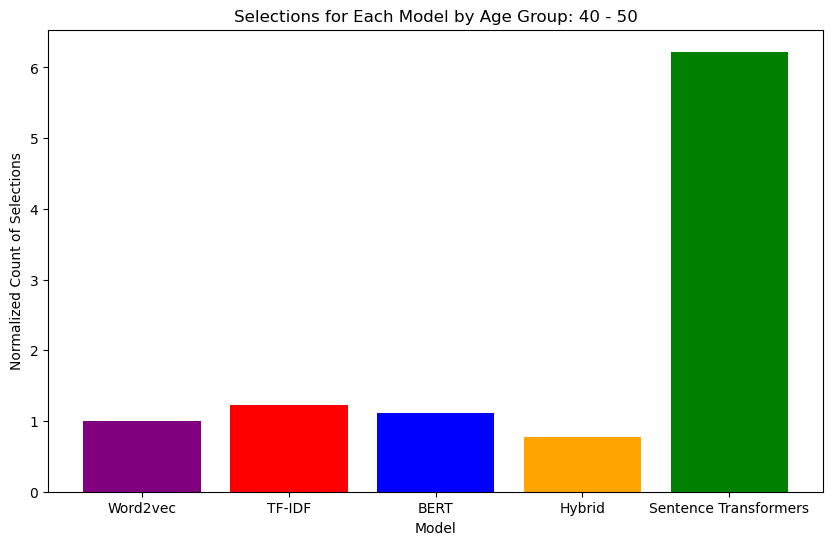

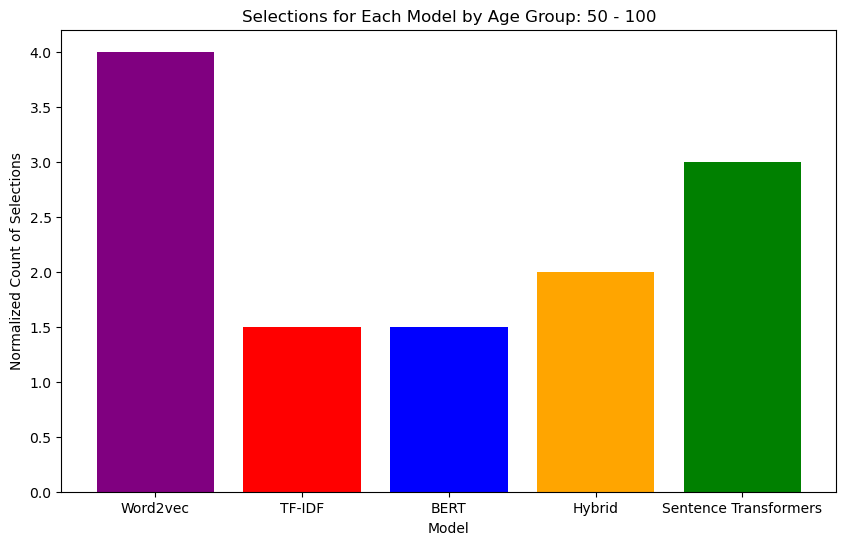

Chi-Square Test for Age Group:
Chi-Square Statistic: 50.49073739753415
p-value: 1.914244680974535e-05
Degrees of Freedom: 16


In [27]:
# Group by Age Group and sum the counts for each model
age_group_counts = df_combined.groupby('Age Group').sum(numeric_only=True)

# Count the number of respondents in each age group
respondents_per_age_group = df_combined['Age Group'].value_counts()

age_group_counts_normalized = age_group_counts.div(respondents_per_age_group, axis=0)

model_order = ['Word2vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']

# Plot bar charts 
for age_group in age_group_counts_normalized.index:
    counts = age_group_counts_normalized.loc[age_group]
    counts = counts[model_order] 
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values, color=['purple', 'red', 'blue', 'orange', 'green'])
    plt.xlabel('Model')
    plt.ylabel('Normalized Count of Selections')
    plt.title(f'Selections for Each Model by Age Group: {age_group}')
    plt.show()
    
# Perform Chi-Square test for the age groups
chi2_age, p_age, dof_age, expected_age = chi2_contingency(age_group_counts)

print(f"Chi-Square Test for Age Group:")
print(f"Chi-Square Statistic: {chi2_age}")
print(f"p-value: {p_age}")
print(f"Degrees of Freedom: {dof_age}")

Given the p-value is far below 0.05, we reject the null hypothesis, which assumes that the model selections are independent of age group. This suggests that age is a significant factor influencing the choice of models in the dataset.

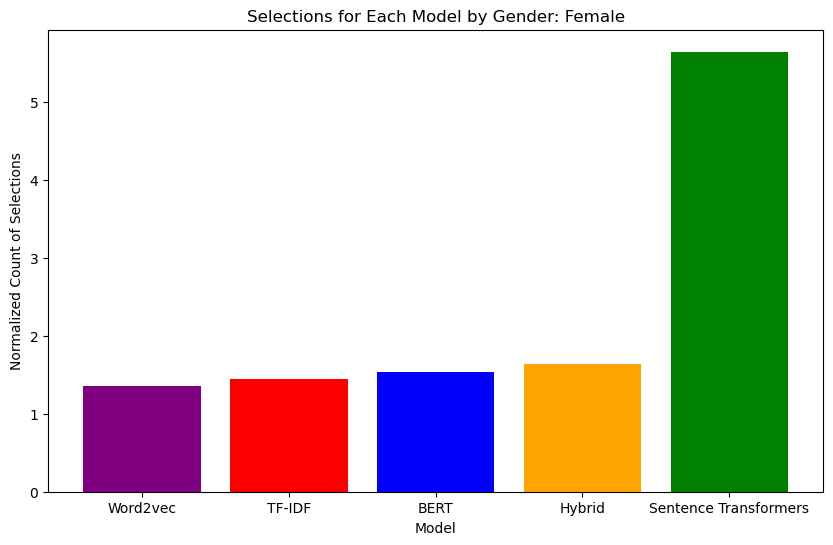

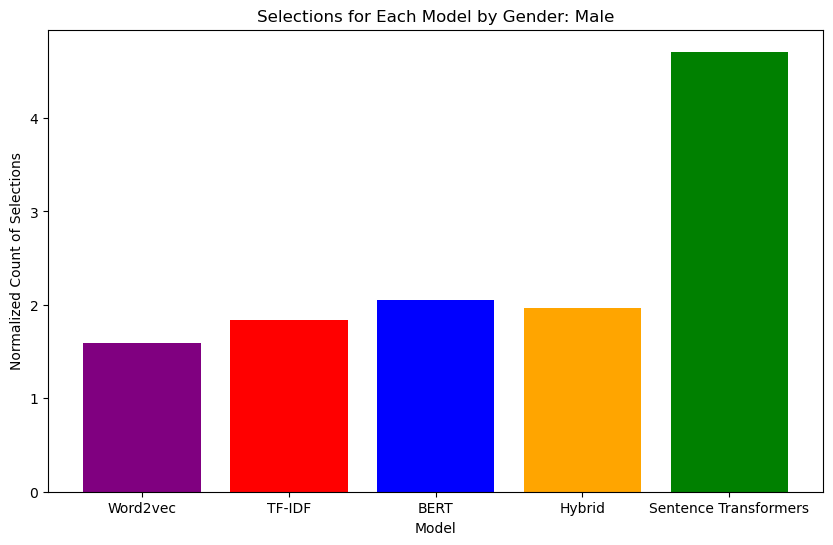

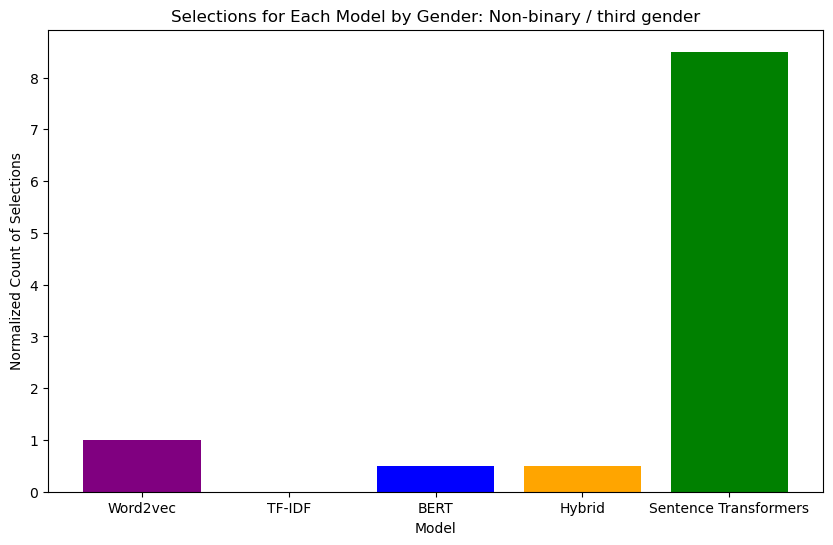

Chi-Square Test for Gender:
Chi-Square Statistic: 25.690451399815615
p-value: 0.0011863272889914194
Degrees of Freedom: 8


In [28]:
# Group by Gender and sum the counts for each model
gender_group_counts = df_combined.groupby('Gender').sum(numeric_only=True)

# Count the number of respondents in each gender group
respondents_per_gender = df_combined['Gender'].value_counts()

# Normalise
gender_group_counts_normalized = gender_group_counts.div(respondents_per_gender, axis=0)

model_order = ['Word2vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']

# Plot bar charts for each gender
for gender in gender_group_counts_normalized.index:
    counts = gender_group_counts_normalized.loc[gender]
    counts = counts[model_order] 
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values, color=['purple', 'red', 'blue', 'orange', 'green'])
    plt.xlabel('Model')
    plt.ylabel('Normalized Count of Selections')
    plt.title(f'Selections for Each Model by Gender: {gender}')
    plt.show()

# Perform Chi-Square test for the gender groups
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_group_counts)

print(f"Chi-Square Test for Gender:")
print(f"Chi-Square Statistic: {chi2_gender}")
print(f"p-value: {p_gender}")
print(f"Degrees of Freedom: {dof_gender}")

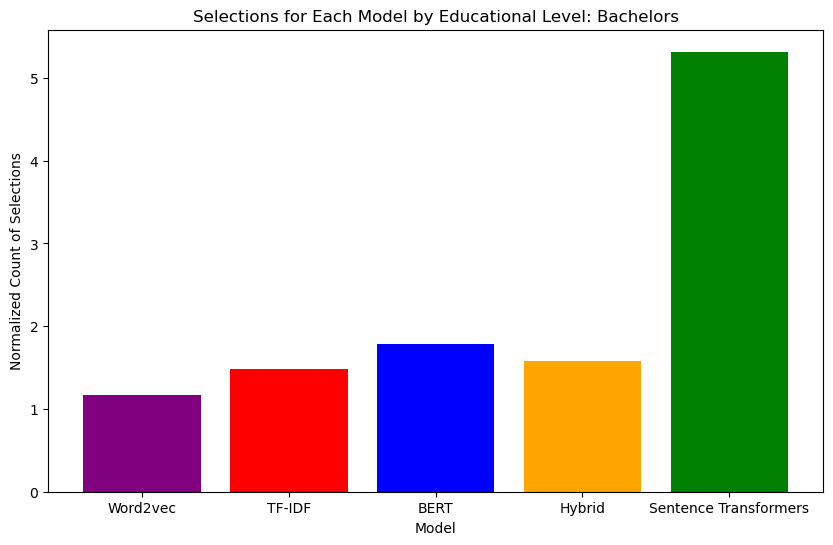

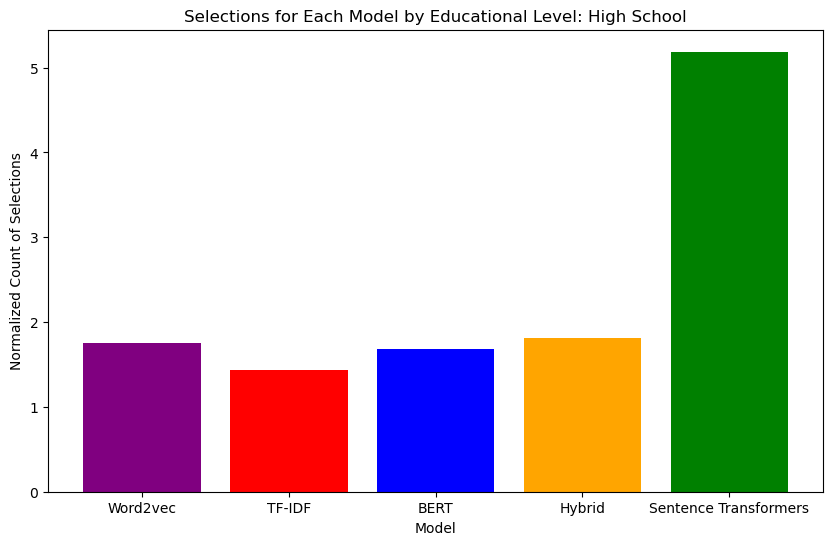

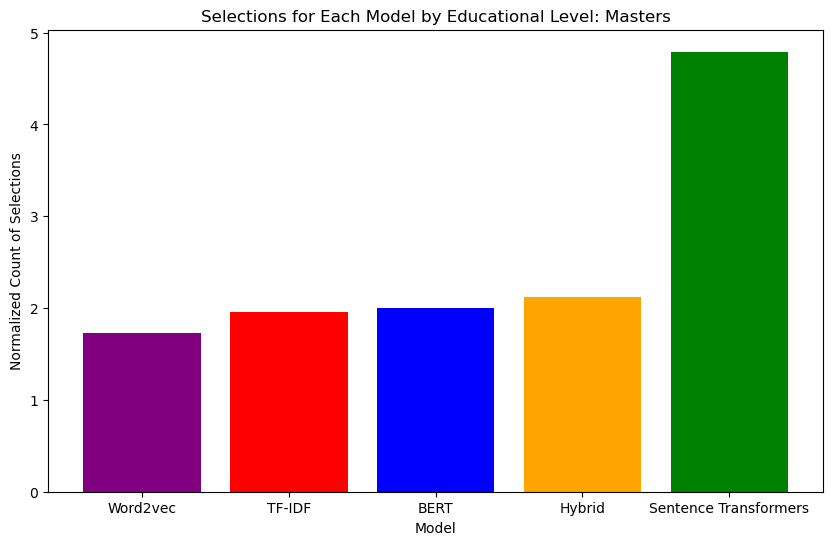

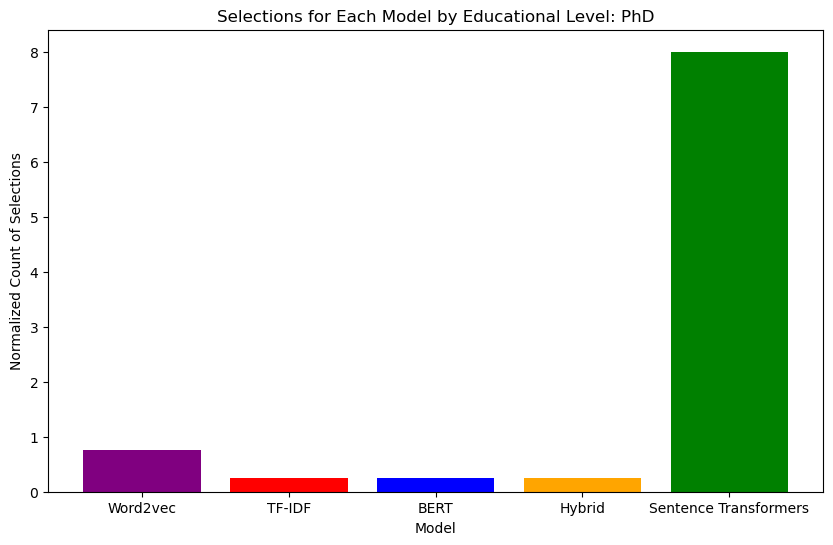

Chi-Square Test for Educational Level:
Chi-Square Statistic: 38.98512927905863
p-value: 0.00010582917174724924
Degrees of Freedom: 12


In [29]:
# Group by Educational Level and sum the counts for each model
education_group_counts = df_combined.groupby('Educational Level').sum(numeric_only=True)

# Count the number of respondents
respondents_per_education_level = df_combined['Educational Level'].value_counts()

# Normalise
education_group_counts_normalized = education_group_counts.div(respondents_per_education_level, axis=0)

model_order = ['Word2vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']

# Plot bar charts 
for education_level in education_group_counts_normalized.index:
    counts = education_group_counts_normalized.loc[education_level]
    counts = counts[model_order]
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values, color=['purple', 'red', 'blue', 'orange', 'green'])
    plt.xlabel('Model')
    plt.ylabel('Normalized Count of Selections')
    plt.title(f'Selections for Each Model by Educational Level: {education_level}')
    plt.show()

# Perform Chi-Square test 
chi2_education, p_education, dof_education, expected_education = chi2_contingency(education_group_counts)

print(f"Chi-Square Test for Educational Level:")
print(f"Chi-Square Statistic: {chi2_education}")
print(f"p-value: {p_education}")
print(f"Degrees of Freedom: {dof_education}")

The sample size is too small within demographic categories, therefore, we have to group them.

In [30]:
# Combine the age groups and educational levels
df['Age Group'] = df['Age Group'].replace({
    '15 - 20': '15 - 30',
    '20 - 30': '15 - 30',
    '40 - 50': '40 +',
    '50 - 100': '40 +'
})

df['Educational Level'] = df['Educational Level'].replace({
    'Masters': 'Graduate Degree',
    'PhD': 'Graduate Degree'
})

# Exclude non-binary participants
df = df[df['Gender'].isin(['Male', 'Female'])]

# Analyse the demographic distributions
age_group_distribution = df['Age Group'].value_counts()
gender_distribution = df['Gender'].value_counts()
education_level_distribution = df['Educational Level'].value_counts()

print("Age Group Distribution:")
print(age_group_distribution)

print("\nGender Distribution:")
print(gender_distribution)

print("\nEducational Level Distribution:")
print(education_level_distribution)

Age Group Distribution:
15 - 30    74
30 - 40    22
40 +       11
Name: Age Group, dtype: int64

Gender Distribution:
Male      62
Female    45
Name: Gender, dtype: int64

Educational Level Distribution:
Graduate Degree    51
Bachelors          40
High School        16
Name: Educational Level, dtype: int64


In [31]:
df_combined = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_mapped], axis=1)

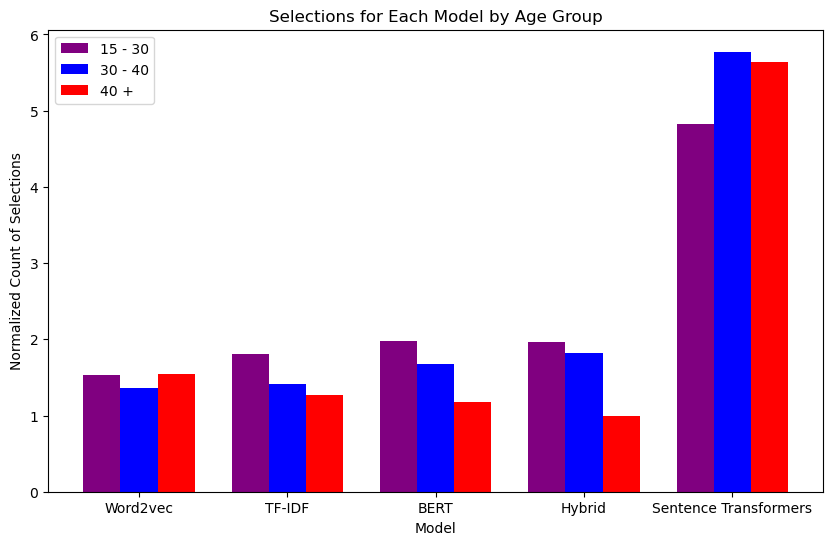

Chi-Square Test for Age Group:
Chi-Square Statistic: 14.257082415628652
p-value: 0.07530589475874903
Degrees of Freedom: 8


In [32]:
# Group by Age Group and sum the counts for each model
age_group_counts = df_combined.groupby('Age Group').sum(numeric_only=True)

# Count the number of respondents in each age group
respondents_per_age_group = df_combined['Age Group'].value_counts()

# Normalise
age_group_counts_normalized = age_group_counts.div(respondents_per_age_group, axis=0)

model_order = ['Word2vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']

age_group_counts_normalized = age_group_counts_normalized[model_order]

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(model_order))
bar_width = 0.25 
if '15 - 30' in age_group_counts_normalized.index:
    bar1 = ax.bar(index, age_group_counts_normalized.loc['15 - 30'], bar_width, label='15 - 30', color='purple')
if '30 - 40' in age_group_counts_normalized.index:
    bar2 = ax.bar(index + bar_width, age_group_counts_normalized.loc['30 - 40'], bar_width, label='30 - 40', color='blue')
if '40 +' in age_group_counts_normalized.index:
    bar3 = ax.bar(index + 2 * bar_width, age_group_counts_normalized.loc['40 +'], bar_width, label='40 +', color='red')
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Count of Selections')
ax.set_title('Selections for Each Model by Age Group')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_order)
ax.legend()
plt.show()

# Perform Chi-Square test
chi2_age, p_age, dof_age, expected_age = chi2_contingency(age_group_counts)
print(f"Chi-Square Test for Age Group:")
print(f"Chi-Square Statistic: {chi2_age}")
print(f"p-value: {p_age}")
print(f"Degrees of Freedom: {dof_age}")

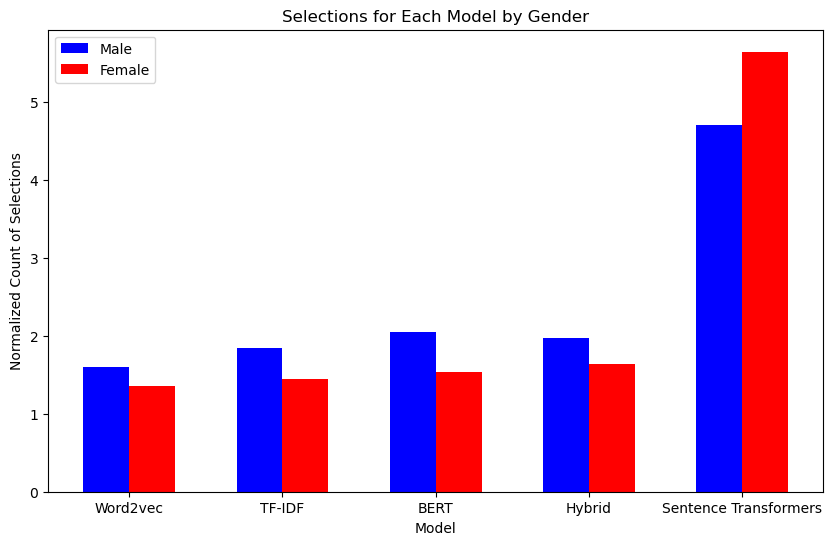

Chi-Square Test for Gender:
Chi-Square Statistic: 12.628477363605466
p-value: 0.013241284334579648
Degrees of Freedom: 4


In [33]:
# Group by Gender and sum the counts for each model
gender_group_counts = df_combined.groupby('Gender').sum(numeric_only=True)

# Count the number of respondents in each gender group
respondents_per_gender = df_combined['Gender'].value_counts()

# Normalise
gender_group_counts_normalized = gender_group_counts.div(respondents_per_gender, axis=0)

gender_group_counts_normalized = gender_group_counts_normalized[model_order]

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(model_order))
bar_width = 0.3  
if 'Male' in gender_group_counts_normalized.index:
    bar1 = ax.bar(index, gender_group_counts_normalized.loc['Male'], bar_width, label='Male', color='blue')
if 'Female' in gender_group_counts_normalized.index:
    bar2 = ax.bar(index + bar_width, gender_group_counts_normalized.loc['Female'], bar_width, label='Female', color='red')
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Count of Selections')
ax.set_title('Selections for Each Model by Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_order)
ax.legend()
plt.show()

# Perform Chi-Square test 
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_group_counts)
print(f"Chi-Square Test for Gender:")
print(f"Chi-Square Statistic: {chi2_gender}")
print(f"p-value: {p_gender}")
print(f"Degrees of Freedom: {dof_gender}")

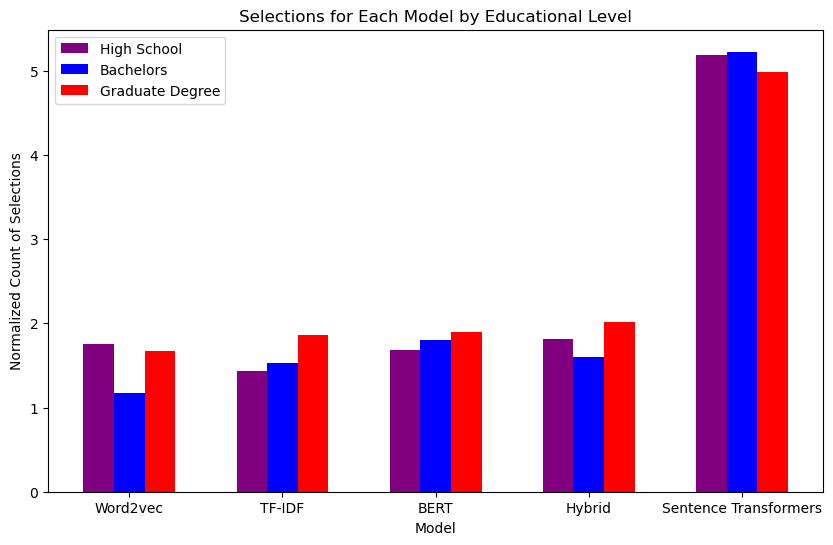

Chi-Square Test for Educational Level:
Chi-Square Statistic: 7.170048222360017
p-value: 0.5184019732344396
Degrees of Freedom: 8


In [34]:
# Group by Educational Level and sum the counts for each model
education_group_counts = df_combined.groupby('Educational Level').sum(numeric_only=True)

# Count the number of respondents in each educational level group
respondents_per_education = df_combined['Educational Level'].value_counts()

# Normalise
education_group_counts_normalized = education_group_counts.div(respondents_per_education, axis=0)

education_group_counts_normalized = education_group_counts_normalized[model_order]

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(model_order))
bar_width = 0.2  
if 'High School' in education_group_counts_normalized.index:
    bar1 = ax.bar(index, education_group_counts_normalized.loc['High School'], bar_width, label='High School', color='purple')
if 'Bachelors' in education_group_counts_normalized.index:
    bar2 = ax.bar(index + bar_width, education_group_counts_normalized.loc['Bachelors'], bar_width, label='Bachelors', color='blue')
if 'Graduate Degree' in education_group_counts_normalized.index:
    bar3 = ax.bar(index + 2 * bar_width, education_group_counts_normalized.loc['Graduate Degree'], bar_width, label='Graduate Degree', color='red')
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Count of Selections')
ax.set_title('Selections for Each Model by Educational Level')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_order)
ax.legend()
plt.show()

# Perform Chi-Square test for the educational level groups
chi2_education, p_education, dof_education, expected_education = chi2_contingency(education_group_counts)
print(f"Chi-Square Test for Educational Level:")
print(f"Chi-Square Statistic: {chi2_education}")
print(f"p-value: {p_education}")
print(f"Degrees of Freedom: {dof_education}")

For age, the p-value is close to 0.05. There might be a trend or borderline significance that could be explored further with a larger sample size.

The educational level analysis showed no significant difference (p = 0.5184). This suggests that educational level doesn’t strongly influence model preference.

Gender is statistically significant. Therefore, we explore this further.

In [35]:
# Sum the counts for each model by gender
gender_model_counts = df_combined.groupby('Gender')[model_order].sum()

print("Breakdown of Preferences by Gender for Each Model:")
print(gender_model_counts)

Breakdown of Preferences by Gender for Each Model:
        Word2vec  TF-IDF   BERT  Hybrid  Sentence Transformers
Gender                                                        
Female      61.0    65.0   69.0    74.0                  254.0
Male        99.0   114.0  127.0   122.0                  292.0


In [36]:
# Chi-Square test between gender and model selection counts
for model in ['Word2vec', 'TF-IDF', 'BERT', 'Hybrid', 'Sentence Transformers']:
    contingency_table = pd.crosstab(df_combined['Gender'], df_combined[model])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {model} by Gender:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)


Chi-Square Test for Word2vec by Gender:
Chi-Square Statistic: 6.028346566766871
p-value: 0.5364433943208067
Degrees of Freedom: 7
Expected frequencies:
[[12.61682243 15.56074766  7.14953271  4.62616822  3.36448598  0.8411215
   0.42056075  0.42056075]
 [17.38317757 21.43925234  9.85046729  6.37383178  4.63551402  1.1588785
   0.57943925  0.57943925]]

Chi-Square Test for TF-IDF by Gender:
Chi-Square Statistic: 14.714449170900782
p-value: 0.03983901170036522
Degrees of Freedom: 7
Expected frequencies:
[[10.93457944 14.29906542  8.8317757   4.20560748  4.20560748  1.68224299
   0.42056075  0.42056075]
 [15.06542056 19.70093458 12.1682243   5.79439252  5.79439252  2.31775701
   0.57943925  0.57943925]]

Chi-Square Test for BERT by Gender:
Chi-Square Statistic: 8.062051296373879
p-value: 0.3271541153203861
Degrees of Freedom: 7
Expected frequencies:
[[10.51401869 13.45794393  8.8317757   4.62616822  3.78504673  2.52336449
   0.42056075  0.8411215 ]
 [14.48598131 18.54205607 12.1682243   6

Since the TF-IDF model shows a statistically significant difference between genders, let's focus on understanding why this model is preferred differently by males and females. 

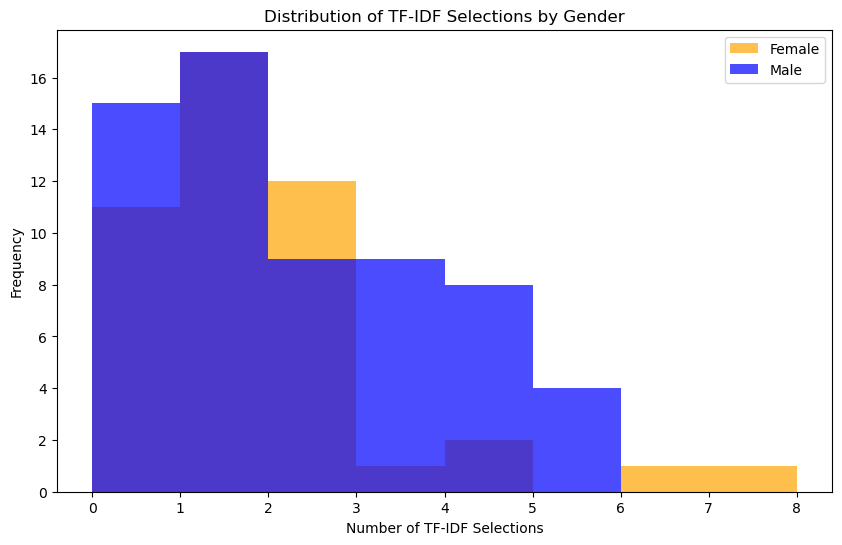

In [37]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_combined[df_combined['Gender'] == 'Female']['TF-IDF'], bins=range(int(df_combined['TF-IDF'].max()) + 2), alpha=0.7, label='Female', color='orange')
plt.hist(df_combined[df_combined['Gender'] == 'Male']['TF-IDF'], bins=range(int(df_combined['TF-IDF'].max()) + 2), alpha=0.7, label='Male', color='blue')
plt.xlabel('Number of TF-IDF Selections')
plt.ylabel('Frequency')
plt.title('Distribution of TF-IDF Selections by Gender')
plt.legend()
plt.show()

For females, the majority selected TF-IDF 0, 1 or 2 times. For males, there is a broader distribution, with many selecting TF-IDF between 0 and 4 times. 

Both genders have a significant proportion of participants who selected TF-IDF exactly 1 time.

However, males tend to have a more varied selection pattern, with a notable portion selecting TF-IDF up to 4 times. This suggests that males might find TF-IDF recommendations more relevant across multiple products compared to females.

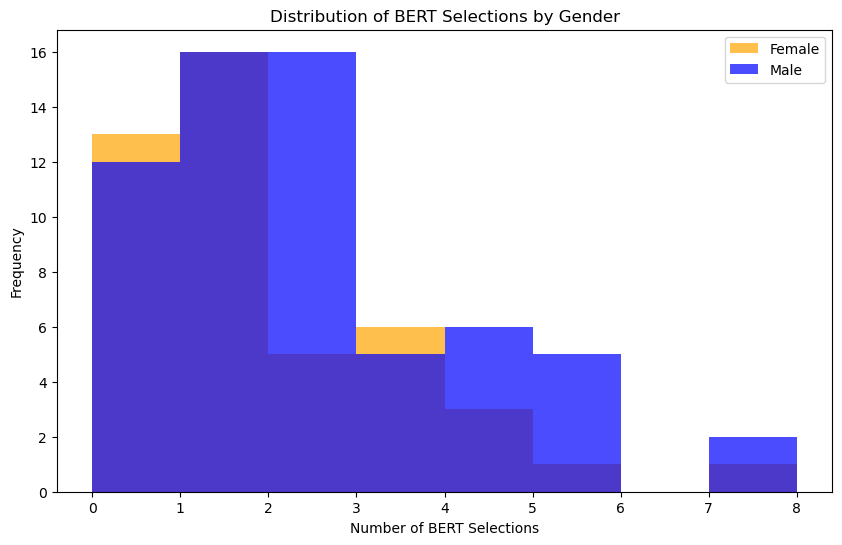

In [38]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_combined[df_combined['Gender'] == 'Female']['BERT'], bins=range(int(df_combined['TF-IDF'].max()) + 2), alpha=0.7, label='Female', color='orange')
plt.hist(df_combined[df_combined['Gender'] == 'Male']['BERT'], bins=range(int(df_combined['TF-IDF'].max()) + 2), alpha=0.7, label='Male', color='blue')
plt.xlabel('Number of BERT Selections')
plt.ylabel('Frequency')
plt.title('Distribution of BERT Selections by Gender')
plt.legend()
plt.show()

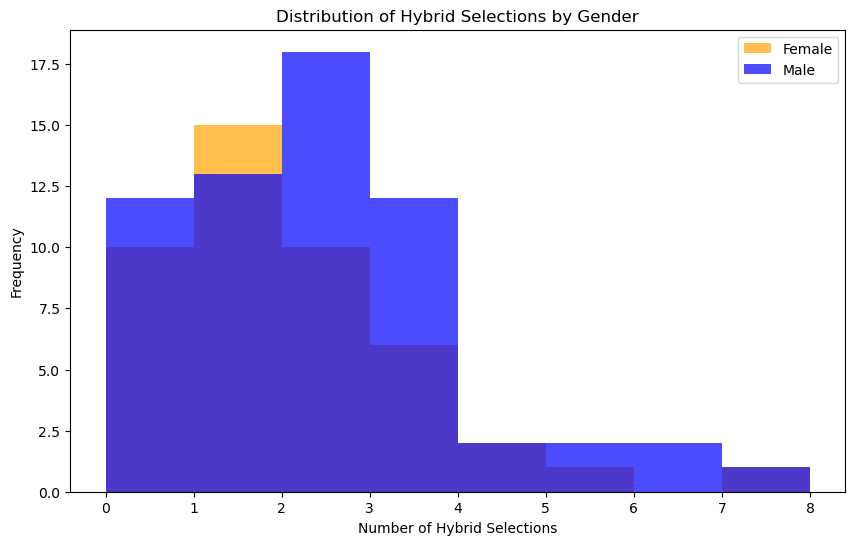

In [39]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_combined[df_combined['Gender'] == 'Female']['Hybrid'], bins=range(int(df_combined['TF-IDF'].max()) + 2), alpha=0.7, label='Female', color='orange')
plt.hist(df_combined[df_combined['Gender'] == 'Male']['Hybrid'], bins=range(int(df_combined['TF-IDF'].max()) + 2), alpha=0.7, label='Male', color='blue')
plt.xlabel('Number of Hybrid Selections')
plt.ylabel('Frequency')
plt.title('Distribution of Hybrid Selections by Gender')
plt.legend()
plt.show()

In [40]:
# Define the mapping specifically for TF-IDF for each item
tfidf_mapping = {
    1: ["TF-IDF"]
}

# Function to map models 
def apply_tfidf_mapping(column, mapping):
    def check_tfidf(value):
        if pd.isna(value):
            return 0
        models = map_models(value, mapping)
        return 1 if "TF-IDF" in models else 0
    
    return df[column].apply(check_tfidf)

# Apply the mapping to each item column
df_tfidf_selection = pd.DataFrame({
    'Freezer Bags': apply_tfidf_mapping('Freezer Bags Zip 3l Dia Pack 40 Pcs.', freezer_bag_mapping),
    'Cheese': apply_tfidf_mapping('Insolito El Cencerro Cured Sheep Cheese 200 Gr.', specific_model_mapping),
    'Oil': apply_tfidf_mapping('Diasol Sunflower Food Oil 1 L', specific_model_mapping),
    'Baking Powder': apply_tfidf_mapping('Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr', specific_model_mapping),
    'Lomo': apply_tfidf_mapping('Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena', specific_model_mapping),
    'Liqueur': apply_tfidf_mapping('Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL', liqueur_mapping),
    'Sardines': apply_tfidf_mapping('Albo Sardines In Olive Oil 85g', product_mapping),
    'Oat Milk': apply_tfidf_mapping('Oat Milk Natural Vegedia 1L', product_mapping),
    'Hot Dog Bread': apply_tfidf_mapping('Bimbo Hot Dog Bread 6u 330g', product_mapping)
})

df_tfidf_selection = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_tfidf_selection], axis=1)

print(df_tfidf_selection.head())

  Age Group  Gender Educational Level  Freezer Bags  Cheese  Oil  \
1   15 - 30  Female   Graduate Degree             0       0    0   
2   15 - 30  Female   Graduate Degree             0       0    0   
3   15 - 30    Male   Graduate Degree             0       0    0   
4   15 - 30    Male   Graduate Degree             0       0    1   
5   15 - 30  Female   Graduate Degree             0       0    0   

   Baking Powder  Lomo  Liqueur  Sardines  Oat Milk  Hot Dog Bread  
1              0     0        0         0         0              0  
2              0     1        1         1         0              1  
3              0     0        0         0         0              1  
4              0     0        0         0         0              0  
5              1     0        0         0         0              0  



Chi-Square Test for Freezer Bags (TF-IDF) by Gender:
Chi-Square Statistic: 0.1151294567062818
p-value: 0.7343782296157495
Observed frequencies:
[[41  4]
 [54  8]]
Degrees of Freedom: 1
Expected frequencies:
[[39.95327103  5.04672897]
 [55.04672897  6.95327103]]


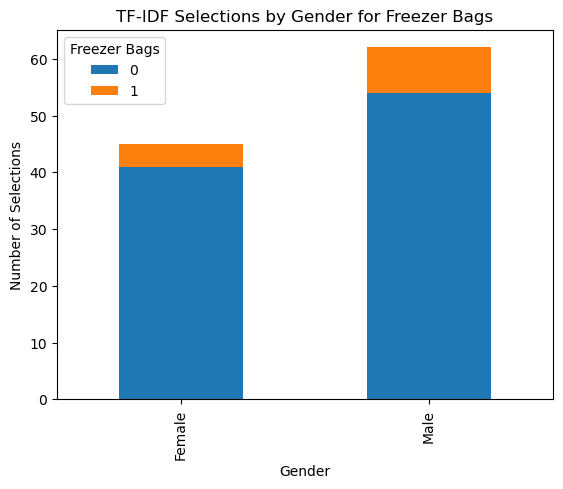


Chi-Square Test for Cheese (TF-IDF) by Gender:
Chi-Square Statistic: 0.5424279215408243
p-value: 0.4614282552287482
Observed frequencies:
[[25 20]
 [40 22]]
Degrees of Freedom: 1
Expected frequencies:
[[27.3364486 17.6635514]
 [37.6635514 24.3364486]]


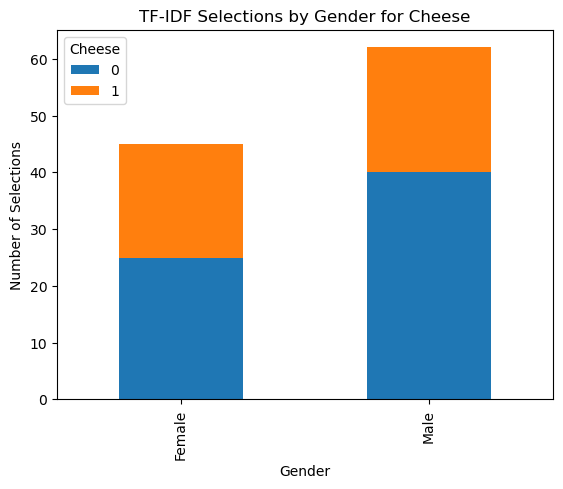


Chi-Square Test for Oil (TF-IDF) by Gender:
Chi-Square Statistic: 0.11295618777780654
p-value: 0.7368033360238732
Observed frequencies:
[[32 13]
 [41 21]]
Degrees of Freedom: 1
Expected frequencies:
[[30.70093458 14.29906542]
 [42.29906542 19.70093458]]


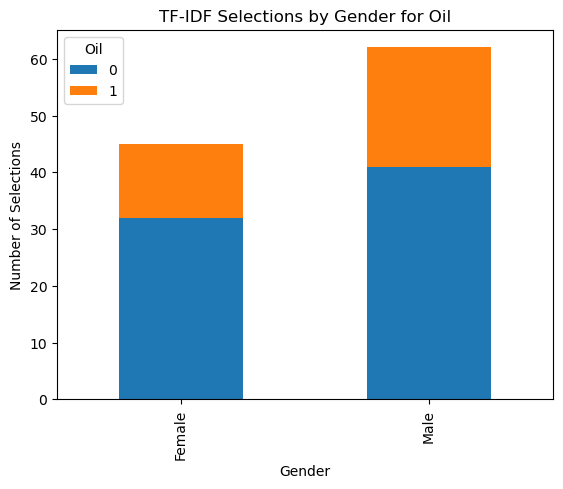


Chi-Square Test for Baking Powder (TF-IDF) by Gender:
Chi-Square Statistic: 0.20793744480806203
p-value: 0.6483888390108234
Observed frequencies:
[[40  5]
 [52 10]]
Degrees of Freedom: 1
Expected frequencies:
[[38.69158879  6.30841121]
 [53.30841121  8.69158879]]


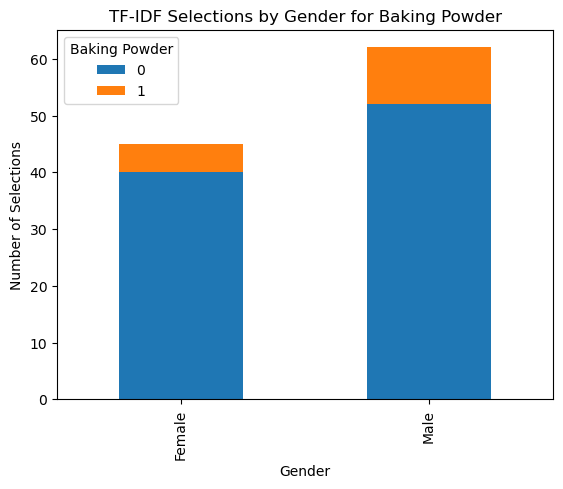


Chi-Square Test for Lomo (TF-IDF) by Gender:
Chi-Square Statistic: 0.03923096109078822
p-value: 0.8429918048885634
Observed frequencies:
[[40  5]
 [57  5]]
Degrees of Freedom: 1
Expected frequencies:
[[40.79439252  4.20560748]
 [56.20560748  5.79439252]]


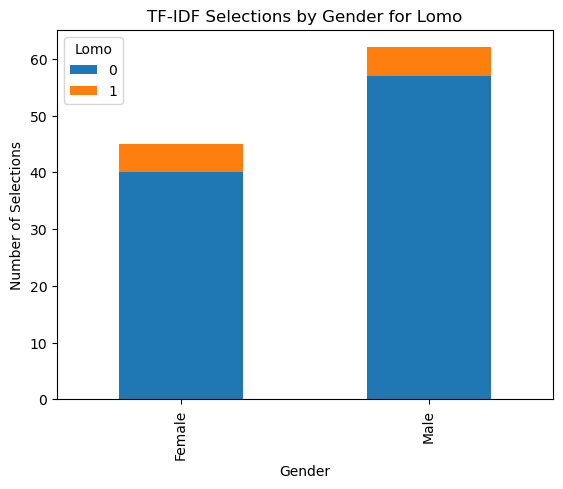


Chi-Square Test for Liqueur (TF-IDF) by Gender:
Chi-Square Statistic: 2.583377129394708
p-value: 0.10799104076550582
Observed frequencies:
[[41  4]
 [48 14]]
Degrees of Freedom: 1
Expected frequencies:
[[37.42990654  7.57009346]
 [51.57009346 10.42990654]]


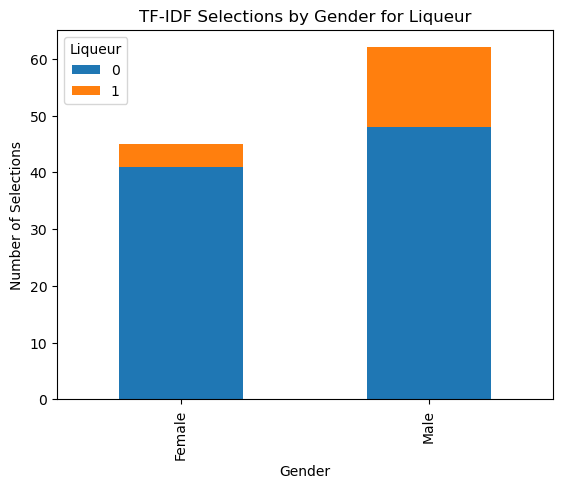


Chi-Square Test for Sardines (TF-IDF) by Gender:
Chi-Square Statistic: 0.0019891958142792578
p-value: 0.9644258226262901
Observed frequencies:
[[36  9]
 [51 11]]
Degrees of Freedom: 1
Expected frequencies:
[[36.58878505  8.41121495]
 [50.41121495 11.58878505]]


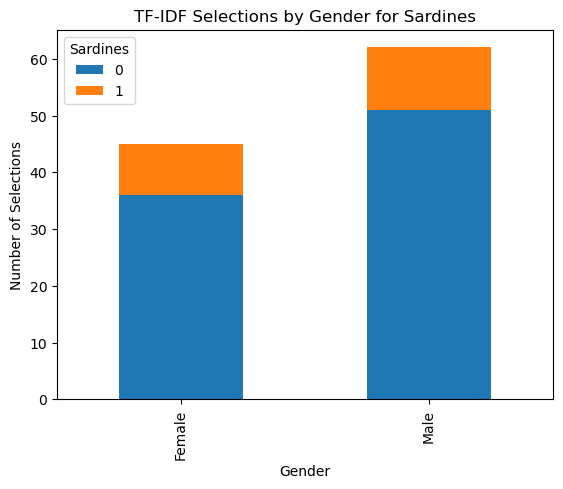


Chi-Square Test for Oat Milk (TF-IDF) by Gender:
Chi-Square Statistic: 3.313637346192218
p-value: 0.06870725892575079
Observed frequencies:
[[44  1]
 [53  9]]
Degrees of Freedom: 1
Expected frequencies:
[[40.79439252  4.20560748]
 [56.20560748  5.79439252]]


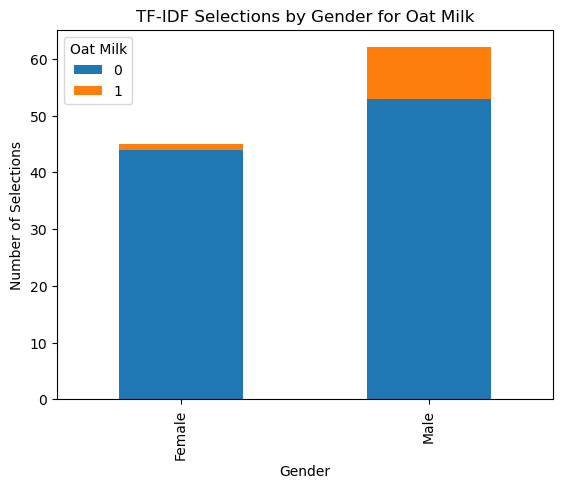


Chi-Square Test for Hot Dog Bread (TF-IDF) by Gender:
Chi-Square Statistic: 2.583377129394708
p-value: 0.10799104076550582
Observed frequencies:
[[41  4]
 [48 14]]
Degrees of Freedom: 1
Expected frequencies:
[[37.42990654  7.57009346]
 [51.57009346 10.42990654]]


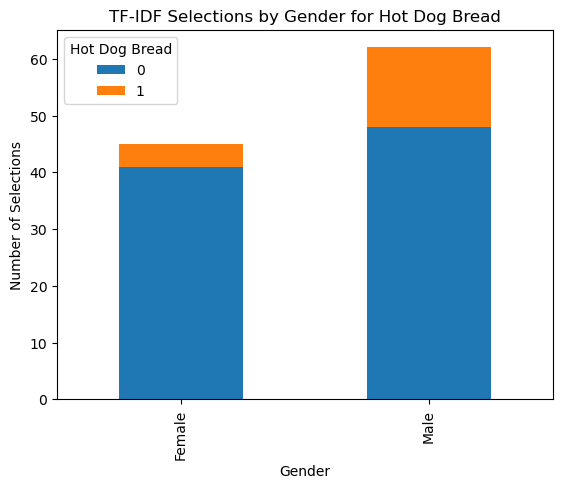

In [41]:
# Perform Chi-Square tests
for item in df_tfidf_selection.columns[3:]:
    contingency_table = pd.crosstab(df_tfidf_selection['Gender'], df_tfidf_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (TF-IDF) by Gender:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print("Observed frequencies:")
    print(contingency_table.values)
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    # Plotting 
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'TF-IDF Selections by Gender for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Gender')
    plt.show()

The results of the Chi-Square tests for each product suggest that the TF-IDF model does not show statistically significant differences in gender preferences. 

When data is aggregated across multiple products, small differences that are not statistically significant on their own can accumulate to produce an overall effect that is statistically significant. This is known as the combined or cumulative effect.

In [42]:
# Define the mapping specifically for BERT for each item
bert_mapping = {
    1: ["BERT"]
}

# Function to map models 
def apply_bert_mapping(column, mapping):
    def check_bert(value):
        if pd.isna(value):
            return 0
        models = map_models(value, mapping)
        return 1 if "BERT" in models else 0
    
    return df[column].apply(check_bert)

# Apply the mapping to each item column 
df_bert_selection = pd.DataFrame({
    'Freezer Bags': apply_bert_mapping('Freezer Bags Zip 3l Dia Pack 40 Pcs.', freezer_bag_mapping),
    'Cheese': apply_bert_mapping('Insolito El Cencerro Cured Sheep Cheese 200 Gr.', specific_model_mapping),
    'Oil': apply_bert_mapping('Diasol Sunflower Food Oil 1 L', specific_model_mapping),
    'Baking Powder': apply_bert_mapping('Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr', specific_model_mapping),
    'Lomo': apply_bert_mapping('Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena', specific_model_mapping),
    'Liqueur': apply_bert_mapping('Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL', liqueur_mapping),
    'Sardines': apply_bert_mapping('Albo Sardines In Olive Oil 85g', product_mapping),
    'Oat Milk': apply_bert_mapping('Oat Milk Natural Vegedia 1L', product_mapping),
    'Hot Dog Bread': apply_bert_mapping('Bimbo Hot Dog Bread 6u 330g', product_mapping)
})

df_bert_selection = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_bert_selection], axis=1)

print(df_bert_selection.head())

  Age Group  Gender Educational Level  Freezer Bags  Cheese  Oil  \
1   15 - 30  Female   Graduate Degree             0       0    0   
2   15 - 30  Female   Graduate Degree             0       0    1   
3   15 - 30    Male   Graduate Degree             1       0    0   
4   15 - 30    Male   Graduate Degree             1       0    0   
5   15 - 30  Female   Graduate Degree             0       0    0   

   Baking Powder  Lomo  Liqueur  Sardines  Oat Milk  Hot Dog Bread  
1              0     0        0         0         0              0  
2              0     0        0         0         1              0  
3              1     0        0         1         1              0  
4              0     0        0         0         0              0  
5              0     0        1         0         0              0  



Chi-Square Test for Freezer Bags (BERT) by Gender:
Chi-Square Statistic: 0.07763144873400397
p-value: 0.7805332335798151
Degrees of Freedom: 1
Observed frequencies:
[[36  9]
 [47 15]]
Expected frequencies:
[[34.90654206 10.09345794]
 [48.09345794 13.90654206]]


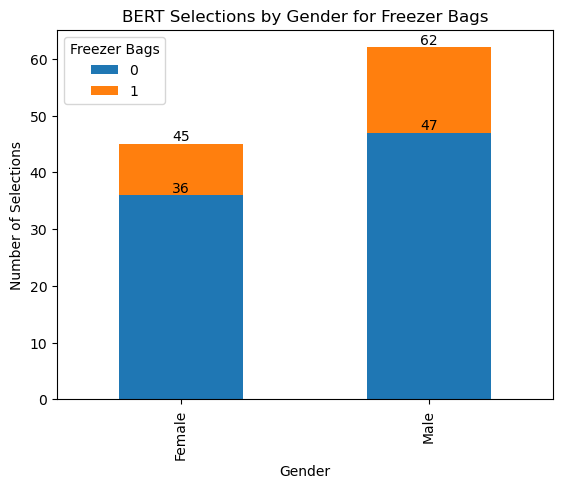


Chi-Square Test for Cheese (BERT) by Gender:
Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Observed frequencies:
[[39  6]
 [53  9]]
Expected frequencies:
[[38.69158879  6.30841121]
 [53.30841121  8.69158879]]


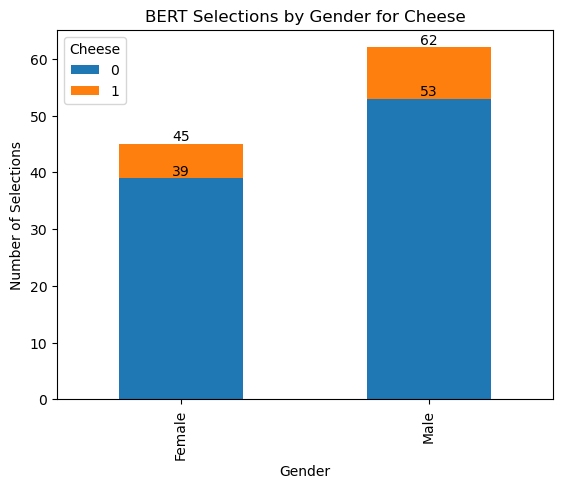


Chi-Square Test for Oil (BERT) by Gender:
Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Observed frequencies:
[[42  3]
 [57  5]]
Expected frequencies:
[[41.63551402  3.36448598]
 [57.36448598  4.63551402]]


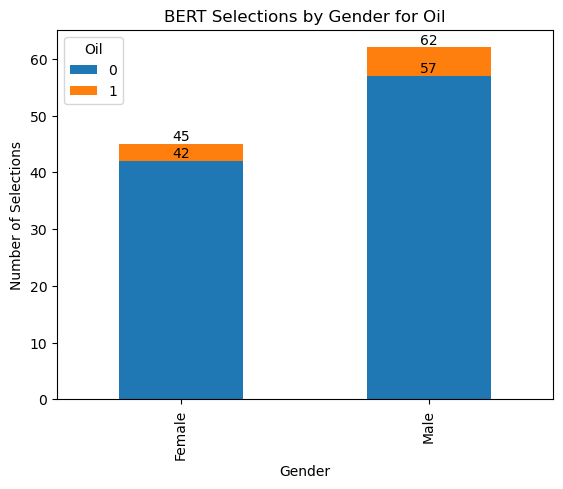


Chi-Square Test for Baking Powder (BERT) by Gender:
Chi-Square Statistic: 2.6988633567121947
p-value: 0.10041981529911957
Degrees of Freedom: 1
Observed frequencies:
[[40  5]
 [46 16]]
Expected frequencies:
[[36.1682243  8.8317757]
 [49.8317757 12.1682243]]


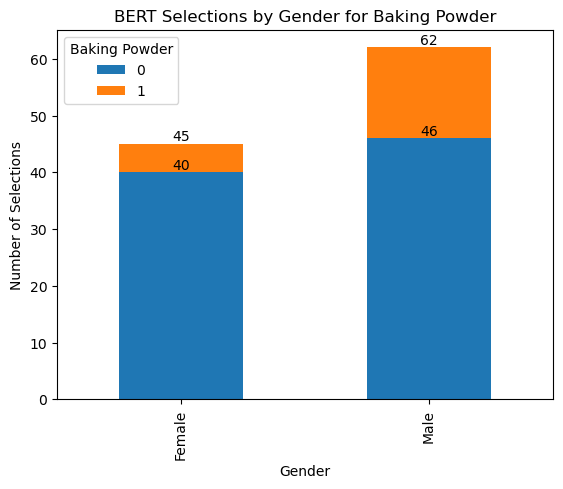


Chi-Square Test for Lomo (BERT) by Gender:
Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Observed frequencies:
[[40  5]
 [55  7]]
Expected frequencies:
[[39.95327103  5.04672897]
 [55.04672897  6.95327103]]


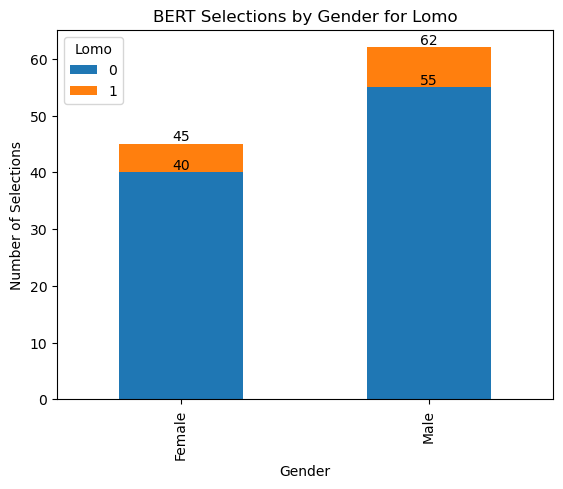


Chi-Square Test for Liqueur (BERT) by Gender:
Chi-Square Statistic: 4.303239963617099
p-value: 0.03803983775627734
Degrees of Freedom: 1
Observed frequencies:
[[23 22]
 [45 17]]
Expected frequencies:
[[28.59813084 16.40186916]
 [39.40186916 22.59813084]]


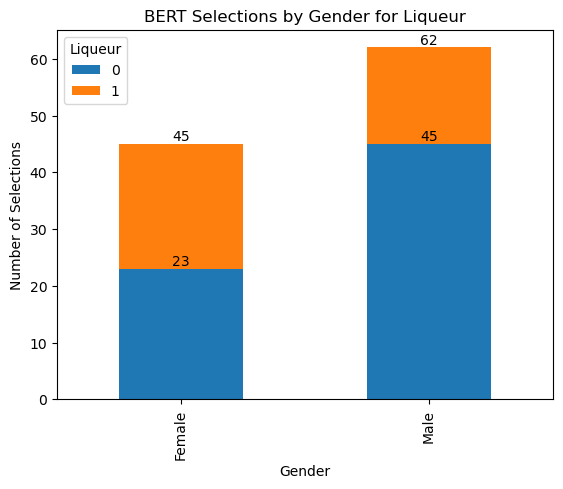


Chi-Square Test for Sardines (BERT) by Gender:
Chi-Square Statistic: 1.9457415420928408
p-value: 0.1630464801489347
Degrees of Freedom: 1
Observed frequencies:
[[38  7]
 [44 18]]
Expected frequencies:
[[34.48598131 10.51401869]
 [47.51401869 14.48598131]]


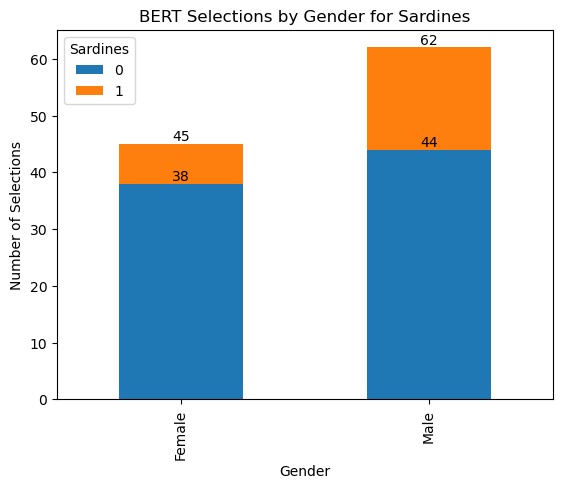


Chi-Square Test for Oat Milk (BERT) by Gender:
Chi-Square Statistic: 3.4470938313680253
p-value: 0.06336308908312169
Degrees of Freedom: 1
Observed frequencies:
[[36  9]
 [38 24]]
Expected frequencies:
[[31.12149533 13.87850467]
 [42.87850467 19.12149533]]


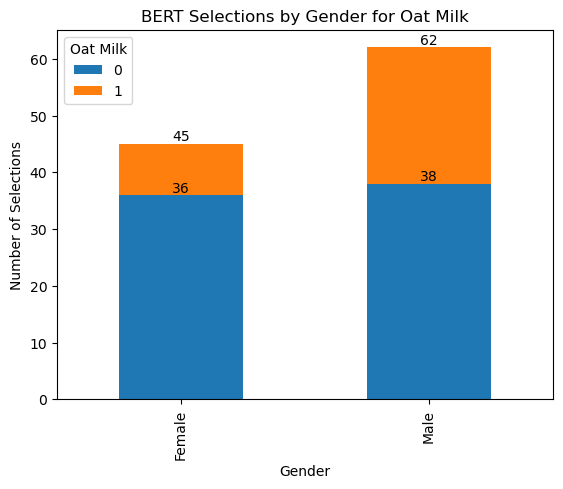


Chi-Square Test for Hot Dog Bread (BERT) by Gender:
Chi-Square Statistic: 5.295781831472622
p-value: 0.021377132650203978
Degrees of Freedom: 1
Observed frequencies:
[[42  3]
 [46 16]]
Expected frequencies:
[[37.00934579  7.99065421]
 [50.99065421 11.00934579]]


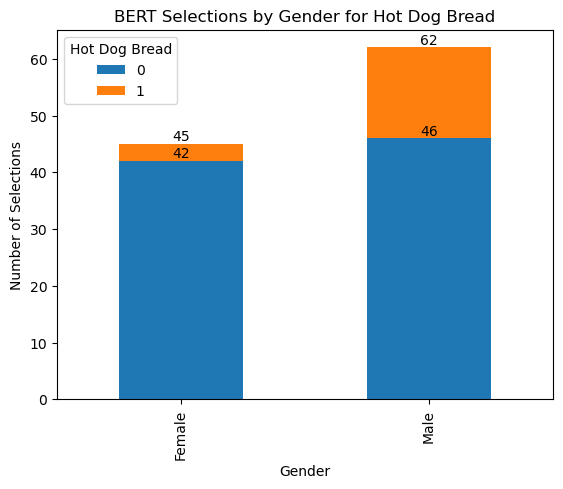

In [43]:
# Perform Chi-Square tests 
for item in df_bert_selection.columns[3:]:
    contingency_table = pd.crosstab(df_bert_selection['Gender'], df_bert_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (BERT) by Gender:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Observed frequencies:")
    print(contingency_table.values)
    print("Expected frequencies:")
    print(expected)
    
    ax = contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'BERT Selections by Gender for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Gender')
    
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.show()

For Liqueur, there is a noticeable difference in how males and females chose BERT. Even though the absolute counts are closer compared to Hot Dog Bread, the difference in distribution (with more females than expected selecting BERT) contributes to the statistical significance.

Hot Dog Bread, with a p-value of 0.021, is also statistically significant at the 5% level, indicating a gender-based difference in preference for BERT in the context of hot dog bread.

In [44]:
# Define the mapping specifically for Sentence Transformers for each item
sentence_transformers_mapping = {
    1: ["Sentence Transformers"]
}

# Function to map models 
def apply_sentence_transformers_mapping(column, mapping):
    def check_sentence_transformers(value):
        if pd.isna(value):
            return 0
        models = map_models(value, mapping)
        return 1 if "Sentence Transformers" in models else 0
    
    return df[column].apply(check_sentence_transformers)

# Apply the mapping to each item column 
df_sentence_transformers_selection = pd.DataFrame({
    'Freezer Bags': apply_sentence_transformers_mapping('Freezer Bags Zip 3l Dia Pack 40 Pcs.', freezer_bag_mapping),
    'Cheese': apply_sentence_transformers_mapping('Insolito El Cencerro Cured Sheep Cheese 200 Gr.', specific_model_mapping),
    'Oil': apply_sentence_transformers_mapping('Diasol Sunflower Food Oil 1 L', specific_model_mapping),
    'Baking Powder': apply_sentence_transformers_mapping('Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr', specific_model_mapping),
    'Lomo': apply_sentence_transformers_mapping('Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena', specific_model_mapping),
    'Liqueur': apply_sentence_transformers_mapping('Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL', liqueur_mapping),
    'Sardines': apply_sentence_transformers_mapping('Albo Sardines In Olive Oil 85g', product_mapping),
    'Oat Milk': apply_sentence_transformers_mapping('Oat Milk Natural Vegedia 1L', product_mapping),
    'Hot Dog Bread': apply_sentence_transformers_mapping('Bimbo Hot Dog Bread 6u 330g', product_mapping)
})

df_sentence_transformers_selection = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_sentence_transformers_selection], axis=1)

print(df_sentence_transformers_selection.head())

  Age Group  Gender Educational Level  Freezer Bags  Cheese  Oil  \
1   15 - 30  Female   Graduate Degree             1       1    1   
2   15 - 30  Female   Graduate Degree             1       1    0   
3   15 - 30    Male   Graduate Degree             0       0    1   
4   15 - 30    Male   Graduate Degree             0       1    0   
5   15 - 30  Female   Graduate Degree             1       1    1   

   Baking Powder  Lomo  Liqueur  Sardines  Oat Milk  Hot Dog Bread  
1              1     1        1         1         1              1  
2              0     0        0         0         0              0  
3              0     0        0         0         0              0  
4              0     1        1         1         1              1  
5              0     1        0         1         1              1  



Chi-Square Test for Freezer Bags (Sentence Transformers) by Gender:
Chi-Square Statistic: 0.004265689300411507
p-value: 0.9479253933452282
Degrees of Freedom: 1
Observed frequencies:
[[12 33]
 [15 47]]
Expected frequencies:
[[11.35514019 33.64485981]
 [15.64485981 46.35514019]]


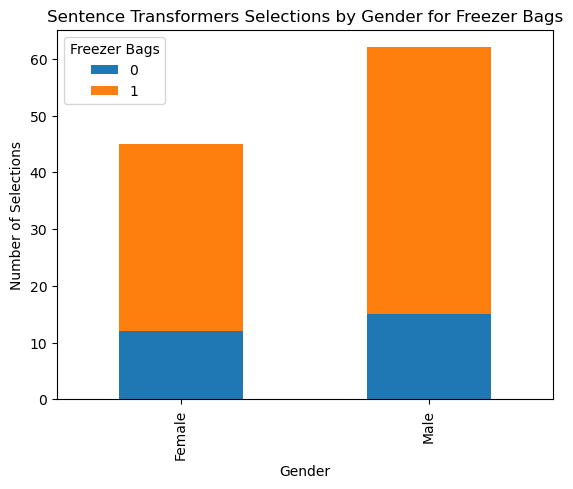


Chi-Square Test for Cheese (Sentence Transformers) by Gender:
Chi-Square Statistic: 1.0172073466428309
p-value: 0.31318235147068196
Degrees of Freedom: 1
Observed frequencies:
[[34 11]
 [40 22]]
Expected frequencies:
[[31.12149533 13.87850467]
 [42.87850467 19.12149533]]


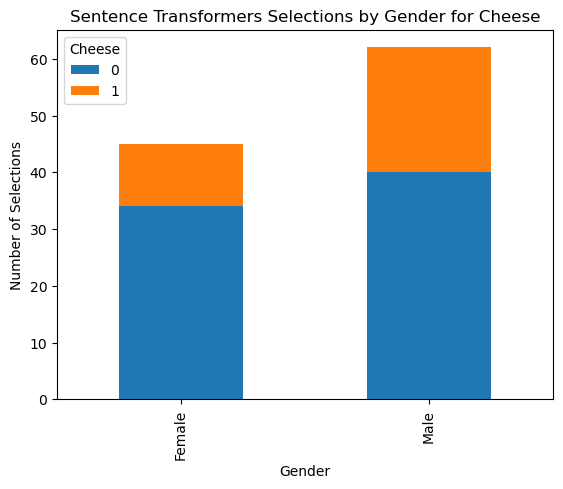


Chi-Square Test for Oil (Sentence Transformers) by Gender:
Chi-Square Statistic: 0.9256570123713722
p-value: 0.33599399634282
Degrees of Freedom: 1
Observed frequencies:
[[16 29]
 [29 33]]
Expected frequencies:
[[18.92523364 26.07476636]
 [26.07476636 35.92523364]]


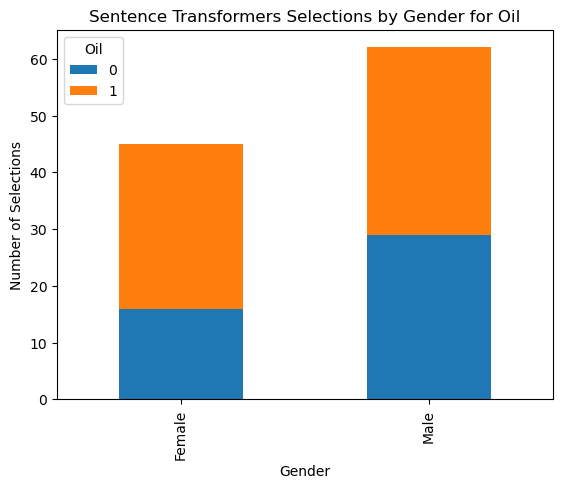


Chi-Square Test for Baking Powder (Sentence Transformers) by Gender:
Chi-Square Statistic: 2.9307364902122983
p-value: 0.08690783783126403
Degrees of Freedom: 1
Observed frequencies:
[[17 28]
 [35 27]]
Expected frequencies:
[[21.86915888 23.13084112]
 [30.13084112 31.86915888]]


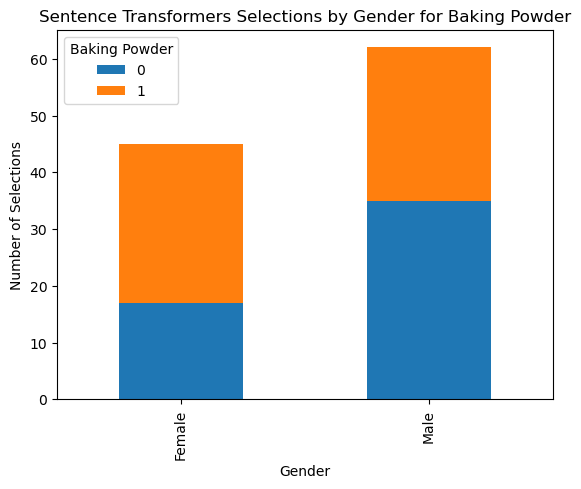


Chi-Square Test for Lomo (Sentence Transformers) by Gender:
Chi-Square Statistic: 0.02845759304222707
p-value: 0.8660375077003425
Degrees of Freedom: 1
Observed frequencies:
[[18 27]
 [27 35]]
Expected frequencies:
[[18.92523364 26.07476636]
 [26.07476636 35.92523364]]


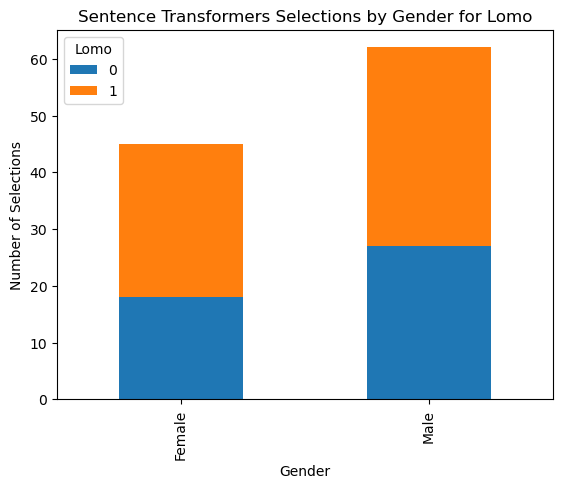


Chi-Square Test for Liqueur (Sentence Transformers) by Gender:
Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Observed frequencies:
[[30 15]
 [42 20]]
Expected frequencies:
[[30.28037383 14.71962617]
 [41.71962617 20.28037383]]


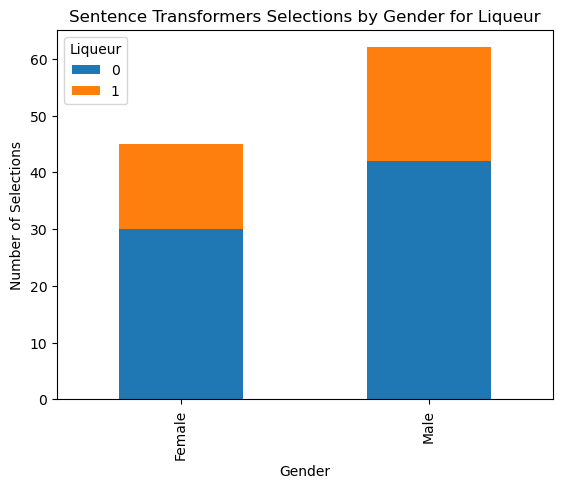


Chi-Square Test for Sardines (Sentence Transformers) by Gender:
Chi-Square Statistic: 1.3942134359947453
p-value: 0.2376948379404093
Degrees of Freedom: 1
Observed frequencies:
[[13 32]
 [26 36]]
Expected frequencies:
[[16.40186916 28.59813084]
 [22.59813084 39.40186916]]


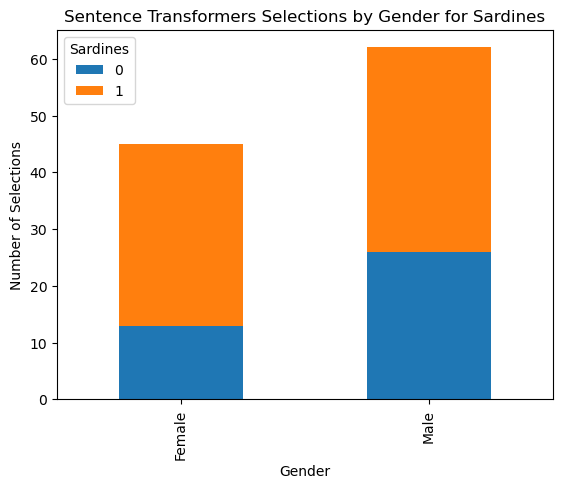


Chi-Square Test for Oat Milk (Sentence Transformers) by Gender:
Chi-Square Statistic: 8.177937602349822
p-value: 0.004240294301996668
Degrees of Freedom: 1
Observed frequencies:
[[ 7 38]
 [27 35]]
Expected frequencies:
[[14.29906542 30.70093458]
 [19.70093458 42.29906542]]


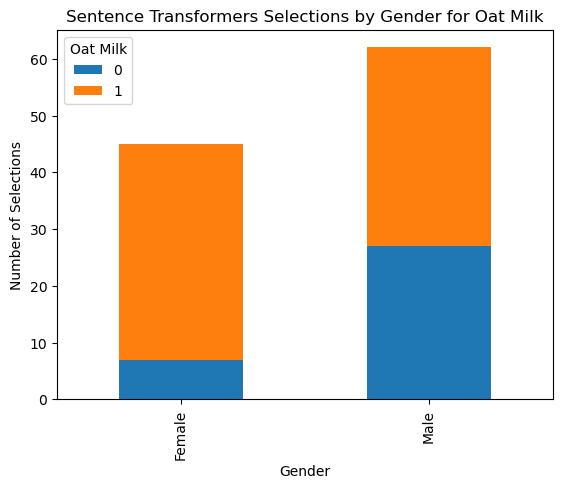


Chi-Square Test for Hot Dog Bread (Sentence Transformers) by Gender:
Chi-Square Statistic: 11.4977849319757
p-value: 0.000696791781343185
Degrees of Freedom: 1
Observed frequencies:
[[ 4 41]
 [25 37]]
Expected frequencies:
[[12.19626168 32.80373832]
 [16.80373832 45.19626168]]


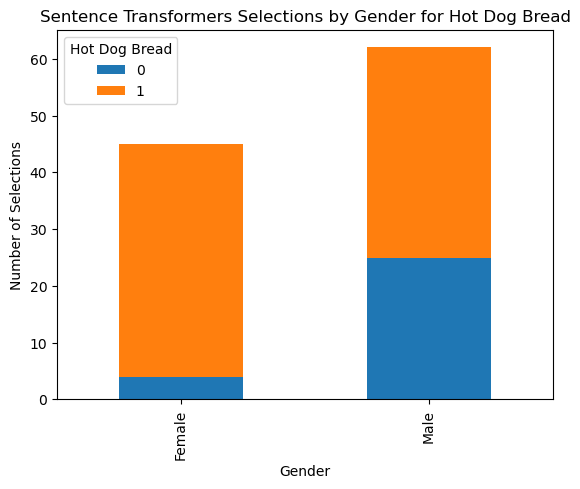

In [45]:
# Perform Chi-Square tests
for item in df_sentence_transformers_selection.columns[3:]:
    contingency_table = pd.crosstab(df_sentence_transformers_selection['Gender'], df_sentence_transformers_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Sentence Transformers) by Gender:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Observed frequencies:")
    print(contingency_table.values)
    print("Expected frequencies:")
    print(expected)
    
 
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Sentence Transformers Selections by Gender for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Gender')
    
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.show()

There is a statistically significant difference between genders in selecting "Sentence Transformers" for Oat Milk and Hot Dog Bread.

CONCLUSION:

Gender can influence the preference for different recommendation models, particularly for specific products (e.g., oat milk and hot dog bread).

The significant results for specific products but not others imply that certain product categories are more sensitive to demographic differences. 

In [46]:
word2vec_mapping = {
    1: ["Word2vec"]
}
def apply_word2vec_mapping(column, mapping):
    def check_word2vec(value):
        if pd.isna(value):
            return 0
        models = map_models(value, mapping)
        return 1 if "Word2vec" in models else 0
    
    return df[column].apply(check_word2vec)

df_word2vec_selection = pd.DataFrame({
    'Freezer Bags': apply_word2vec_mapping('Freezer Bags Zip 3l Dia Pack 40 Pcs.', freezer_bag_mapping),
    'Cheese': apply_word2vec_mapping('Insolito El Cencerro Cured Sheep Cheese 200 Gr.', specific_model_mapping),
    'Oil': apply_word2vec_mapping('Diasol Sunflower Food Oil 1 L', specific_model_mapping),
    'Baking Powder': apply_word2vec_mapping('Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr', specific_model_mapping),
    'Lomo': apply_word2vec_mapping('Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena', specific_model_mapping),
    'Liqueur': apply_word2vec_mapping('Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL', liqueur_mapping),
    'Sardines': apply_word2vec_mapping('Albo Sardines In Olive Oil 85g', product_mapping),
    'Oat Milk': apply_word2vec_mapping('Oat Milk Natural Vegedia 1L', product_mapping),
    'Hot Dog Bread': apply_word2vec_mapping('Bimbo Hot Dog Bread 6u 330g', product_mapping)
})

df_word2vec_selection = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_word2vec_selection], axis=1)

print(df_word2vec_selection.head())

  Age Group  Gender Educational Level  Freezer Bags  Cheese  Oil  \
1   15 - 30  Female   Graduate Degree             0       0    0   
2   15 - 30  Female   Graduate Degree             0       0    0   
3   15 - 30    Male   Graduate Degree             0       1    0   
4   15 - 30    Male   Graduate Degree             0       0    0   
5   15 - 30  Female   Graduate Degree             0       0    0   

   Baking Powder  Lomo  Liqueur  Sardines  Oat Milk  Hot Dog Bread  
1              0     0        0         0         0              0  
2              1     0        0         1         0              1  
3              0     1        1         0         0              1  
4              0     0        0         0         0              0  
5              0     0        0         0         0              0  



Chi-Square Test for Freezer Bags (Word2Vec) by Gender:
Chi-Square Statistic: 0.19396146953404994
p-value: 0.6596397712710055
Degrees of Freedom: 1
Observed frequencies:
[[41  4]
 [59  3]]
Expected frequencies:
[[42.05607477  2.94392523]
 [57.94392523  4.05607477]]


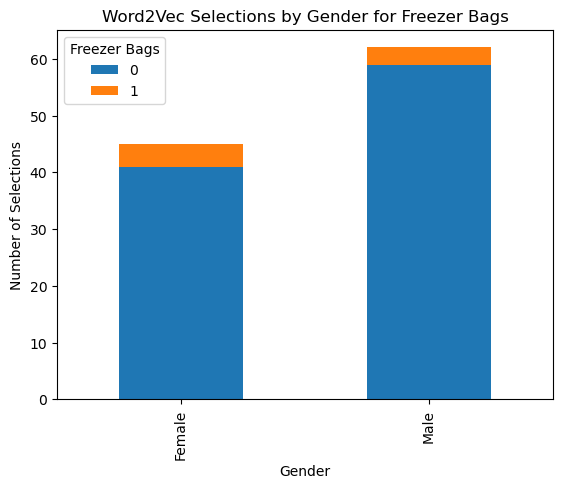


Chi-Square Test for Cheese (Word2Vec) by Gender:
Chi-Square Statistic: 1.130226608187135
p-value: 0.2877270081191782
Degrees of Freedom: 1
Observed frequencies:
[[29 16]
 [47 15]]
Expected frequencies:
[[31.96261682 13.03738318]
 [44.03738318 17.96261682]]


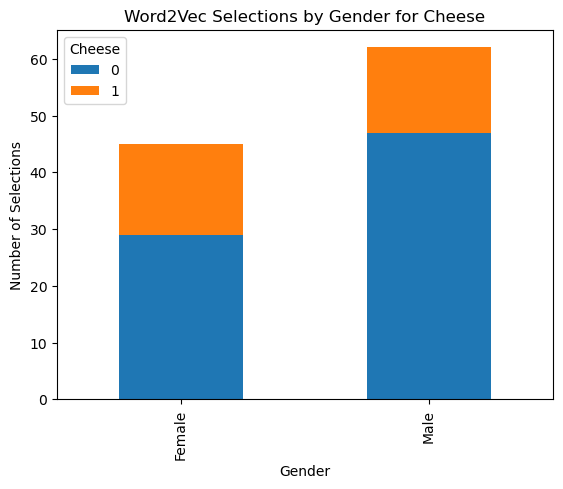


Chi-Square Test for Oil (Word2Vec) by Gender:
Chi-Square Statistic: 1.0405487377279106
p-value: 0.3076938843769899
Degrees of Freedom: 1
Observed frequencies:
[[41  4]
 [51 11]]
Expected frequencies:
[[38.69158879  6.30841121]
 [53.30841121  8.69158879]]


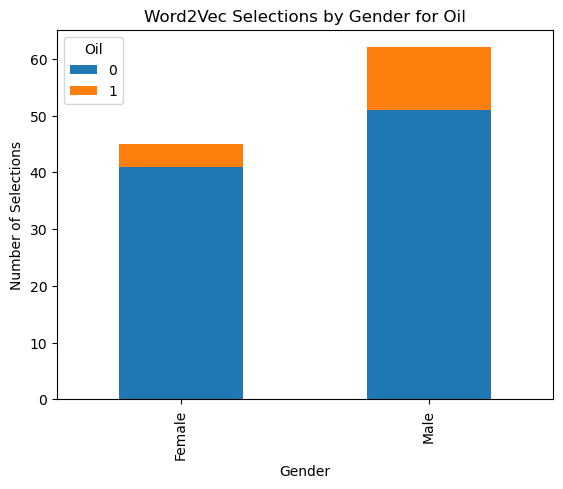


Chi-Square Test for Baking Powder (Word2Vec) by Gender:
Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Observed frequencies:
[[42  3]
 [57  5]]
Expected frequencies:
[[41.63551402  3.36448598]
 [57.36448598  4.63551402]]


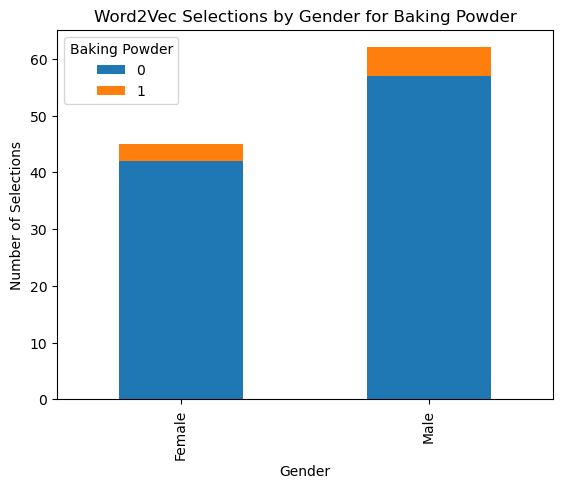


Chi-Square Test for Lomo (Word2Vec) by Gender:
Chi-Square Statistic: 0.017908272566225833
p-value: 0.8935434930343114
Degrees of Freedom: 1
Observed frequencies:
[[32 13]
 [46 16]]
Expected frequencies:
[[32.80373832 12.19626168]
 [45.19626168 16.80373832]]


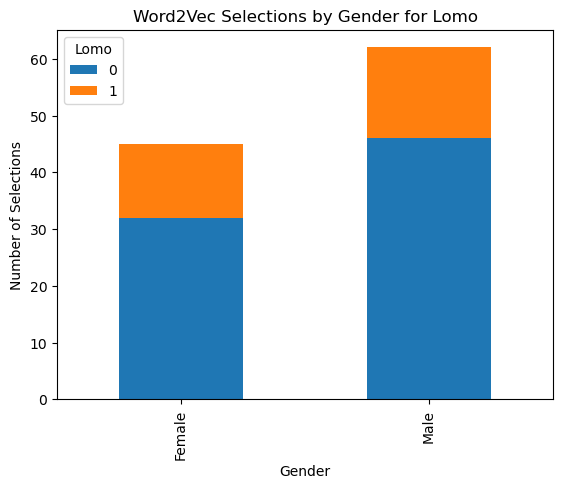


Chi-Square Test for Liqueur (Word2Vec) by Gender:
Chi-Square Statistic: 0.7210087114024492
p-value: 0.39581323275150027
Degrees of Freedom: 1
Observed frequencies:
[[38  7]
 [47 15]]
Expected frequencies:
[[35.74766355  9.25233645]
 [49.25233645 12.74766355]]


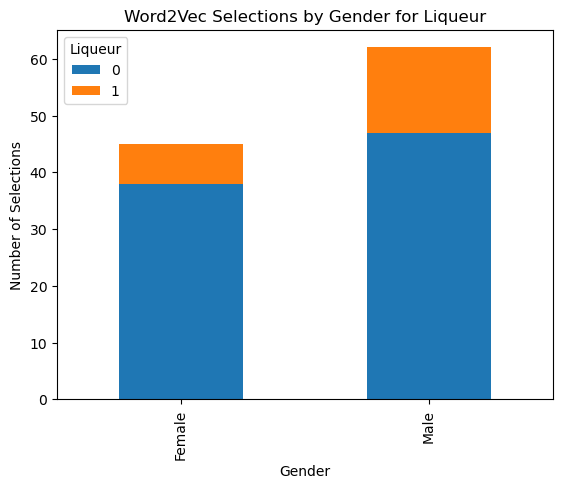


Chi-Square Test for Sardines (Word2Vec) by Gender:
Chi-Square Statistic: 0.0019891958142792578
p-value: 0.9644258226262901
Degrees of Freedom: 1
Observed frequencies:
[[36  9]
 [51 11]]
Expected frequencies:
[[36.58878505  8.41121495]
 [50.41121495 11.58878505]]


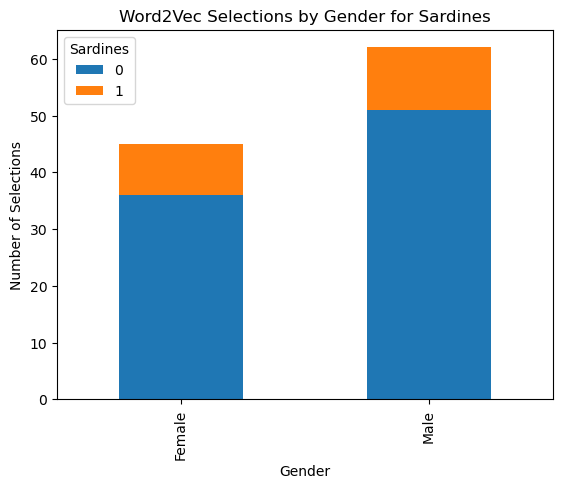


Chi-Square Test for Oat Milk (Word2Vec) by Gender:
Chi-Square Statistic: 3.313637346192218
p-value: 0.06870725892575079
Degrees of Freedom: 1
Observed frequencies:
[[44  1]
 [53  9]]
Expected frequencies:
[[40.79439252  4.20560748]
 [56.20560748  5.79439252]]


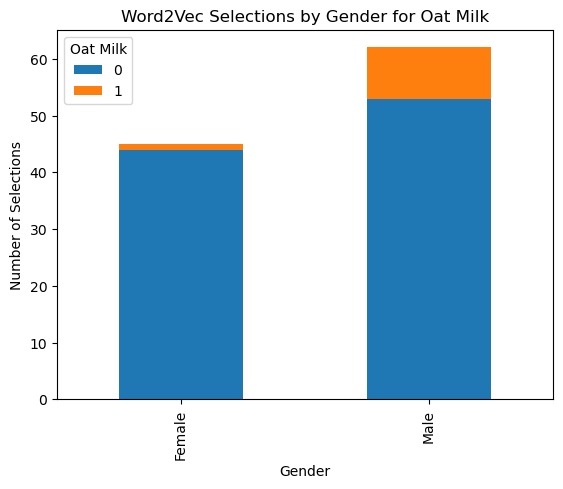


Chi-Square Test for Hot Dog Bread (Word2Vec) by Gender:
Chi-Square Statistic: 2.583377129394708
p-value: 0.10799104076550582
Degrees of Freedom: 1
Observed frequencies:
[[41  4]
 [48 14]]
Expected frequencies:
[[37.42990654  7.57009346]
 [51.57009346 10.42990654]]


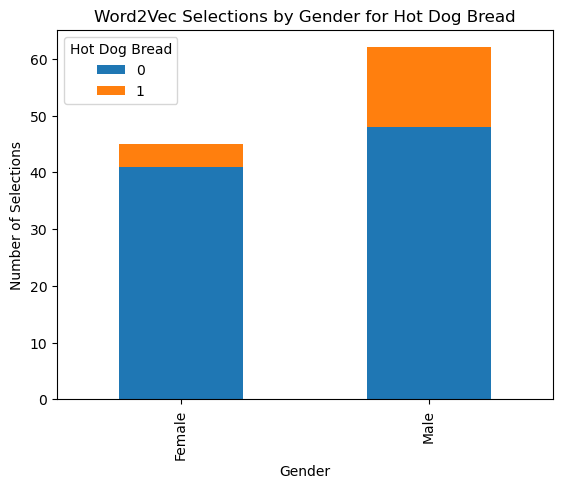

In [47]:
# Perform Chi-Square tests 
for item in df_word2vec_selection.columns[3:]:
    contingency_table = pd.crosstab(df_word2vec_selection['Gender'], df_word2vec_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Word2Vec) by Gender:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Observed frequencies:")
    print(contingency_table.values)
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Word2Vec Selections by Gender for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Gender')
    plt.show()

In [48]:
# Define the mapping specifically for Hybrid for each item
hybrid_mapping = {
    1: ["Hybrid"]
}

def apply_hybrid_mapping(column, mapping):
    def check_hybrid(value):
        if pd.isna(value):
            return 0
        models = map_models(value, mapping)
        return 1 if "Hybrid" in models else 0
    
    return df[column].apply(check_hybrid)

df_hybrid_selection = pd.DataFrame({
    'Freezer Bags': apply_hybrid_mapping('Freezer Bags Zip 3l Dia Pack 40 Pcs.', freezer_bag_mapping),
    'Cheese': apply_hybrid_mapping('Insolito El Cencerro Cured Sheep Cheese 200 Gr.', specific_model_mapping),
    'Oil': apply_hybrid_mapping('Diasol Sunflower Food Oil 1 L', specific_model_mapping),
    'Baking Powder': apply_hybrid_mapping('Dia Delimagic Baking Powder Box 5 Sachets Of 15 Gr', specific_model_mapping),
    'Lomo': apply_hybrid_mapping('Iberian Cebo Lomo Slices 50% Dia Nuestra Alacena', specific_model_mapping),
    'Liqueur': apply_hybrid_mapping('Alcohol Free Blackberry Liqueur Sonador Bottle 70 cL', liqueur_mapping),
    'Sardines': apply_hybrid_mapping('Albo Sardines In Olive Oil 85g', product_mapping),
    'Oat Milk': apply_hybrid_mapping('Oat Milk Natural Vegedia 1L', product_mapping),
    'Hot Dog Bread': apply_hybrid_mapping('Bimbo Hot Dog Bread 6u 330g', product_mapping)
})

df_hybrid_selection = pd.concat([df[['Age Group', 'Gender', 'Educational Level']], df_hybrid_selection], axis=1)

print(df_hybrid_selection.head())

  Age Group  Gender Educational Level  Freezer Bags  Cheese  Oil  \
1   15 - 30  Female   Graduate Degree             0       0    0   
2   15 - 30  Female   Graduate Degree             0       0    0   
3   15 - 30    Male   Graduate Degree             1       0    0   
4   15 - 30    Male   Graduate Degree             1       0    0   
5   15 - 30  Female   Graduate Degree             0       0    0   

   Baking Powder  Lomo  Liqueur  Sardines  Oat Milk  Hot Dog Bread  
1              0     0        0         0         0              0  
2              0     0        0         0         1              0  
3              0     0        0         1         1              0  
4              1     0        0         0         0              0  
5              0     0        1         0         0              0  



Chi-Square Test for Freezer Bags (Hybrid) by Gender:
Chi-Square Statistic: 0.07763144873400397
p-value: 0.7805332335798151
Degrees of Freedom: 1
Observed frequencies:
[[36  9]
 [47 15]]
Expected frequencies:
[[34.90654206 10.09345794]
 [48.09345794 13.90654206]]


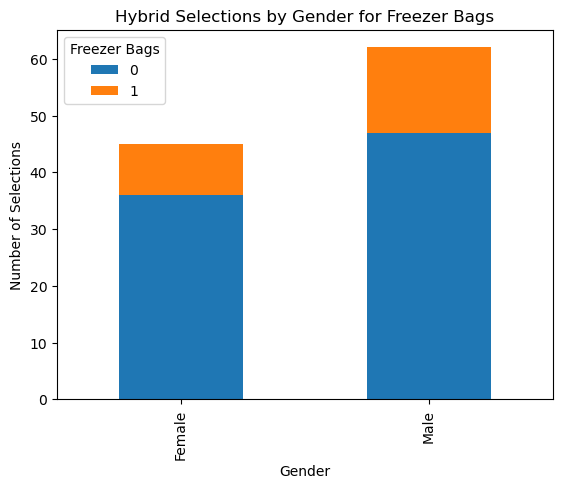


Chi-Square Test for Cheese (Hybrid) by Gender:
Chi-Square Statistic: 0.1210759130414413
p-value: 0.7278704921287118
Degrees of Freedom: 1
Observed frequencies:
[[39  6]
 [51 11]]
Expected frequencies:
[[37.85046729  7.14953271]
 [52.14953271  9.85046729]]


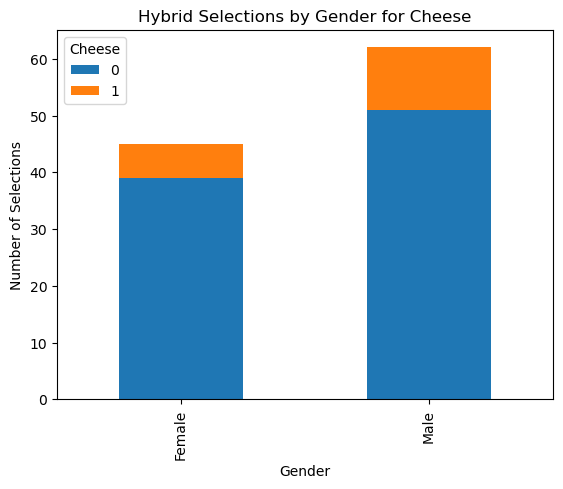


Chi-Square Test for Oil (Hybrid) by Gender:
Chi-Square Statistic: 0.00039553686551451546
p-value: 0.9841326311962467
Degrees of Freedom: 1
Observed frequencies:
[[43  2]
 [58  4]]
Expected frequencies:
[[42.47663551  2.52336449]
 [58.52336449  3.47663551]]


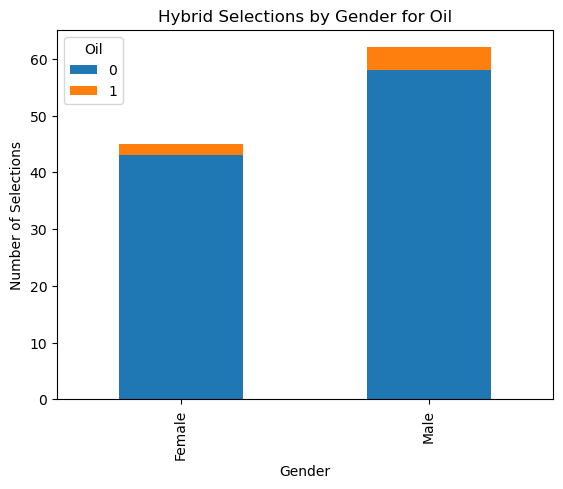


Chi-Square Test for Baking Powder (Hybrid) by Gender:
Chi-Square Statistic: 1.1009950871338527
p-value: 0.2940478279682347
Degrees of Freedom: 1
Observed frequencies:
[[34 11]
 [53  9]]
Expected frequencies:
[[36.58878505  8.41121495]
 [50.41121495 11.58878505]]


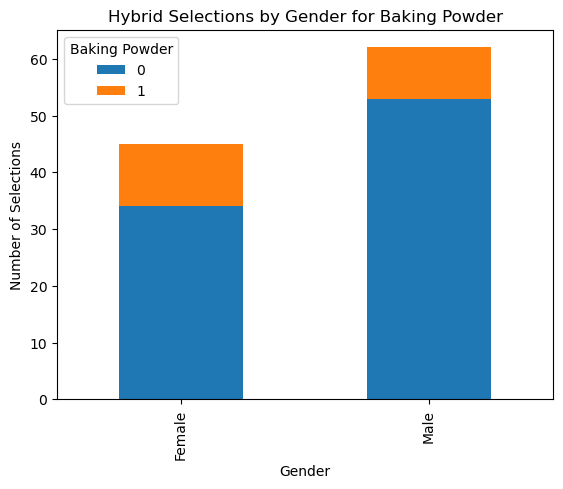


Chi-Square Test for Lomo (Hybrid) by Gender:
Chi-Square Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1
Observed frequencies:
[[40  5]
 [54  8]]
Expected frequencies:
[[39.53271028  5.46728972]
 [54.46728972  7.53271028]]


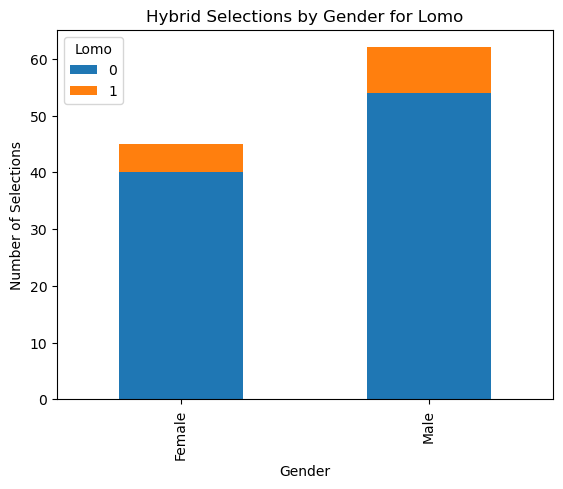


Chi-Square Test for Liqueur (Hybrid) by Gender:
Chi-Square Statistic: 4.303239963617099
p-value: 0.03803983775627734
Degrees of Freedom: 1
Observed frequencies:
[[23 22]
 [45 17]]
Expected frequencies:
[[28.59813084 16.40186916]
 [39.40186916 22.59813084]]


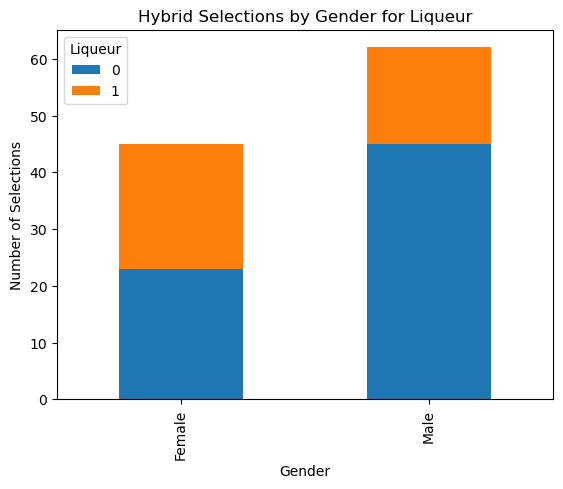


Chi-Square Test for Sardines (Hybrid) by Gender:
Chi-Square Statistic: 1.9457415420928408
p-value: 0.1630464801489347
Degrees of Freedom: 1
Observed frequencies:
[[38  7]
 [44 18]]
Expected frequencies:
[[34.48598131 10.51401869]
 [47.51401869 14.48598131]]


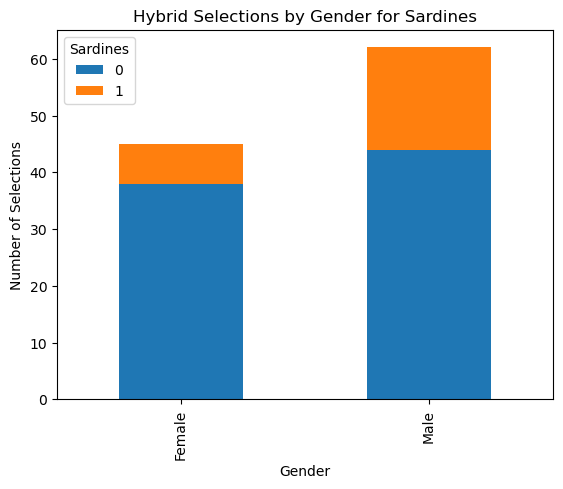


Chi-Square Test for Oat Milk (Hybrid) by Gender:
Chi-Square Statistic: 3.4470938313680253
p-value: 0.06336308908312169
Degrees of Freedom: 1
Observed frequencies:
[[36  9]
 [38 24]]
Expected frequencies:
[[31.12149533 13.87850467]
 [42.87850467 19.12149533]]


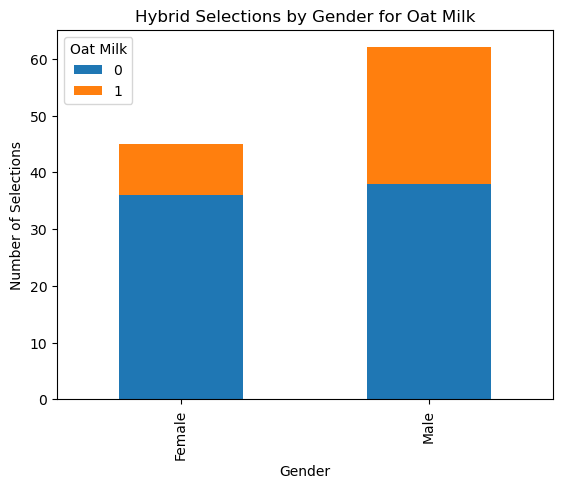


Chi-Square Test for Hot Dog Bread (Hybrid) by Gender:
Chi-Square Statistic: 5.295781831472622
p-value: 0.021377132650203978
Degrees of Freedom: 1
Observed frequencies:
[[42  3]
 [46 16]]
Expected frequencies:
[[37.00934579  7.99065421]
 [50.99065421 11.00934579]]


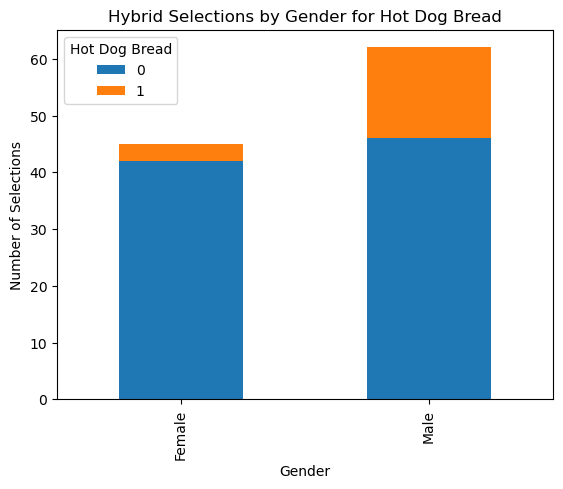

In [49]:
# Perform Chi-Square tests 
for item in df_hybrid_selection.columns[3:]:
    contingency_table = pd.crosstab(df_hybrid_selection['Gender'], df_hybrid_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Hybrid) by Gender:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Observed frequencies:")
    print(contingency_table.values)
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Hybrid Selections by Gender for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Gender')
    plt.show()

The analysis reveals that there are statistically significant gender differences in preferences for the Hybrid model when it comes to the products "Liqueur" and "Hot Dog Bread." 

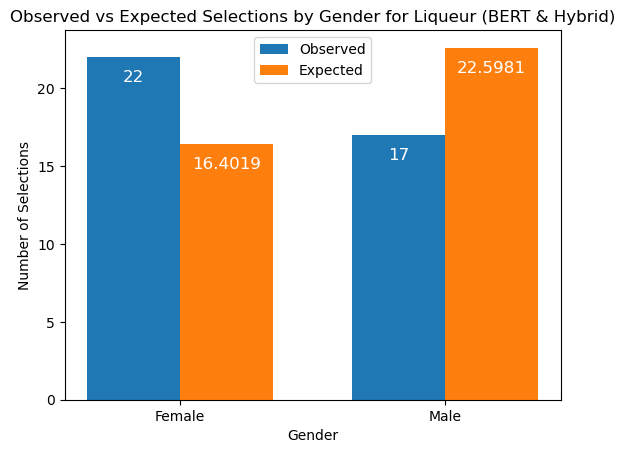

In [50]:
# Observed and expected frequencies for Liqueur using BERT & Hybrid
observed = np.array([22, 17])  # [Female, Male]
expected = np.array([16.40186916, 22.59813084])

categories = ['Female', 'Male']
labels = ['Observed', 'Expected']

x = np.arange(len(categories))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, observed, width, label='Observed')
rects2 = ax.bar(x + width/2, expected, width, label='Expected')

ax.set_ylabel('Number of Selections')
ax.set_xlabel('Gender')
ax.set_title('Observed vs Expected Selections by Gender for Liqueur (BERT & Hybrid)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

ax.bar_label(rects1, padding=-20, color='white', fontsize=12) 
ax.bar_label(rects2, padding=-20, color='white', fontsize=12)  

plt.show()

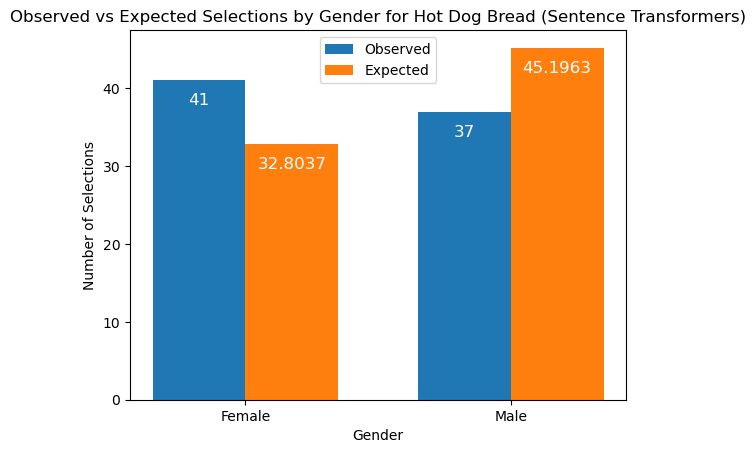

In [51]:
# Observed and expected frequencies for Hot Dog Bread using Sentence Transformers
observed_st = np.array([41, 37])  # [Female, Male]
expected_st = np.array([32.80373832, 45.19626168])

categories = ['Female', 'Male']
labels = ['Observed', 'Expected']

x = np.arange(len(categories))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, observed_st, width, label='Observed')
rects2 = ax.bar(x + width/2, expected_st, width, label='Expected')

ax.set_ylabel('Number of Selections')
ax.set_xlabel('Gender')
ax.set_title('Observed vs Expected Selections by Gender for Hot Dog Bread (Sentence Transformers)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

ax.bar_label(rects1, padding=-20, color='white', fontsize=12)  
ax.bar_label(rects2, padding=-20, color='white', fontsize=12)  

plt.show()

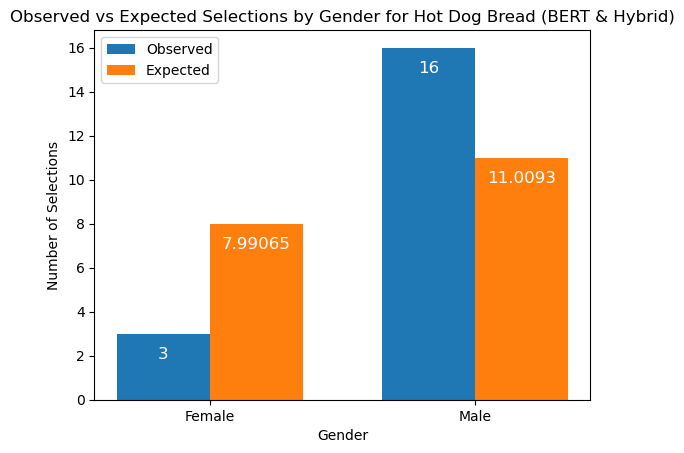

In [52]:
# Observed and expected frequencies for Hot Dog Bread using BERT & Hybrid
observed_bert_hybrid = np.array([3, 16])  # [Female, Male]
expected_bert_hybrid = np.array([7.99065421, 11.00934579])

categories = ['Female', 'Male']
labels = ['Observed', 'Expected']

x = np.arange(len(categories)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, observed_bert_hybrid, width, label='Observed')
rects2 = ax.bar(x + width/2, expected_bert_hybrid, width, label='Expected')

ax.set_ylabel('Number of Selections')
ax.set_xlabel('Gender')
ax.set_title('Observed vs Expected Selections by Gender for Hot Dog Bread (BERT & Hybrid)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

ax.bar_label(rects1, padding=-20, color='white', fontsize=12)  
ax.bar_label(rects2, padding=-20, color='white', fontsize=12)  

plt.show()

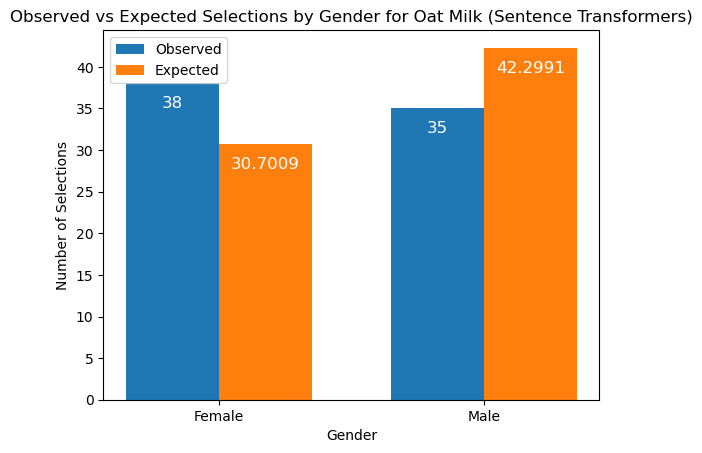

In [53]:
# Observed and expected frequencies for Oat Milk using Sentence Transformers
observed_oat_milk_st = np.array([38, 35]) 
expected_oat_milk_st = np.array([30.70093458, 42.29906542])

categories = ['Female', 'Male']
labels = ['Observed', 'Expected']

x = np.arange(len(categories)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, observed_oat_milk_st, width, label='Observed')
rects2 = ax.bar(x + width/2, expected_oat_milk_st, width, label='Expected')

ax.set_ylabel('Number of Selections')
ax.set_xlabel('Gender')
ax.set_title('Observed vs Expected Selections by Gender for Oat Milk (Sentence Transformers)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

ax.bar_label(rects1, padding=-20, color='white', fontsize=12)  
ax.bar_label(rects2, padding=-20, color='white', fontsize=12) 

plt.show()

Let's check item-based model significance for age group.


Chi-Square Test for Freezer Bags (Word2Vec) by Age Group:
Chi-Square Statistic: 1.0093453843453841
p-value: 0.6037031398561301
Degrees of Freedom: 2
Expected frequencies:
[[69.1588785   4.8411215 ]
 [20.56074766  1.43925234]
 [10.28037383  0.71962617]]


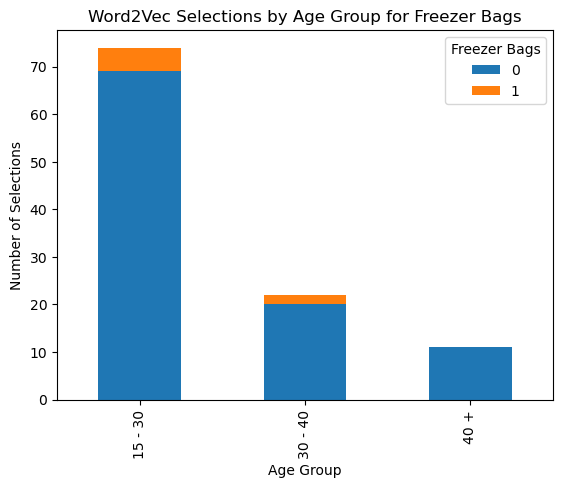


Chi-Square Test for Cheese (Word2Vec) by Age Group:
Chi-Square Statistic: 2.3593981386850658
p-value: 0.3073712221088276
Degrees of Freedom: 2
Expected frequencies:
[[52.56074766 21.43925234]
 [15.62616822  6.37383178]
 [ 7.81308411  3.18691589]]


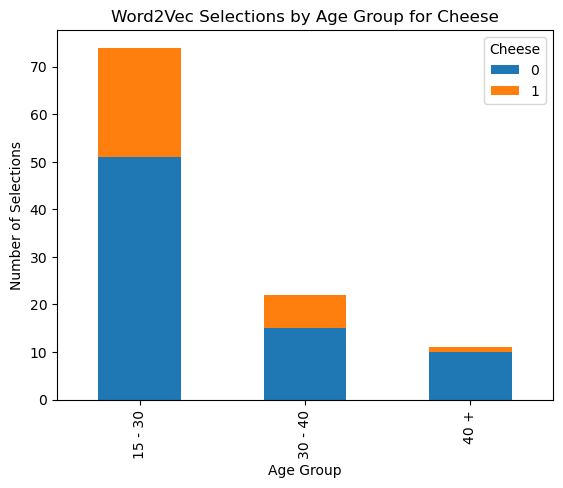


Chi-Square Test for Oil (Word2Vec) by Age Group:
Chi-Square Statistic: 1.8174340348253386
p-value: 0.40304098703213
Degrees of Freedom: 2
Expected frequencies:
[[63.62616822 10.37383178]
 [18.91588785  3.08411215]
 [ 9.45794393  1.54205607]]


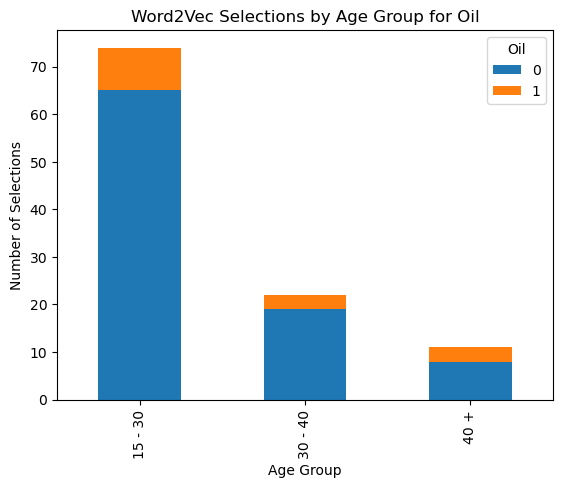


Chi-Square Test for Baking Powder (Word2Vec) by Age Group:
Chi-Square Statistic: 1.7070195195195197
p-value: 0.42591743767964485
Degrees of Freedom: 2
Expected frequencies:
[[68.46728972  5.53271028]
 [20.35514019  1.64485981]
 [10.17757009  0.82242991]]


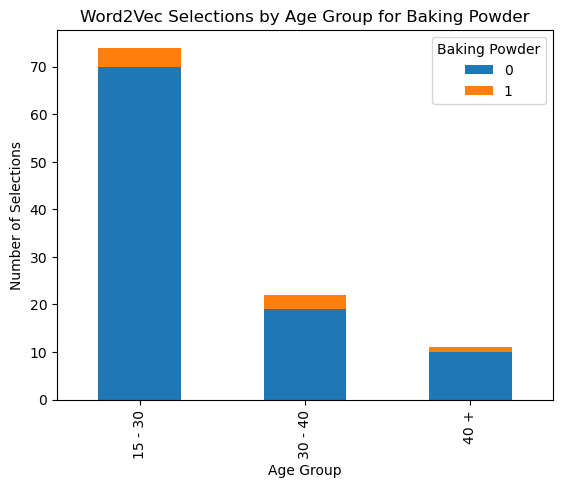


Chi-Square Test for Lomo (Word2Vec) by Age Group:
Chi-Square Statistic: 2.761488278729658
p-value: 0.2513914131927846
Degrees of Freedom: 2
Expected frequencies:
[[53.94392523 20.05607477]
 [16.03738318  5.96261682]
 [ 8.01869159  2.98130841]]


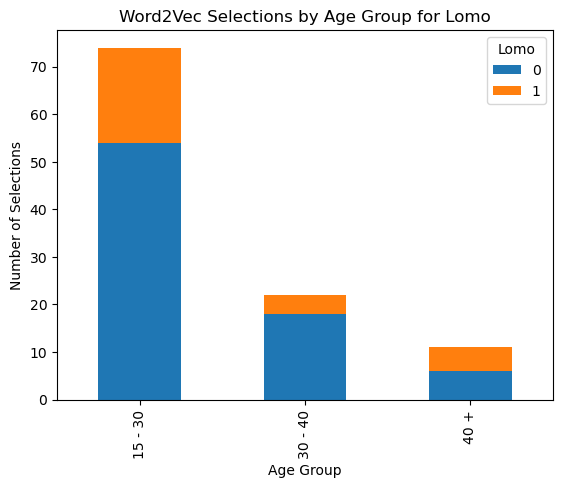


Chi-Square Test for Liqueur (Word2Vec) by Age Group:
Chi-Square Statistic: 1.0002121956667411
p-value: 0.6064663115374265
Degrees of Freedom: 2
Expected frequencies:
[[58.78504673 15.21495327]
 [17.47663551  4.52336449]
 [ 8.73831776  2.26168224]]


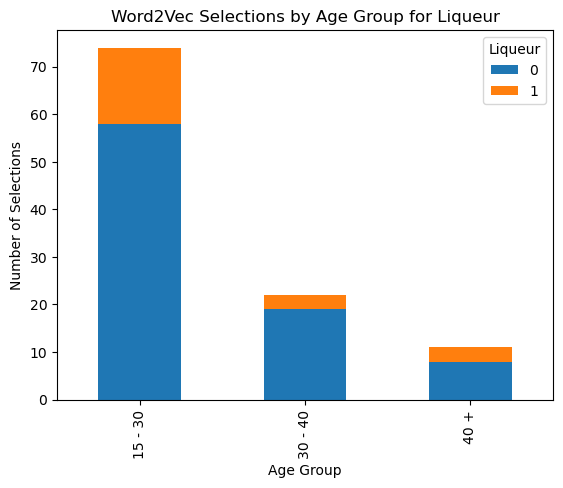


Chi-Square Test for Sardines (Word2Vec) by Age Group:
Chi-Square Statistic: 0.7922484396622325
p-value: 0.6729231003514993
Degrees of Freedom: 2
Expected frequencies:
[[60.1682243  13.8317757 ]
 [17.88785047  4.11214953]
 [ 8.94392523  2.05607477]]


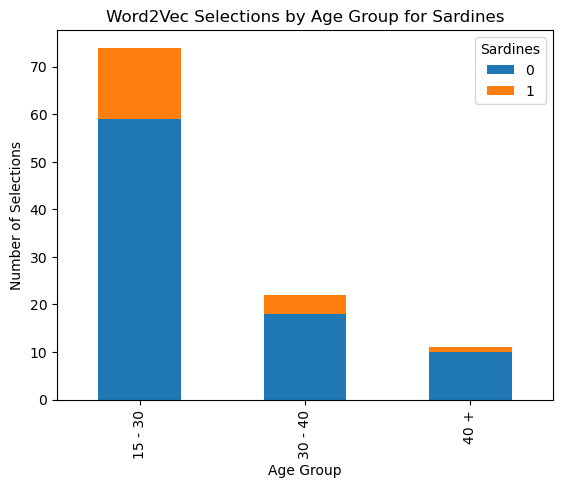


Chi-Square Test for Oat Milk (Word2Vec) by Age Group:
Chi-Square Statistic: 1.6131715595633123
p-value: 0.4463795054132166
Degrees of Freedom: 2
Expected frequencies:
[[67.08411215  6.91588785]
 [19.94392523  2.05607477]
 [ 9.97196262  1.02803738]]


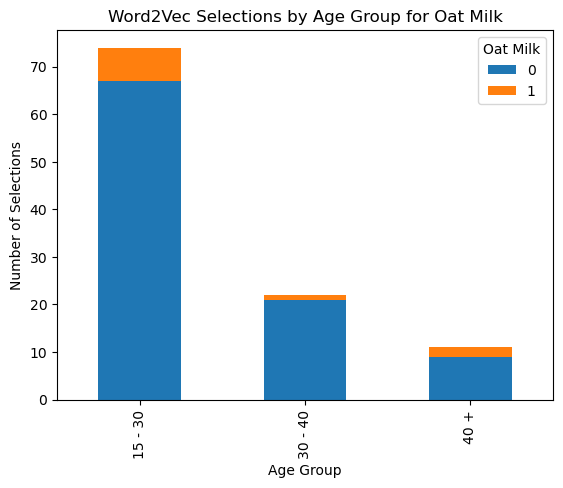


Chi-Square Test for Hot Dog Bread (Word2Vec) by Age Group:
Chi-Square Statistic: 0.8619715220838817
p-value: 0.6498681641544034
Degrees of Freedom: 2
Expected frequencies:
[[61.55140187 12.44859813]
 [18.29906542  3.70093458]
 [ 9.14953271  1.85046729]]


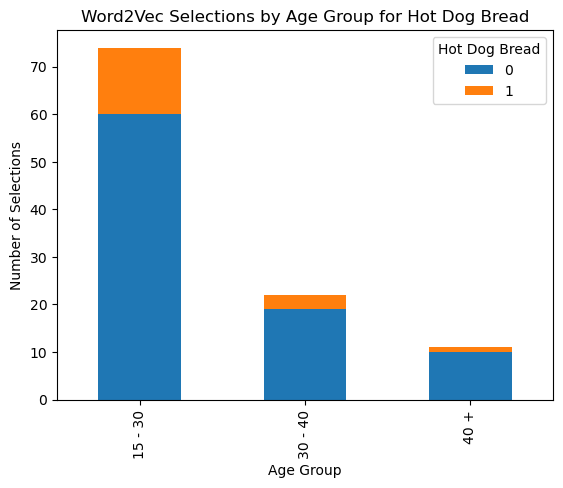

In [54]:
# Perform Chi-Square tests 
for item in df_word2vec_selection.columns[3:]:
    contingency_table = pd.crosstab(df_word2vec_selection['Age Group'], df_word2vec_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Word2Vec) by Age Group:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Word2Vec Selections by Age Group for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Age Group')
    plt.show()


Chi-Square Test for Freezer Bags (TF-IDF) by Age Group:
Chi-Square Statistic: 1.8818052502263027
p-value: 0.3902754039450808
Degrees of Freedom: 2
Expected frequencies:
[[65.70093458  8.29906542]
 [19.53271028  2.46728972]
 [ 9.76635514  1.23364486]]


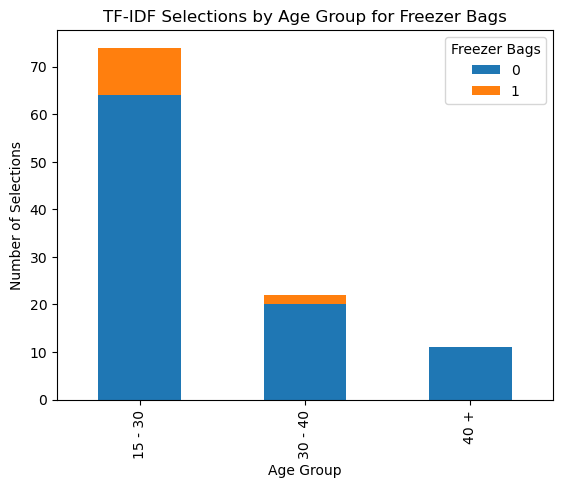


Chi-Square Test for Cheese (TF-IDF) by Age Group:
Chi-Square Statistic: 0.7388624888624892
p-value: 0.69112730137599
Degrees of Freedom: 2
Expected frequencies:
[[44.95327103 29.04672897]
 [13.36448598  8.63551402]
 [ 6.68224299  4.31775701]]


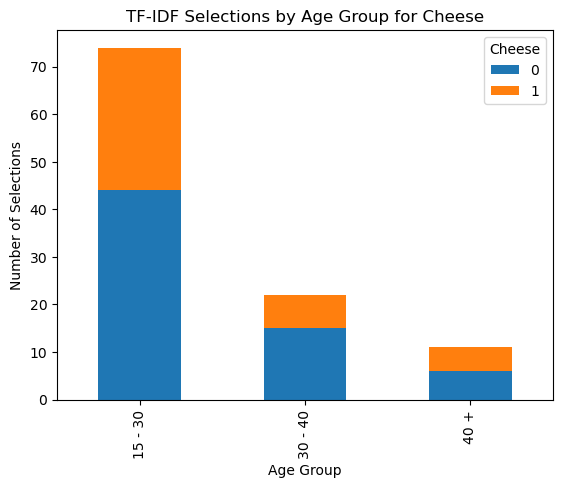


Chi-Square Test for Oil (TF-IDF) by Age Group:
Chi-Square Statistic: 1.0753236571125373
p-value: 0.584112411894499
Degrees of Freedom: 2
Expected frequencies:
[[50.48598131 23.51401869]
 [15.00934579  6.99065421]
 [ 7.5046729   3.4953271 ]]


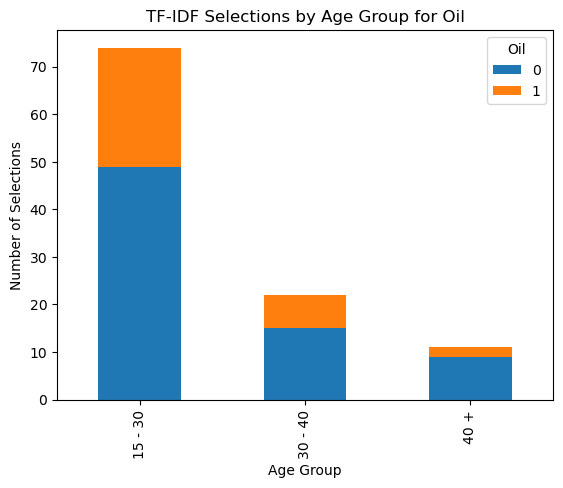


Chi-Square Test for Baking Powder (TF-IDF) by Age Group:
Chi-Square Statistic: 0.17650446889577315
p-value: 0.9155299194131086
Degrees of Freedom: 2
Expected frequencies:
[[63.62616822 10.37383178]
 [18.91588785  3.08411215]
 [ 9.45794393  1.54205607]]


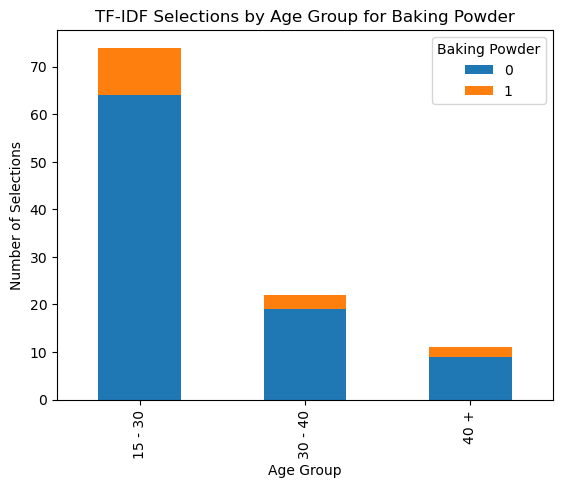


Chi-Square Test for Lomo (TF-IDF) by Age Group:
Chi-Square Statistic: 2.425177942703716
p-value: 0.2974262537286349
Degrees of Freedom: 2
Expected frequencies:
[[67.08411215  6.91588785]
 [19.94392523  2.05607477]
 [ 9.97196262  1.02803738]]


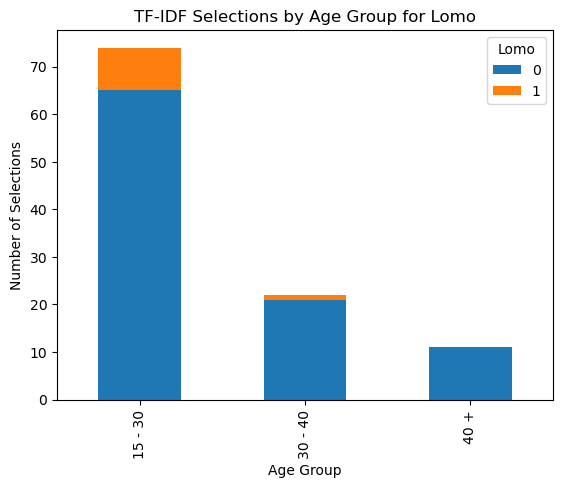


Chi-Square Test for Liqueur (TF-IDF) by Age Group:
Chi-Square Statistic: 0.8619715220838817
p-value: 0.6498681641544034
Degrees of Freedom: 2
Expected frequencies:
[[61.55140187 12.44859813]
 [18.29906542  3.70093458]
 [ 9.14953271  1.85046729]]


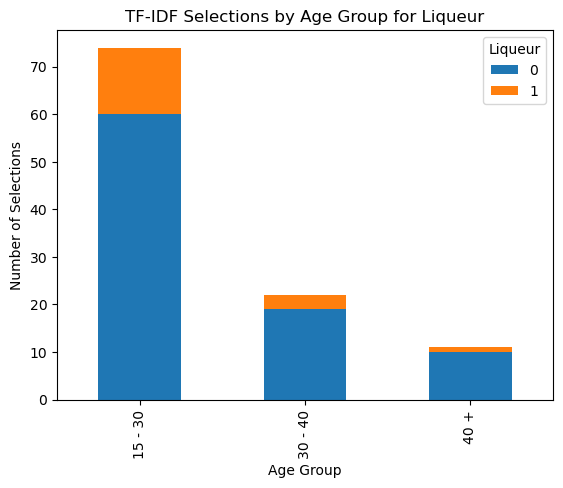


Chi-Square Test for Sardines (TF-IDF) by Age Group:
Chi-Square Statistic: 0.7922484396622325
p-value: 0.6729231003514993
Degrees of Freedom: 2
Expected frequencies:
[[60.1682243  13.8317757 ]
 [17.88785047  4.11214953]
 [ 8.94392523  2.05607477]]


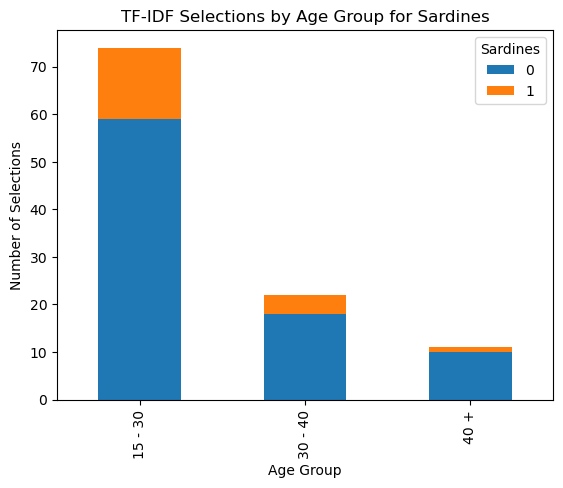


Chi-Square Test for Oat Milk (TF-IDF) by Age Group:
Chi-Square Statistic: 1.6131715595633123
p-value: 0.4463795054132166
Degrees of Freedom: 2
Expected frequencies:
[[67.08411215  6.91588785]
 [19.94392523  2.05607477]
 [ 9.97196262  1.02803738]]


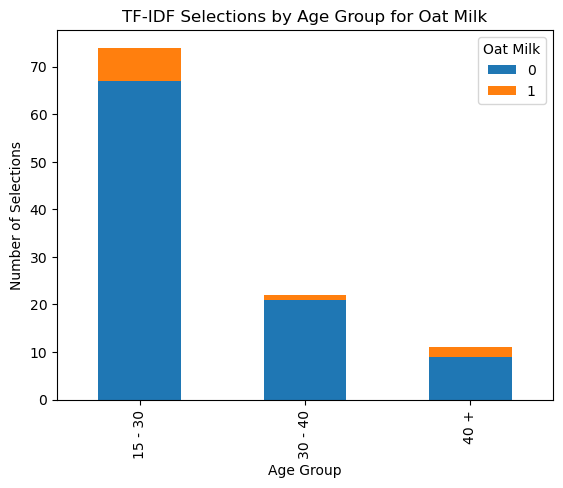


Chi-Square Test for Hot Dog Bread (TF-IDF) by Age Group:
Chi-Square Statistic: 0.8619715220838817
p-value: 0.6498681641544034
Degrees of Freedom: 2
Expected frequencies:
[[61.55140187 12.44859813]
 [18.29906542  3.70093458]
 [ 9.14953271  1.85046729]]


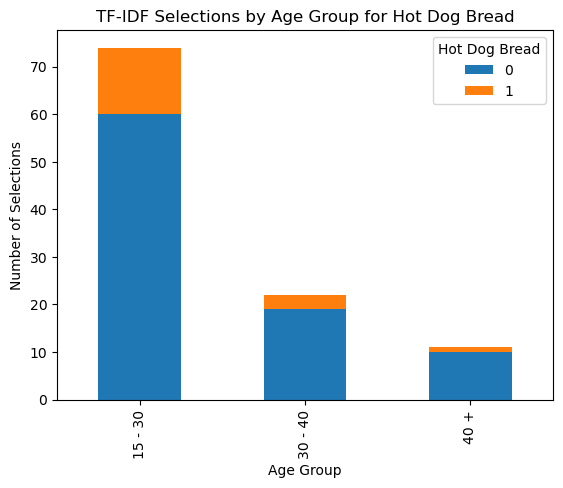

In [55]:
# Perform Chi-Square tests 
for item in df_tfidf_selection.columns[3:]:
    contingency_table = pd.crosstab(df_tfidf_selection['Age Group'], df_tfidf_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (TF-IDF) by Age Group:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'TF-IDF Selections by Age Group for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Age Group')
    plt.show()


Chi-Square Test for Freezer Bags (BERT) by Age Group:
Chi-Square Statistic: 3.6299103046090995
p-value: 0.1628452114588819
Degrees of Freedom: 2
Expected frequencies:
[[57.40186916 16.59813084]
 [17.06542056  4.93457944]
 [ 8.53271028  2.46728972]]


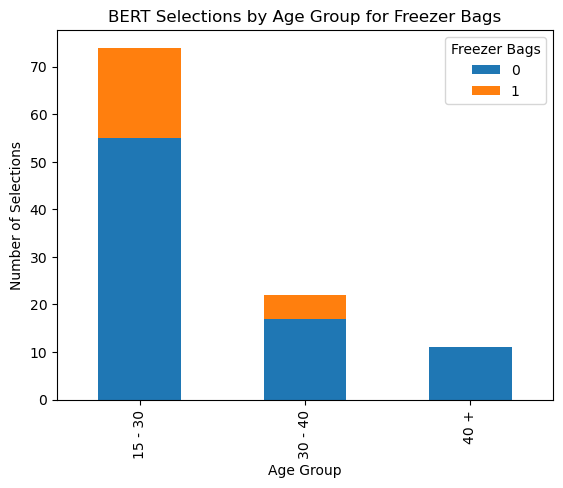


Chi-Square Test for Cheese (BERT) by Age Group:
Chi-Square Statistic: 0.26823345084214667
p-value: 0.8744879836676127
Degrees of Freedom: 2
Expected frequencies:
[[63.62616822 10.37383178]
 [18.91588785  3.08411215]
 [ 9.45794393  1.54205607]]


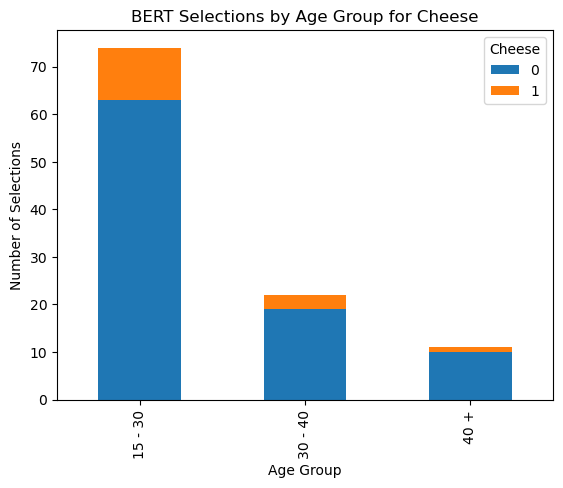


Chi-Square Test for Oil (BERT) by Age Group:
Chi-Square Statistic: 2.1509939691757873
p-value: 0.3411281777189391
Degrees of Freedom: 2
Expected frequencies:
[[68.46728972  5.53271028]
 [20.35514019  1.64485981]
 [10.17757009  0.82242991]]


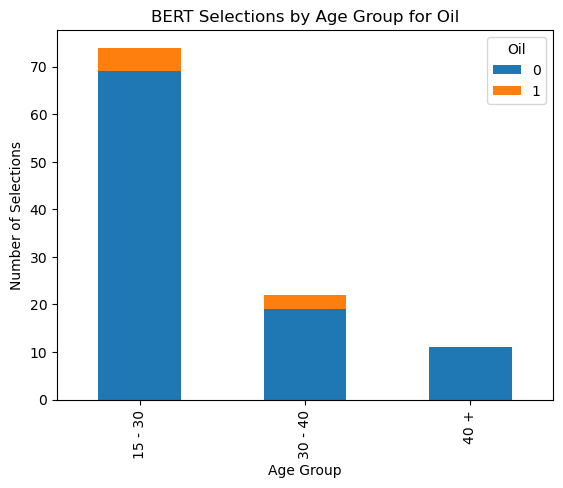


Chi-Square Test for Baking Powder (BERT) by Age Group:
Chi-Square Statistic: 1.7998264044775674
p-value: 0.40660495060840507
Degrees of Freedom: 2
Expected frequencies:
[[59.47663551 14.52336449]
 [17.68224299  4.31775701]
 [ 8.8411215   2.1588785 ]]


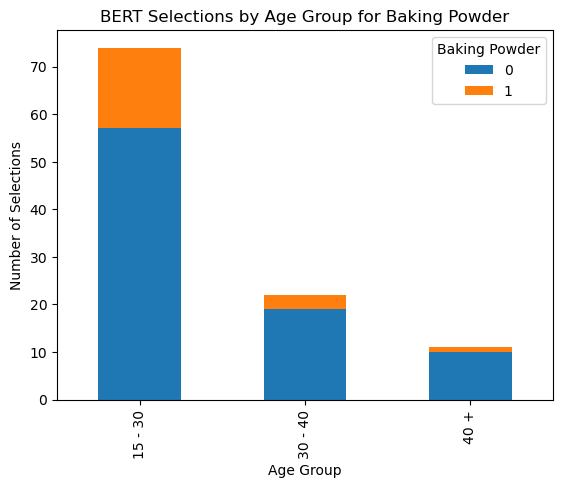


Chi-Square Test for Lomo (BERT) by Age Group:
Chi-Square Statistic: 0.21620005172636744
p-value: 0.8975378149455945
Degrees of Freedom: 2
Expected frequencies:
[[65.70093458  8.29906542]
 [19.53271028  2.46728972]
 [ 9.76635514  1.23364486]]


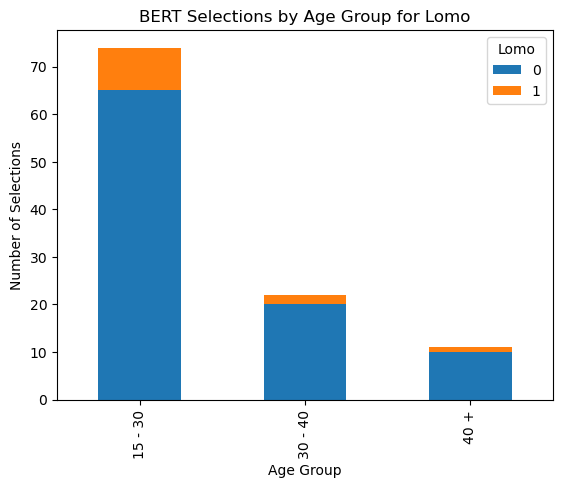


Chi-Square Test for Liqueur (BERT) by Age Group:
Chi-Square Statistic: 0.5888467653173535
p-value: 0.7449610210879434
Degrees of Freedom: 2
Expected frequencies:
[[47.02803738 26.97196262]
 [13.98130841  8.01869159]
 [ 6.99065421  4.00934579]]


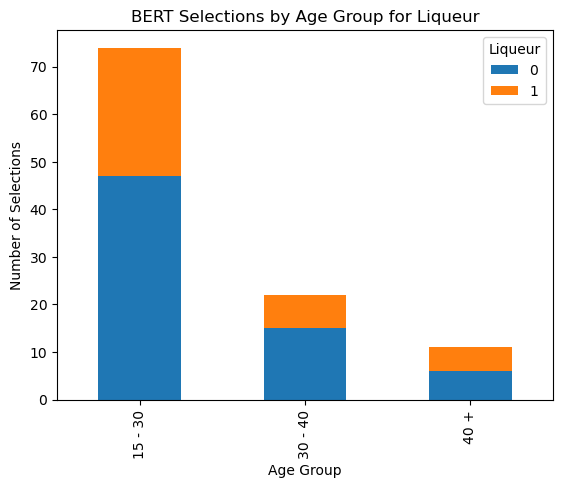


Chi-Square Test for Sardines (BERT) by Age Group:
Chi-Square Statistic: 3.4533421226104153
p-value: 0.17787556231124096
Degrees of Freedom: 2
Expected frequencies:
[[56.71028037 17.28971963]
 [16.85981308  5.14018692]
 [ 8.42990654  2.57009346]]


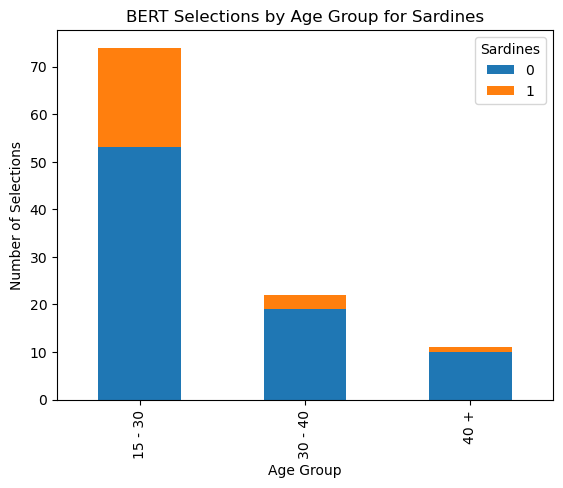


Chi-Square Test for Oat Milk (BERT) by Age Group:
Chi-Square Statistic: 0.9241845709904679
p-value: 0.6299642007010078
Degrees of Freedom: 2
Expected frequencies:
[[51.17757009 22.82242991]
 [15.21495327  6.78504673]
 [ 7.60747664  3.39252336]]


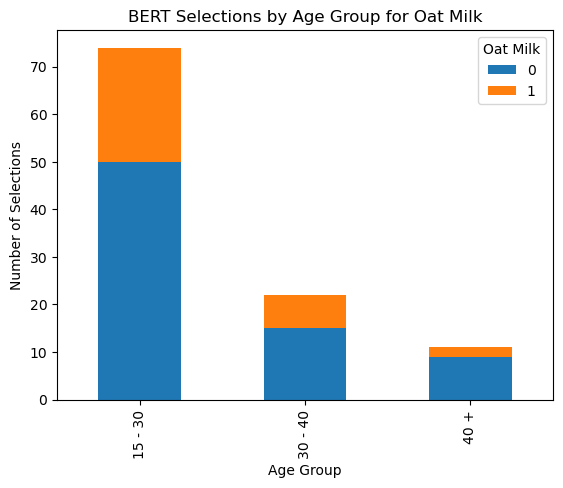


Chi-Square Test for Hot Dog Bread (BERT) by Age Group:
Chi-Square Statistic: 0.005896365047082756
p-value: 0.9970561590988749
Degrees of Freedom: 2
Expected frequencies:
[[60.85981308 13.14018692]
 [18.09345794  3.90654206]
 [ 9.04672897  1.95327103]]


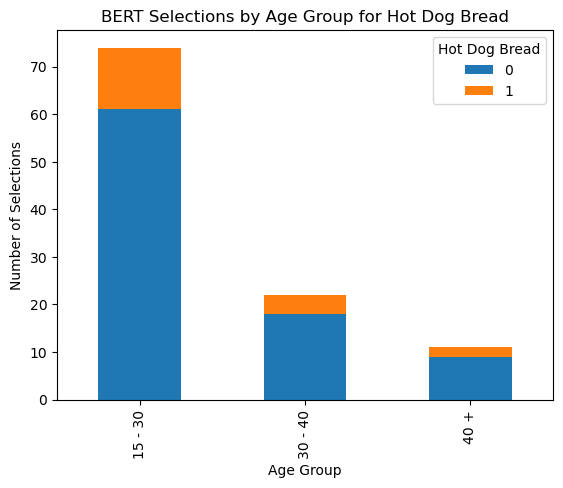

In [56]:
# Perform Chi-Square tests
for item in df_bert_selection.columns[3:]:
    contingency_table = pd.crosstab(df_bert_selection['Age Group'], df_bert_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (BERT) by Age Group:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    

    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'BERT Selections by Age Group for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Age Group')
    plt.show()


Chi-Square Test for Freezer Bags (Hybrid) by Age Group:
Chi-Square Statistic: 3.6299103046090995
p-value: 0.1628452114588819
Degrees of Freedom: 2
Expected frequencies:
[[57.40186916 16.59813084]
 [17.06542056  4.93457944]
 [ 8.53271028  2.46728972]]


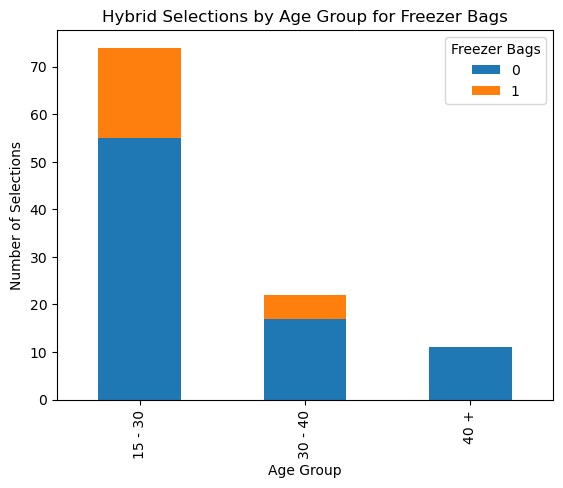


Chi-Square Test for Cheese (Hybrid) by Age Group:
Chi-Square Statistic: 1.2083056318350436
p-value: 0.5465372482216642
Degrees of Freedom: 2
Expected frequencies:
[[62.24299065 11.75700935]
 [18.5046729   3.4953271 ]
 [ 9.25233645  1.74766355]]


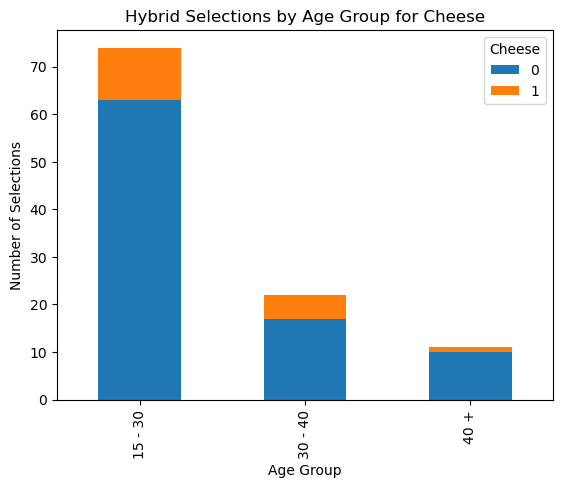


Chi-Square Test for Oil (Hybrid) by Age Group:
Chi-Square Statistic: 0.8850074196608849
p-value: 0.6424259576723235
Degrees of Freedom: 2
Expected frequencies:
[[69.85046729  4.14953271]
 [20.76635514  1.23364486]
 [10.38317757  0.61682243]]


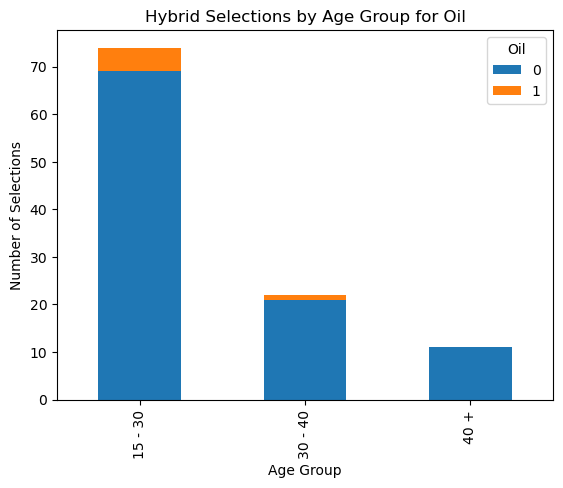


Chi-Square Test for Baking Powder (Hybrid) by Age Group:
Chi-Square Statistic: 3.7911886808438524
p-value: 0.15022902132773133
Degrees of Freedom: 2
Expected frequencies:
[[60.1682243  13.8317757 ]
 [17.88785047  4.11214953]
 [ 8.94392523  2.05607477]]


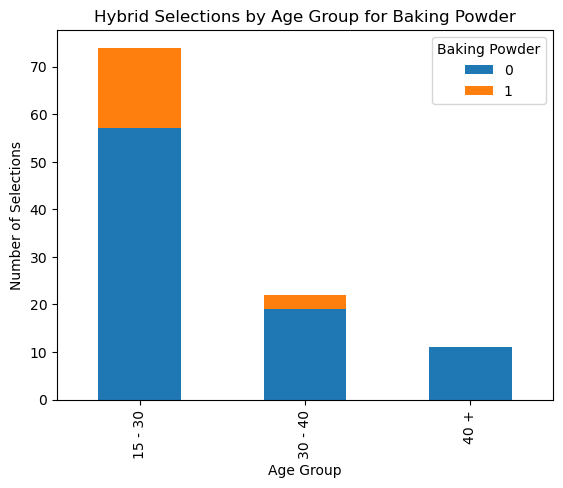


Chi-Square Test for Lomo (Hybrid) by Age Group:
Chi-Square Statistic: 3.951771776239861
p-value: 0.1386384396786416
Degrees of Freedom: 2
Expected frequencies:
[[65.00934579  8.99065421]
 [19.3271028   2.6728972 ]
 [ 9.6635514   1.3364486 ]]


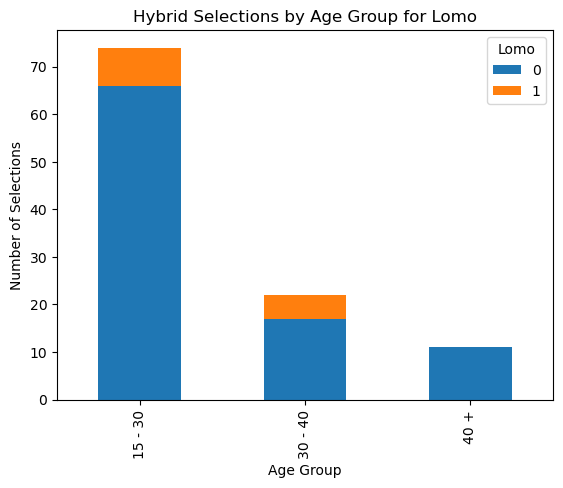


Chi-Square Test for Liqueur (Hybrid) by Age Group:
Chi-Square Statistic: 0.5888467653173535
p-value: 0.7449610210879434
Degrees of Freedom: 2
Expected frequencies:
[[47.02803738 26.97196262]
 [13.98130841  8.01869159]
 [ 6.99065421  4.00934579]]


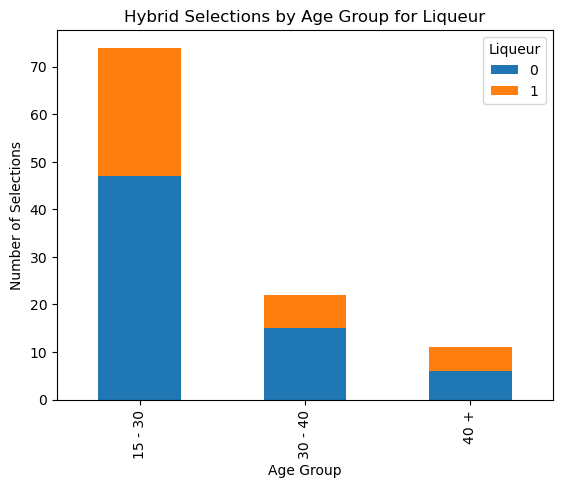


Chi-Square Test for Sardines (Hybrid) by Age Group:
Chi-Square Statistic: 3.4533421226104153
p-value: 0.17787556231124096
Degrees of Freedom: 2
Expected frequencies:
[[56.71028037 17.28971963]
 [16.85981308  5.14018692]
 [ 8.42990654  2.57009346]]


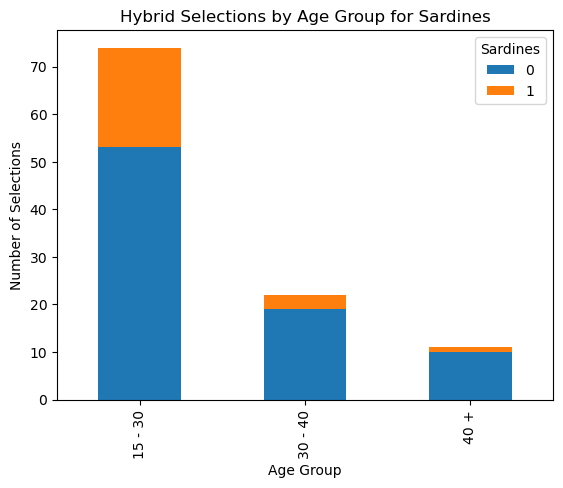


Chi-Square Test for Oat Milk (Hybrid) by Age Group:
Chi-Square Statistic: 0.9241845709904679
p-value: 0.6299642007010078
Degrees of Freedom: 2
Expected frequencies:
[[51.17757009 22.82242991]
 [15.21495327  6.78504673]
 [ 7.60747664  3.39252336]]


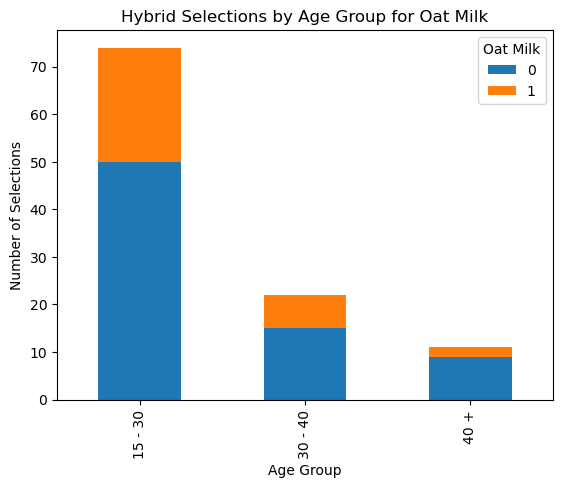


Chi-Square Test for Hot Dog Bread (Hybrid) by Age Group:
Chi-Square Statistic: 0.005896365047082756
p-value: 0.9970561590988749
Degrees of Freedom: 2
Expected frequencies:
[[60.85981308 13.14018692]
 [18.09345794  3.90654206]
 [ 9.04672897  1.95327103]]


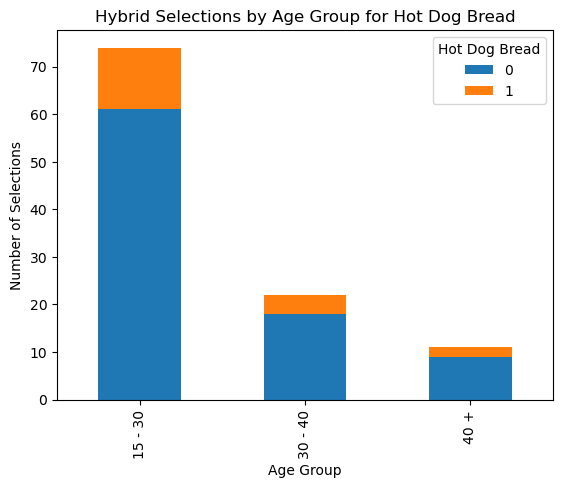

In [57]:
# Perform Chi-Square tests 
for item in df_hybrid_selection.columns[3:]:
    contingency_table = pd.crosstab(df_hybrid_selection['Age Group'], df_hybrid_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Hybrid) by Age Group:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Hybrid Selections by Age Group for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Age Group')
    plt.show()


Chi-Square Test for Freezer Bags (Sentence Transformers) by Age Group:
Chi-Square Statistic: 5.633529552279553
p-value: 0.059799093551639364
Degrees of Freedom: 2
Expected frequencies:
[[18.6728972  55.3271028 ]
 [ 5.55140187 16.44859813]
 [ 2.77570093  8.22429907]]


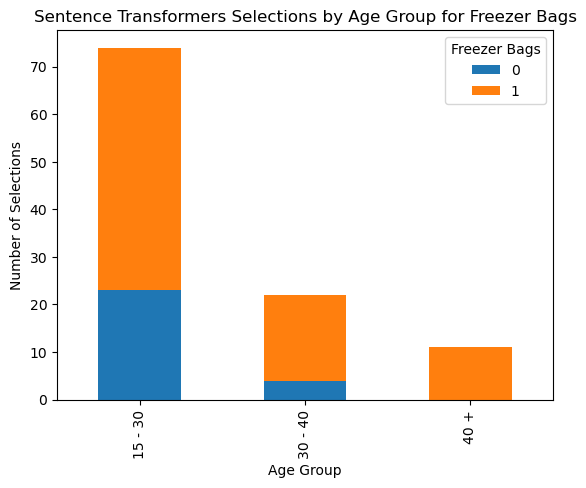


Chi-Square Test for Cheese (Sentence Transformers) by Age Group:
Chi-Square Statistic: 1.9206072277325346
p-value: 0.3827766520316463
Degrees of Freedom: 2
Expected frequencies:
[[51.17757009 22.82242991]
 [15.21495327  6.78504673]
 [ 7.60747664  3.39252336]]


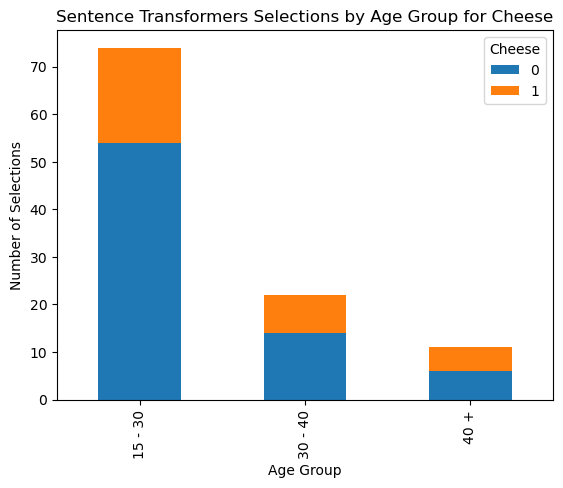


Chi-Square Test for Oil (Sentence Transformers) by Age Group:
Chi-Square Statistic: 0.38747016811532936
p-value: 0.8238761332833444
Degrees of Freedom: 2
Expected frequencies:
[[31.12149533 42.87850467]
 [ 9.25233645 12.74766355]
 [ 4.62616822  6.37383178]]


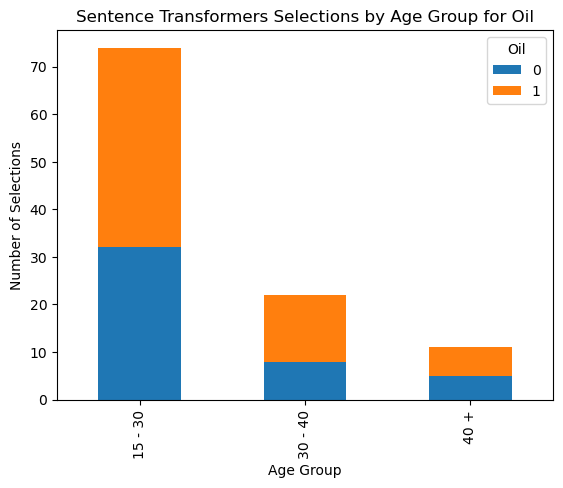


Chi-Square Test for Baking Powder (Sentence Transformers) by Age Group:
Chi-Square Statistic: 4.51157196611742
p-value: 0.1047911472929494
Degrees of Freedom: 2
Expected frequencies:
[[35.96261682 38.03738318]
 [10.69158879 11.30841121]
 [ 5.34579439  5.65420561]]


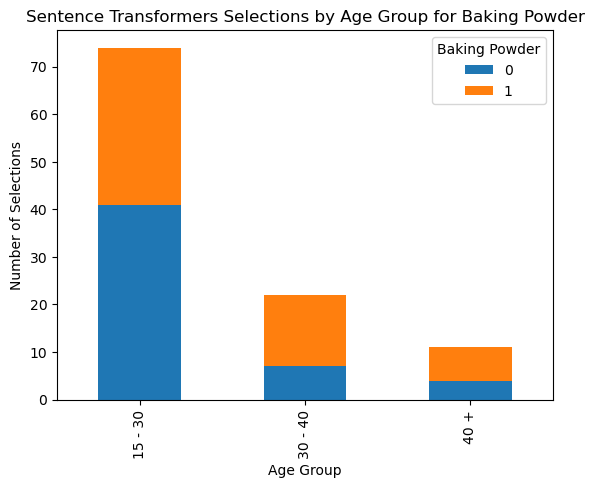


Chi-Square Test for Lomo (Sentence Transformers) by Age Group:
Chi-Square Statistic: 0.7857295712134422
p-value: 0.6751200273597144
Degrees of Freedom: 2
Expected frequencies:
[[31.12149533 42.87850467]
 [ 9.25233645 12.74766355]
 [ 4.62616822  6.37383178]]


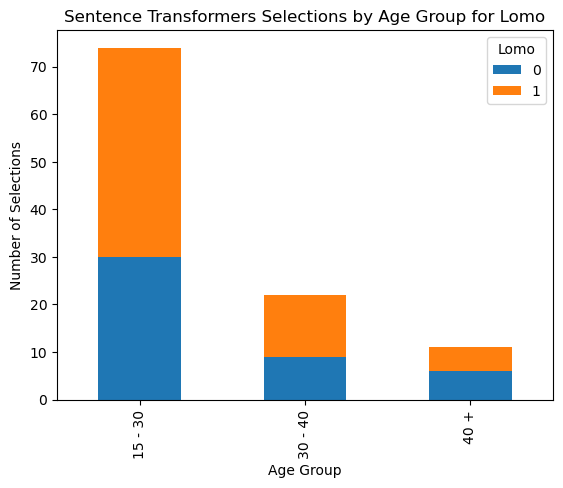


Chi-Square Test for Liqueur (Sentence Transformers) by Age Group:
Chi-Square Statistic: 2.7674842049842048
p-value: 0.2506388796031302
Degrees of Freedom: 2
Expected frequencies:
[[49.79439252 24.20560748]
 [14.80373832  7.19626168]
 [ 7.40186916  3.59813084]]


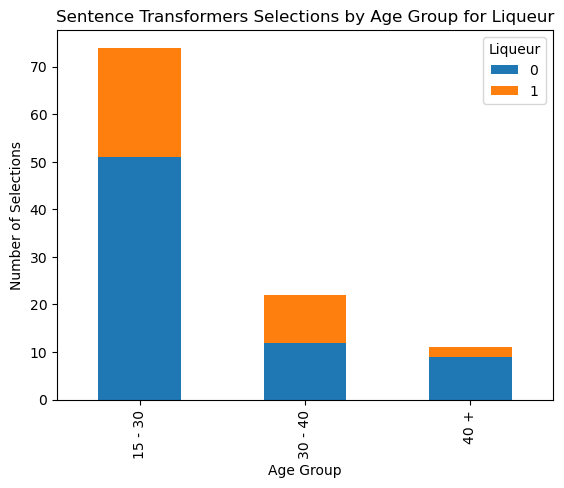


Chi-Square Test for Sardines (Sentence Transformers) by Age Group:
Chi-Square Statistic: 2.323119448119447
p-value: 0.31299761006077187
Degrees of Freedom: 2
Expected frequencies:
[[26.97196262 47.02803738]
 [ 8.01869159 13.98130841]
 [ 4.00934579  6.99065421]]


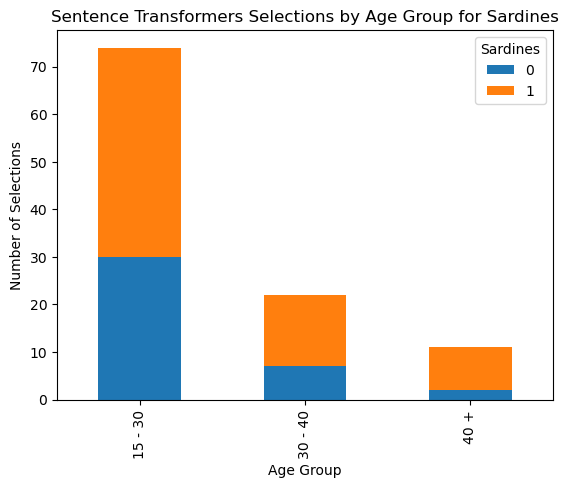


Chi-Square Test for Oat Milk (Sentence Transformers) by Age Group:
Chi-Square Statistic: 1.0753236571125373
p-value: 0.584112411894499
Degrees of Freedom: 2
Expected frequencies:
[[23.51401869 50.48598131]
 [ 6.99065421 15.00934579]
 [ 3.4953271   7.5046729 ]]


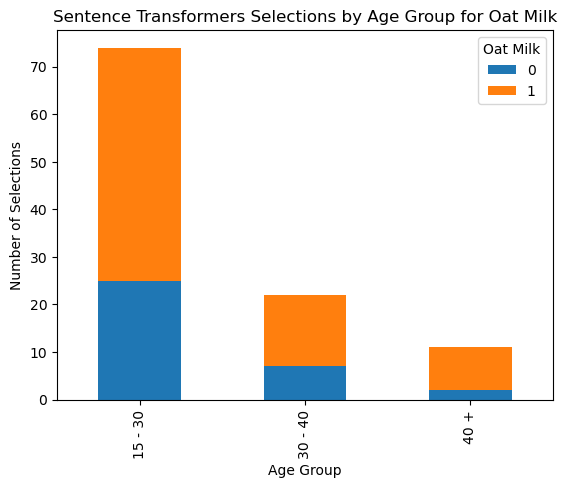


Chi-Square Test for Hot Dog Bread (Sentence Transformers) by Age Group:
Chi-Square Statistic: 2.6122563363942675
p-value: 0.27086677931999764
Degrees of Freedom: 2
Expected frequencies:
[[20.05607477 53.94392523]
 [ 5.96261682 16.03738318]
 [ 2.98130841  8.01869159]]


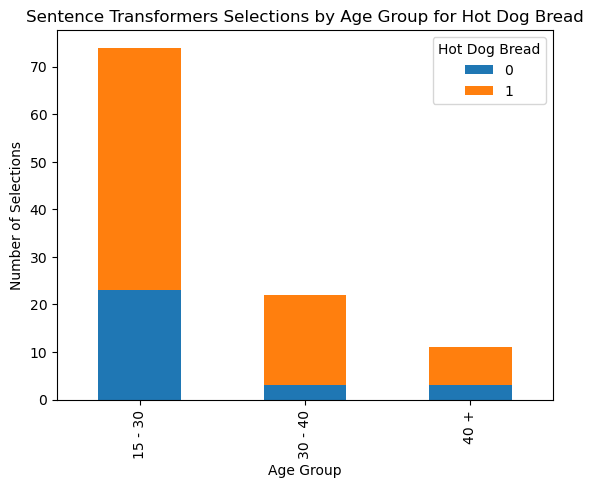

In [58]:
# Perform Chi-Square tests
for item in df_sentence_transformers_selection.columns[3:]:
    contingency_table = pd.crosstab(df_sentence_transformers_selection['Age Group'], df_sentence_transformers_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Sentence Transformers) by Age Group:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Sentence Transformers Selections by Age Group for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Age Group')
    plt.show()

Nothing is statistically significant. 

Let's check item-based model significance for educational level.


Chi-Square Test for Freezer Bags (Word2Vec) by Educational Level:
Chi-Square Statistic: 2.139025910364146
p-value: 0.34317561862920626
Degrees of Freedom: 2
Expected frequencies:
[[37.38317757  2.61682243]
 [47.6635514   3.3364486 ]
 [14.95327103  1.04672897]]


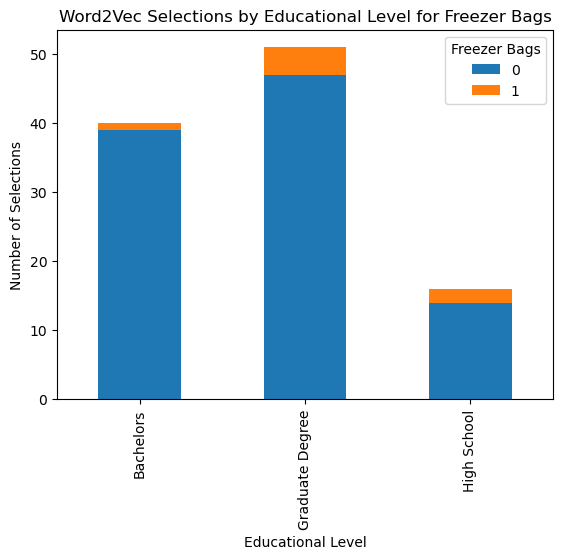


Chi-Square Test for Cheese (Word2Vec) by Educational Level:
Chi-Square Statistic: 2.109671489563567
p-value: 0.3482496244266603
Degrees of Freedom: 2
Expected frequencies:
[[28.41121495 11.58878505]
 [36.22429907 14.77570093]
 [11.36448598  4.63551402]]


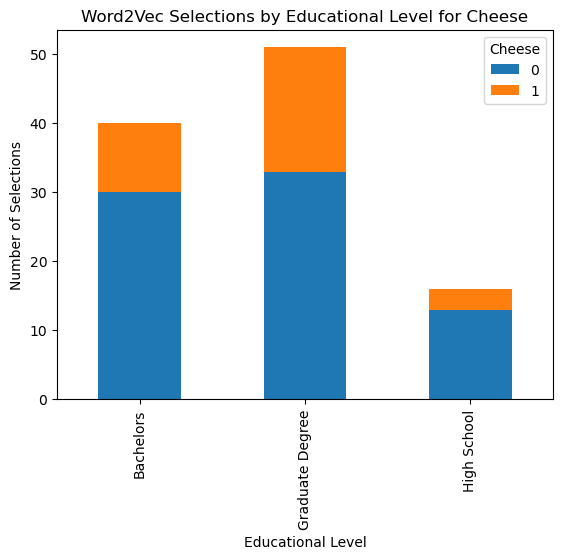


Chi-Square Test for Oil (Word2Vec) by Educational Level:
Chi-Square Statistic: 4.7695234796817285
p-value: 0.09211092332826712
Degrees of Freedom: 2
Expected frequencies:
[[34.39252336  5.60747664]
 [43.85046729  7.14953271]
 [13.75700935  2.24299065]]


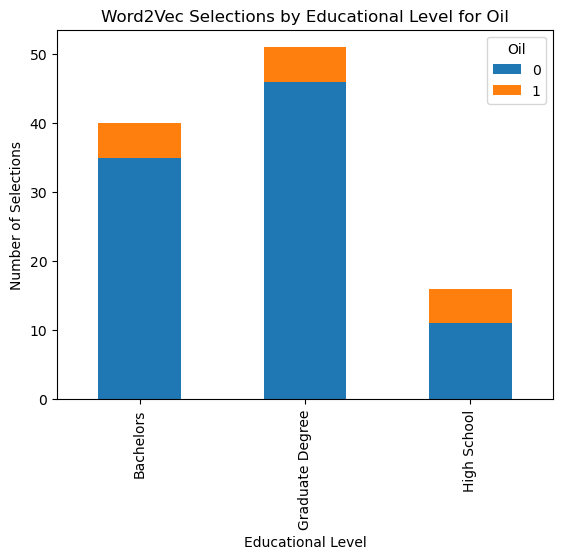


Chi-Square Test for Baking Powder (Word2Vec) by Educational Level:
Chi-Square Statistic: 2.822518382352942
p-value: 0.24383605355648882
Degrees of Freedom: 2
Expected frequencies:
[[37.00934579  2.99065421]
 [47.18691589  3.81308411]
 [14.80373832  1.19626168]]


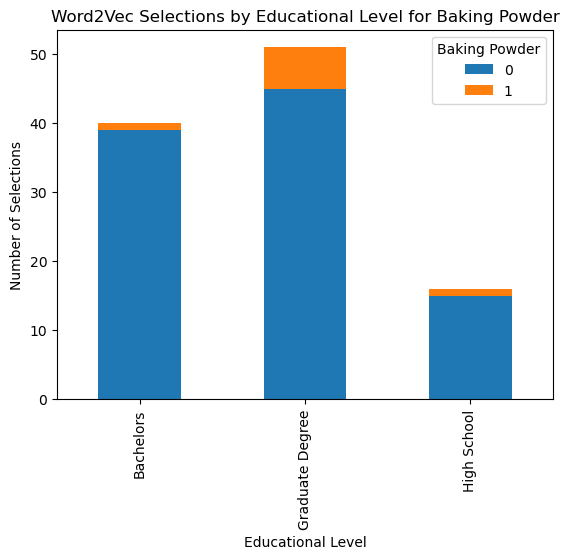


Chi-Square Test for Lomo (Word2Vec) by Educational Level:
Chi-Square Statistic: 3.212981961131048
p-value: 0.2005902556681665
Degrees of Freedom: 2
Expected frequencies:
[[29.1588785  10.8411215 ]
 [37.17757009 13.82242991]
 [11.6635514   4.3364486 ]]


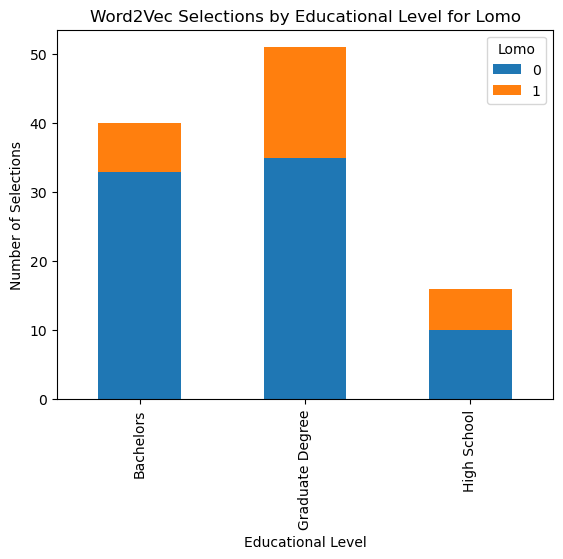


Chi-Square Test for Liqueur (Word2Vec) by Educational Level:
Chi-Square Statistic: 0.15257064590542116
p-value: 0.9265518023447961
Degrees of Freedom: 2
Expected frequencies:
[[31.77570093  8.22429907]
 [40.51401869 10.48598131]
 [12.71028037  3.28971963]]


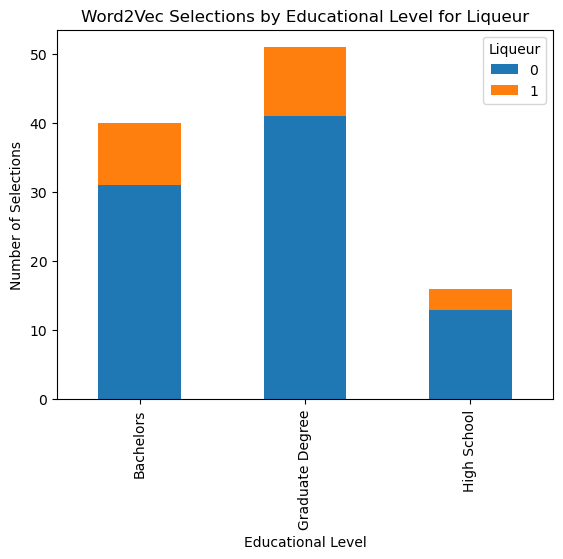


Chi-Square Test for Sardines (Word2Vec) by Educational Level:
Chi-Square Statistic: 0.6364805893621809
p-value: 0.7274279703393608
Degrees of Freedom: 2
Expected frequencies:
[[32.52336449  7.47663551]
 [41.46728972  9.53271028]
 [13.00934579  2.99065421]]


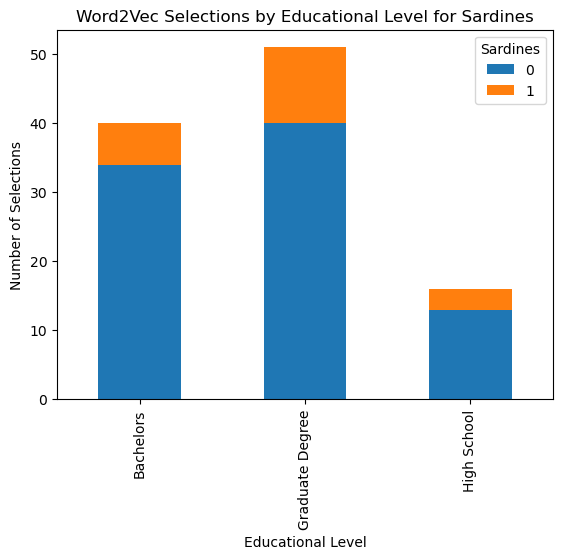


Chi-Square Test for Oat Milk (Word2Vec) by Educational Level:
Chi-Square Statistic: 5.655405296139074
p-value: 0.059148582811854915
Degrees of Freedom: 2
Expected frequencies:
[[36.26168224  3.73831776]
 [46.23364486  4.76635514]
 [14.5046729   1.4953271 ]]


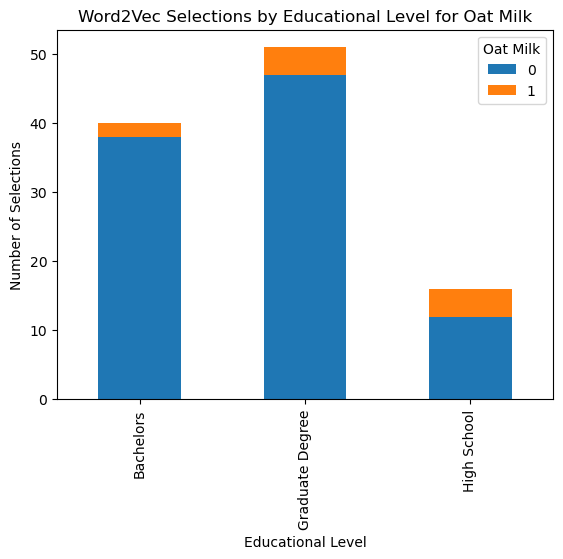


Chi-Square Test for Hot Dog Bread (Word2Vec) by Educational Level:
Chi-Square Statistic: 2.1941174940637924
p-value: 0.3338515830023913
Degrees of Freedom: 2
Expected frequencies:
[[33.27102804  6.72897196]
 [42.42056075  8.57943925]
 [13.30841121  2.69158879]]


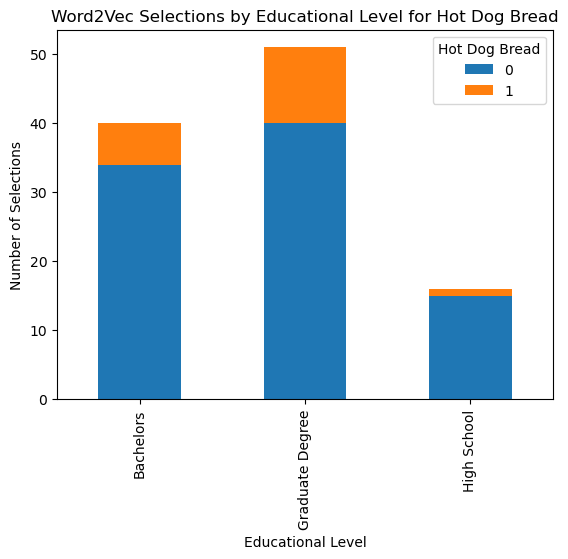

In [59]:
# Perform Chi-Square tests 
for item in df_word2vec_selection.columns[3:]:
    contingency_table = pd.crosstab(df_word2vec_selection['Educational Level'], df_word2vec_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Word2Vec) by Educational Level:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Word2Vec Selections by Educational Level for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Educational Level')
    plt.show()


Chi-Square Test for Freezer Bags (TF-IDF) by Educational Level:
Chi-Square Statistic: 2.6120588235294124
p-value: 0.27089353047768916
Degrees of Freedom: 2
Expected frequencies:
[[35.51401869  4.48598131]
 [45.28037383  5.71962617]
 [14.20560748  1.79439252]]


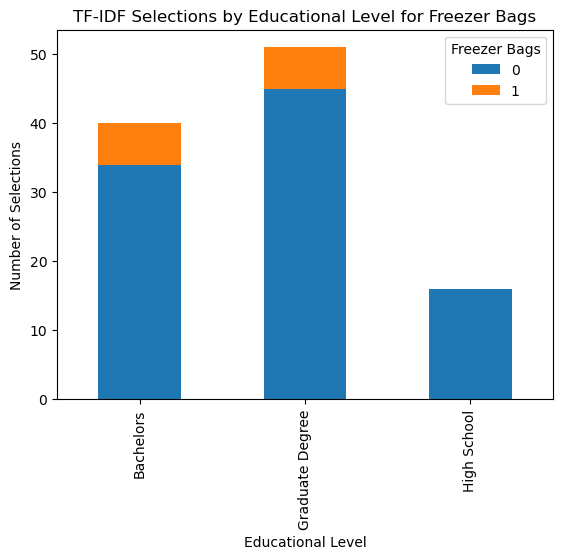


Chi-Square Test for Cheese (TF-IDF) by Educational Level:
Chi-Square Statistic: 3.2863517201752495
p-value: 0.19336496603183145
Degrees of Freedom: 2
Expected frequencies:
[[24.29906542 15.70093458]
 [30.98130841 20.01869159]
 [ 9.71962617  6.28037383]]


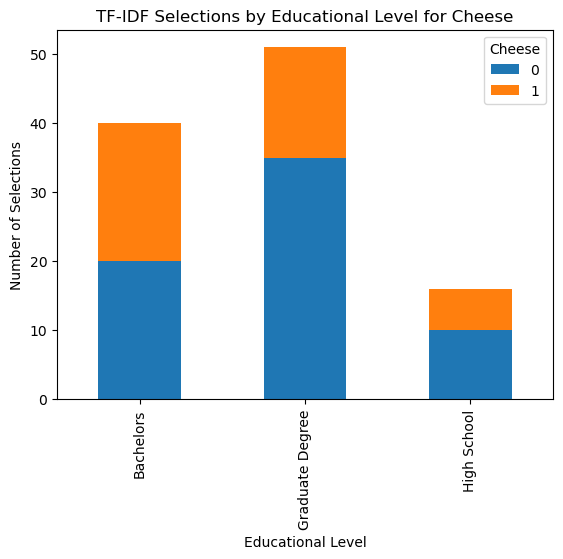


Chi-Square Test for Oil (TF-IDF) by Educational Level:
Chi-Square Statistic: 4.005399464378821
p-value: 0.1349704069718127
Degrees of Freedom: 2
Expected frequencies:
[[27.28971963 12.71028037]
 [34.79439252 16.20560748]
 [10.91588785  5.08411215]]


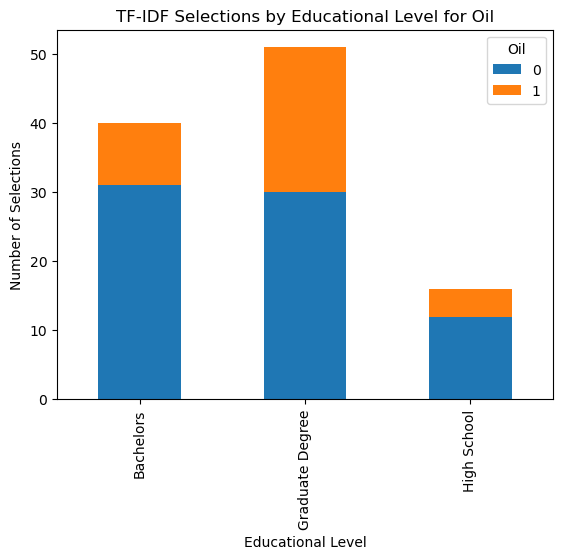


Chi-Square Test for Baking Powder (TF-IDF) by Educational Level:
Chi-Square Statistic: 2.2643430306905366
p-value: 0.3223325458261549
Degrees of Freedom: 2
Expected frequencies:
[[34.39252336  5.60747664]
 [43.85046729  7.14953271]
 [13.75700935  2.24299065]]


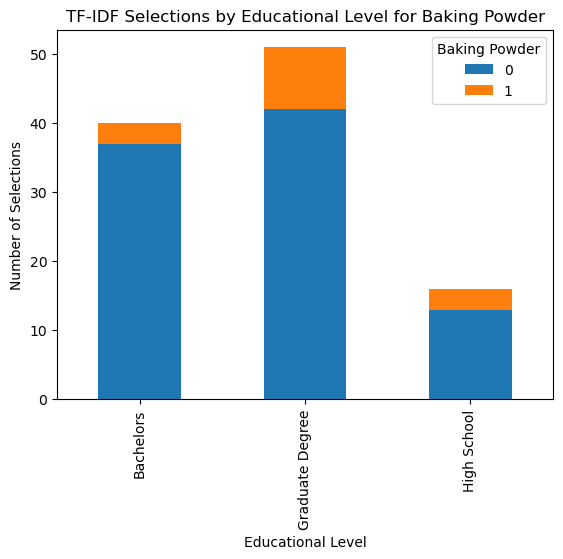


Chi-Square Test for Lomo (TF-IDF) by Educational Level:
Chi-Square Statistic: 2.964994441075399
p-value: 0.22706993606964307
Degrees of Freedom: 2
Expected frequencies:
[[36.26168224  3.73831776]
 [46.23364486  4.76635514]
 [14.5046729   1.4953271 ]]


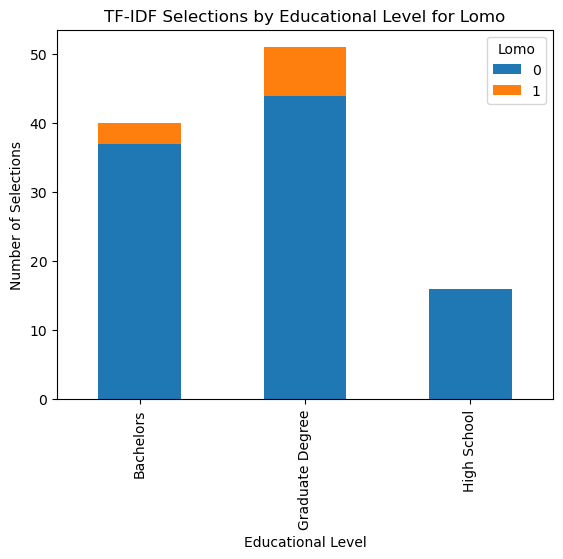


Chi-Square Test for Liqueur (TF-IDF) by Educational Level:
Chi-Square Statistic: 0.5913667964064525
p-value: 0.7440229497376407
Degrees of Freedom: 2
Expected frequencies:
[[33.27102804  6.72897196]
 [42.42056075  8.57943925]
 [13.30841121  2.69158879]]


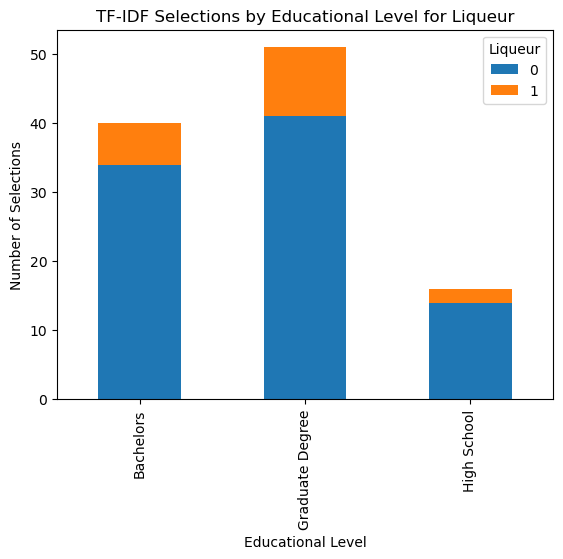


Chi-Square Test for Sardines (TF-IDF) by Educational Level:
Chi-Square Statistic: 0.6364805893621809
p-value: 0.7274279703393608
Degrees of Freedom: 2
Expected frequencies:
[[32.52336449  7.47663551]
 [41.46728972  9.53271028]
 [13.00934579  2.99065421]]


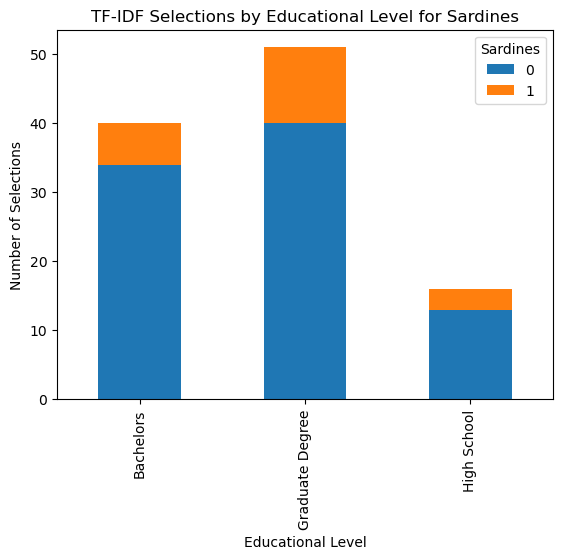


Chi-Square Test for Oat Milk (TF-IDF) by Educational Level:
Chi-Square Statistic: 5.655405296139074
p-value: 0.059148582811854915
Degrees of Freedom: 2
Expected frequencies:
[[36.26168224  3.73831776]
 [46.23364486  4.76635514]
 [14.5046729   1.4953271 ]]


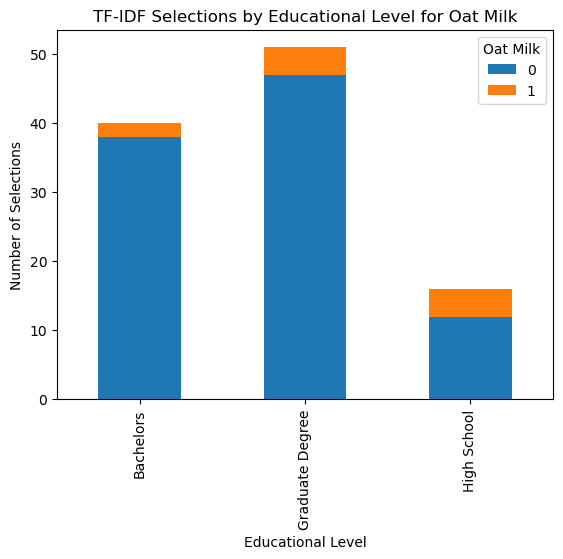


Chi-Square Test for Hot Dog Bread (TF-IDF) by Educational Level:
Chi-Square Statistic: 2.1941174940637924
p-value: 0.3338515830023913
Degrees of Freedom: 2
Expected frequencies:
[[33.27102804  6.72897196]
 [42.42056075  8.57943925]
 [13.30841121  2.69158879]]


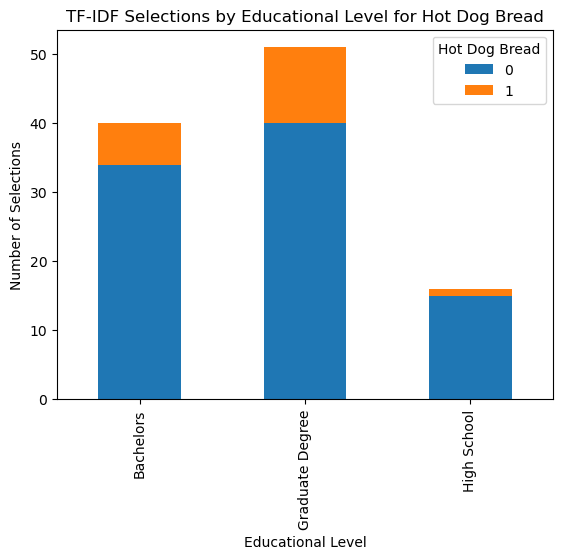

In [60]:
# Perform Chi-Square tests 
for item in df_tfidf_selection.columns[3:]:
    contingency_table = pd.crosstab(df_tfidf_selection['Educational Level'], df_tfidf_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (TF-IDF) by Educational Level:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'TF-IDF Selections by Educational Level for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Educational Level')
    plt.show()


Chi-Square Test for Freezer Bags (BERT) by Educational Level:
Chi-Square Statistic: 1.0940452988424287
p-value: 0.5786701519915518
Degrees of Freedom: 2
Expected frequencies:
[[31.02803738  8.97196262]
 [39.56074766 11.43925234]
 [12.41121495  3.58878505]]


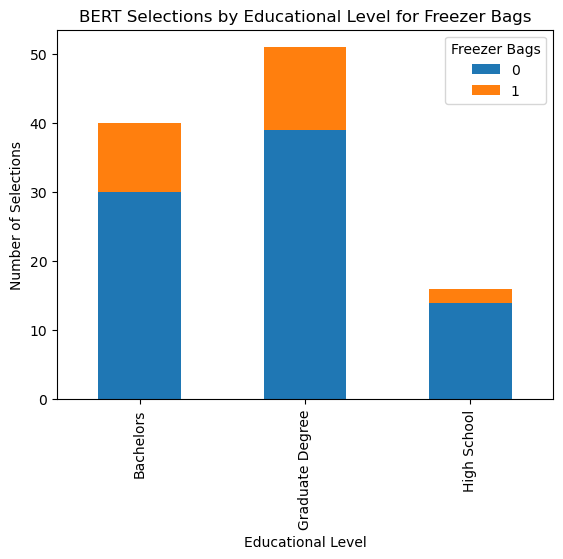


Chi-Square Test for Cheese (BERT) by Educational Level:
Chi-Square Statistic: 0.54406489769821
p-value: 0.7618295401969639
Degrees of Freedom: 2
Expected frequencies:
[[34.39252336  5.60747664]
 [43.85046729  7.14953271]
 [13.75700935  2.24299065]]


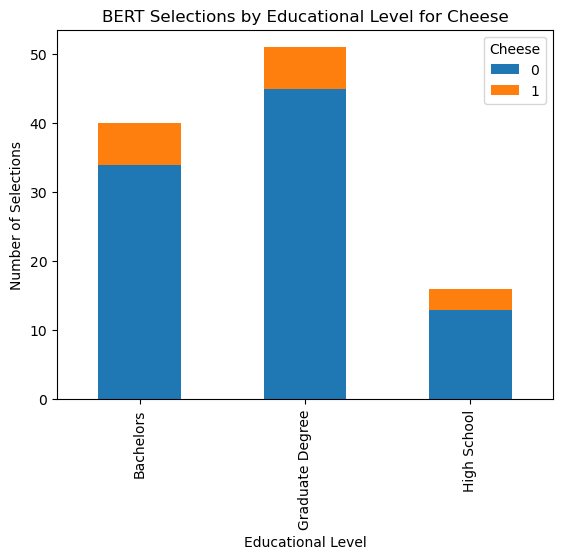


Chi-Square Test for Oil (BERT) by Educational Level:
Chi-Square Statistic: 1.6922726034858386
p-value: 0.4290695286492008
Degrees of Freedom: 2
Expected frequencies:
[[37.00934579  2.99065421]
 [47.18691589  3.81308411]
 [14.80373832  1.19626168]]


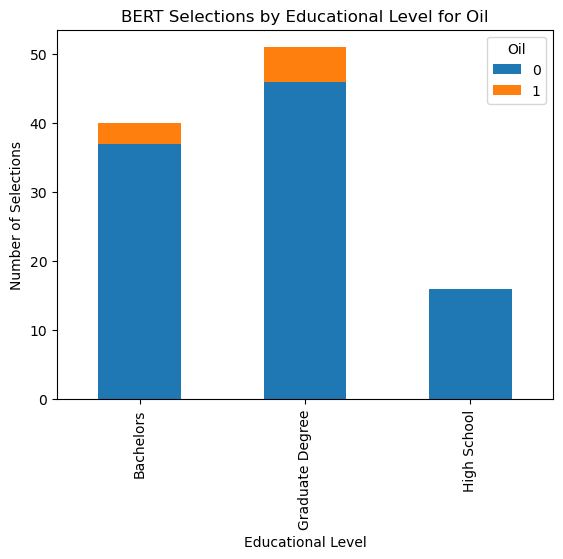


Chi-Square Test for Baking Powder (BERT) by Educational Level:
Chi-Square Statistic: 2.1462354515449595
p-value: 0.3419407762507384
Degrees of Freedom: 2
Expected frequencies:
[[32.14953271  7.85046729]
 [40.99065421 10.00934579]
 [12.85981308  3.14018692]]


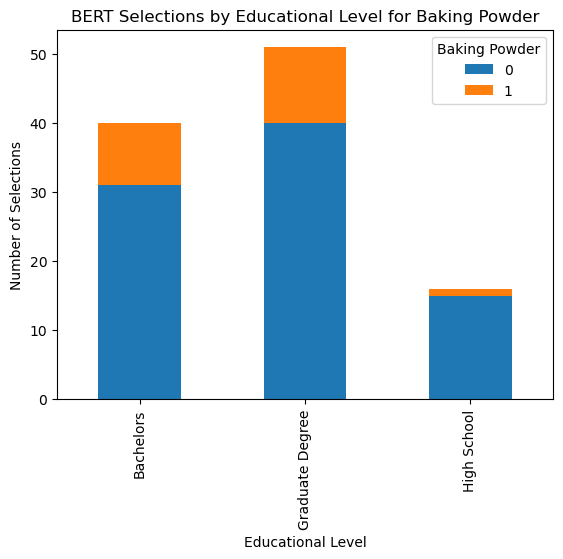


Chi-Square Test for Lomo (BERT) by Educational Level:
Chi-Square Statistic: 0.19485079119367077
p-value: 0.9071700179090483
Degrees of Freedom: 2
Expected frequencies:
[[35.51401869  4.48598131]
 [45.28037383  5.71962617]
 [14.20560748  1.79439252]]


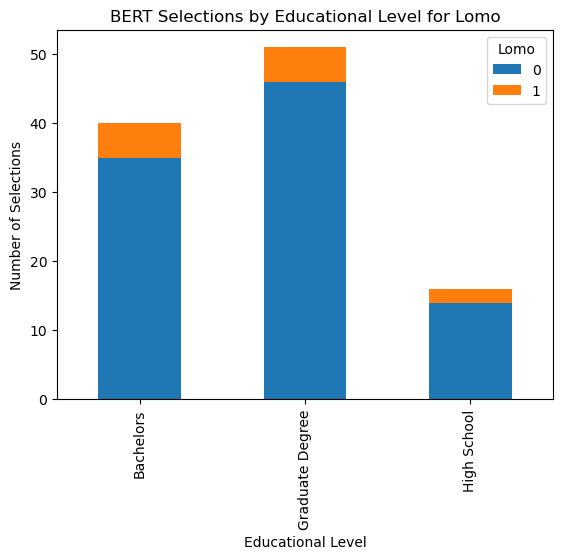


Chi-Square Test for Liqueur (BERT) by Educational Level:
Chi-Square Statistic: 1.2178832845355338
p-value: 0.5439262330848685
Degrees of Freedom: 2
Expected frequencies:
[[25.42056075 14.57943925]
 [32.41121495 18.58878505]
 [10.1682243   5.8317757 ]]


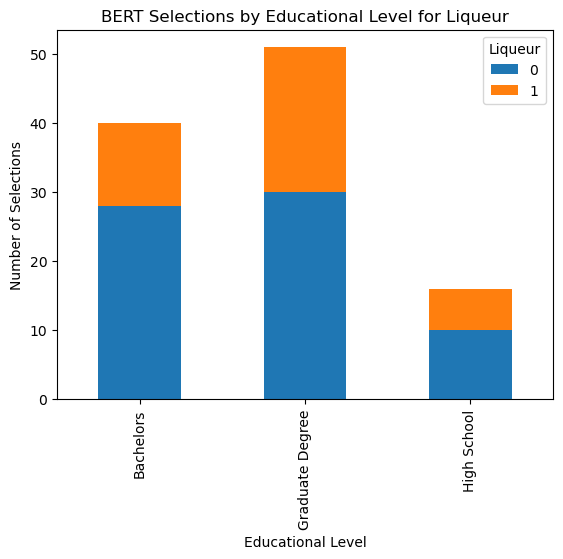


Chi-Square Test for Sardines (BERT) by Educational Level:
Chi-Square Statistic: 2.0001861549497844
p-value: 0.36784520147549027
Degrees of Freedom: 2
Expected frequencies:
[[30.65420561  9.34579439]
 [39.08411215 11.91588785]
 [12.26168224  3.73831776]]


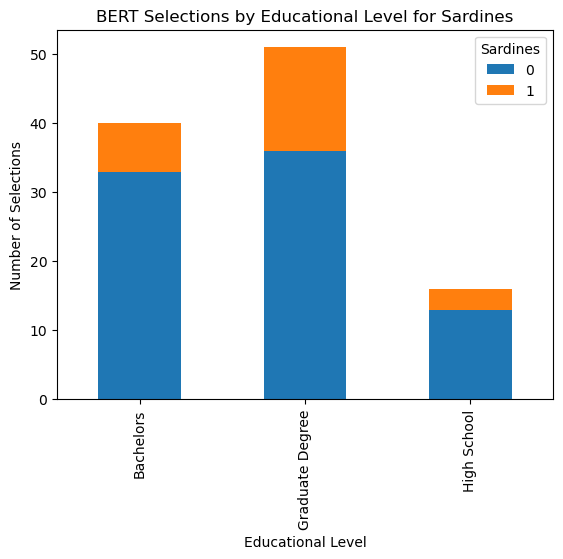


Chi-Square Test for Oat Milk (BERT) by Educational Level:
Chi-Square Statistic: 0.10171237413884492
p-value: 0.9504153427202799
Degrees of Freedom: 2
Expected frequencies:
[[27.6635514  12.3364486 ]
 [35.27102804 15.72897196]
 [11.06542056  4.93457944]]


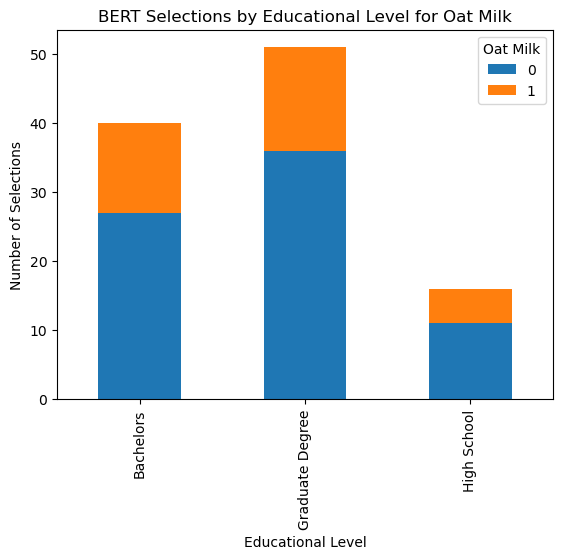


Chi-Square Test for Hot Dog Bread (BERT) by Educational Level:
Chi-Square Statistic: 2.5640592750257998
p-value: 0.27747355780834354
Degrees of Freedom: 2
Expected frequencies:
[[32.89719626  7.10280374]
 [41.94392523  9.05607477]
 [13.1588785   2.8411215 ]]


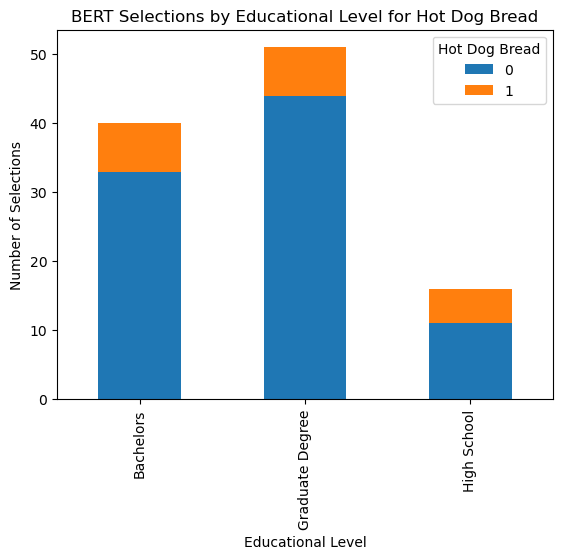

In [61]:
# Perform Chi-Square tests 
for item in df_bert_selection.columns[3:]:
    contingency_table = pd.crosstab(df_bert_selection['Educational Level'], df_bert_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (BERT) by Educational Level:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'BERT Selections by Educational Level for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Educational Level')
    plt.show()


Chi-Square Test for Freezer Bags (Hybrid) by Educational Level:
Chi-Square Statistic: 1.0940452988424287
p-value: 0.5786701519915518
Degrees of Freedom: 2
Expected frequencies:
[[31.02803738  8.97196262]
 [39.56074766 11.43925234]
 [12.41121495  3.58878505]]


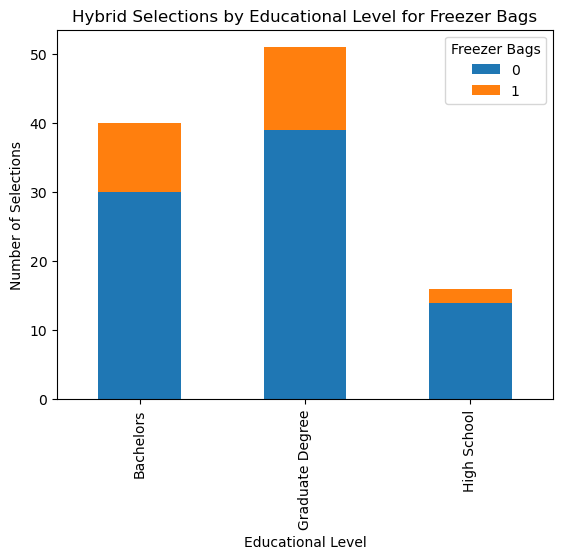


Chi-Square Test for Cheese (Hybrid) by Educational Level:
Chi-Square Statistic: 2.1498731257208767
p-value: 0.34131940694108054
Degrees of Freedom: 2
Expected frequencies:
[[33.64485981  6.35514019]
 [42.89719626  8.10280374]
 [13.45794393  2.54205607]]


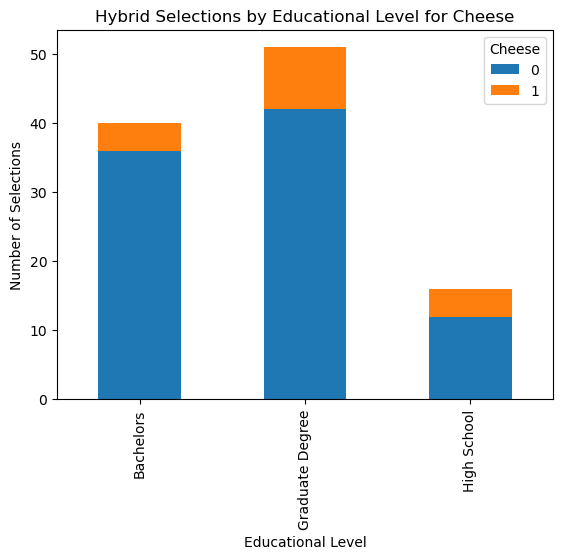


Chi-Square Test for Oil (Hybrid) by Educational Level:
Chi-Square Statistic: 0.04764730149485531
p-value: 0.976457892194798
Degrees of Freedom: 2
Expected frequencies:
[[37.75700935  2.24299065]
 [48.14018692  2.85981308]
 [15.10280374  0.89719626]]


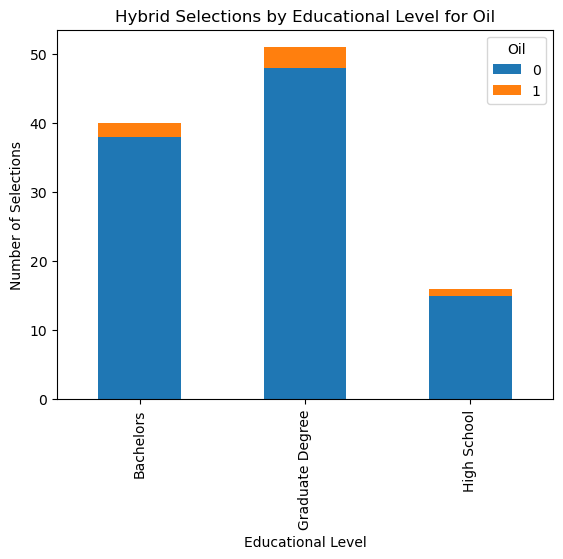


Chi-Square Test for Baking Powder (Hybrid) by Educational Level:
Chi-Square Statistic: 3.53937105589362
p-value: 0.1703865622133565
Degrees of Freedom: 2
Expected frequencies:
[[32.52336449  7.47663551]
 [41.46728972  9.53271028]
 [13.00934579  2.99065421]]


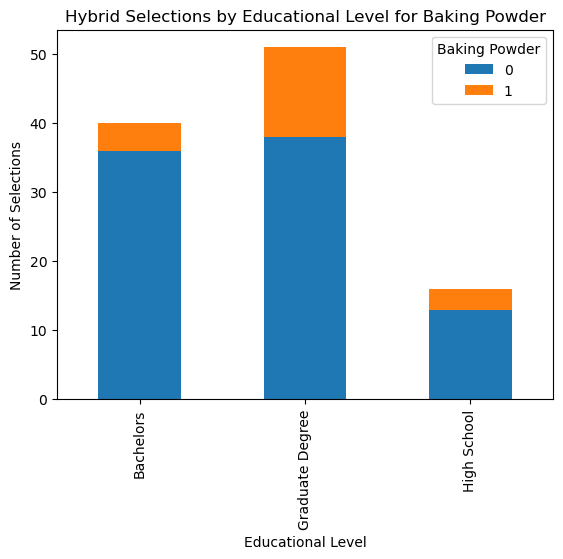


Chi-Square Test for Lomo (Hybrid) by Educational Level:
Chi-Square Statistic: 2.815055277430121
p-value: 0.2447476403414927
Degrees of Freedom: 2
Expected frequencies:
[[35.14018692  4.85981308]
 [44.80373832  6.19626168]
 [14.05607477  1.94392523]]


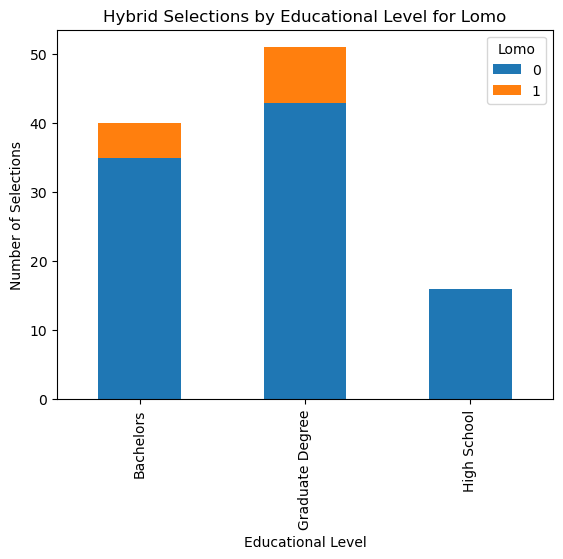


Chi-Square Test for Liqueur (Hybrid) by Educational Level:
Chi-Square Statistic: 1.2178832845355338
p-value: 0.5439262330848685
Degrees of Freedom: 2
Expected frequencies:
[[25.42056075 14.57943925]
 [32.41121495 18.58878505]
 [10.1682243   5.8317757 ]]


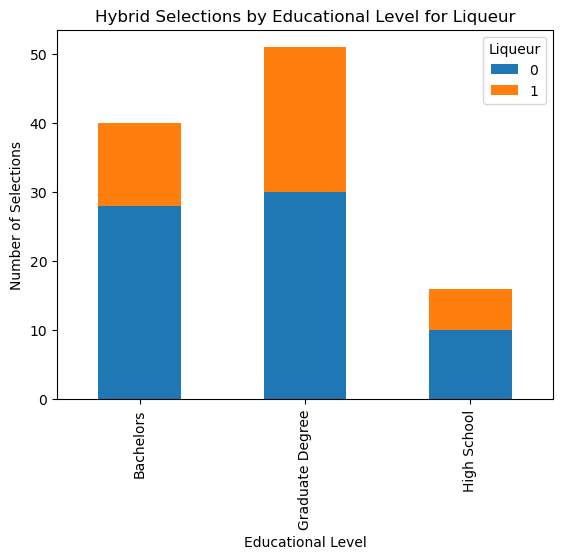


Chi-Square Test for Sardines (Hybrid) by Educational Level:
Chi-Square Statistic: 2.0001861549497844
p-value: 0.36784520147549027
Degrees of Freedom: 2
Expected frequencies:
[[30.65420561  9.34579439]
 [39.08411215 11.91588785]
 [12.26168224  3.73831776]]


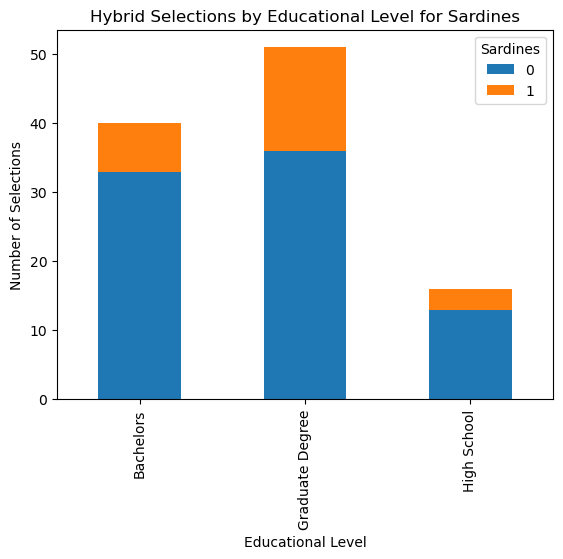


Chi-Square Test for Oat Milk (Hybrid) by Educational Level:
Chi-Square Statistic: 0.10171237413884492
p-value: 0.9504153427202799
Degrees of Freedom: 2
Expected frequencies:
[[27.6635514  12.3364486 ]
 [35.27102804 15.72897196]
 [11.06542056  4.93457944]]


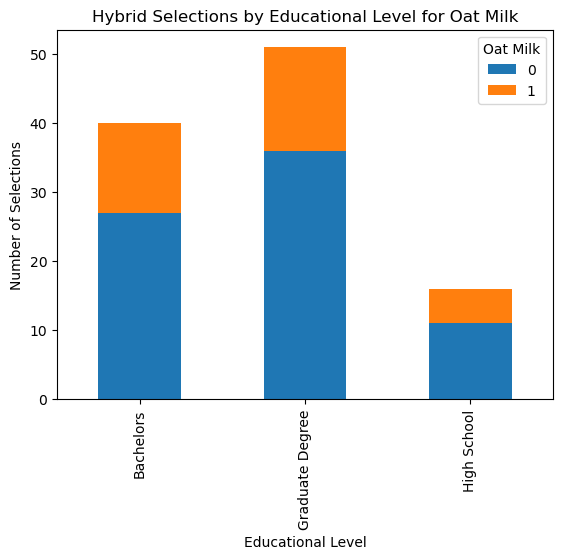


Chi-Square Test for Hot Dog Bread (Hybrid) by Educational Level:
Chi-Square Statistic: 2.5640592750257998
p-value: 0.27747355780834354
Degrees of Freedom: 2
Expected frequencies:
[[32.89719626  7.10280374]
 [41.94392523  9.05607477]
 [13.1588785   2.8411215 ]]


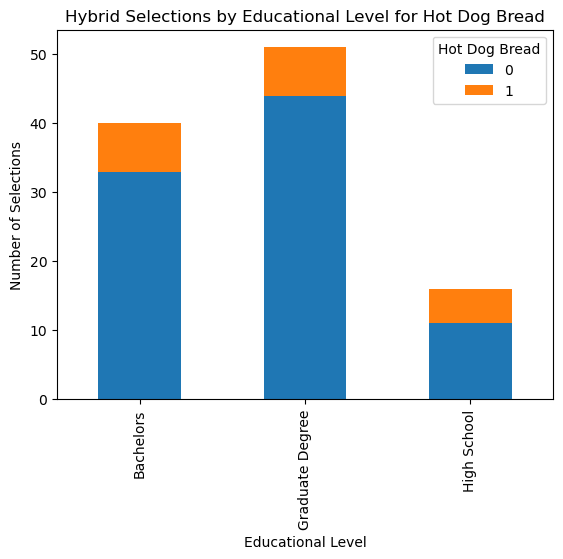

In [62]:
# Perform Chi-Square tests
for item in df_hybrid_selection.columns[3:]:
    contingency_table = pd.crosstab(df_hybrid_selection['Educational Level'], df_hybrid_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Hybrid) by Educational Level:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Hybrid Selections by Educational Level for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Educational Level')
    plt.show()


Chi-Square Test for Freezer Bags (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 0.84523783587509
p-value: 0.655328319400844
Degrees of Freedom: 2
Expected frequencies:
[[10.09345794 29.90654206]
 [12.86915888 38.13084112]
 [ 4.03738318 11.96261682]]


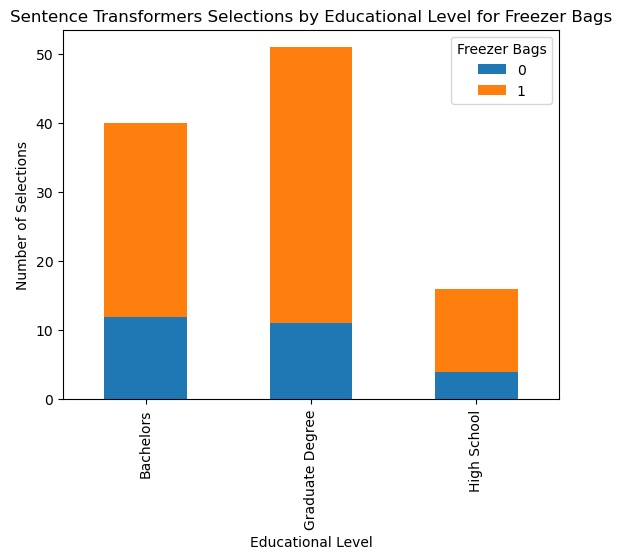


Chi-Square Test for Cheese (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 2.1115063593004764
p-value: 0.347930274592021
Degrees of Freedom: 2
Expected frequencies:
[[27.6635514  12.3364486 ]
 [35.27102804 15.72897196]
 [11.06542056  4.93457944]]


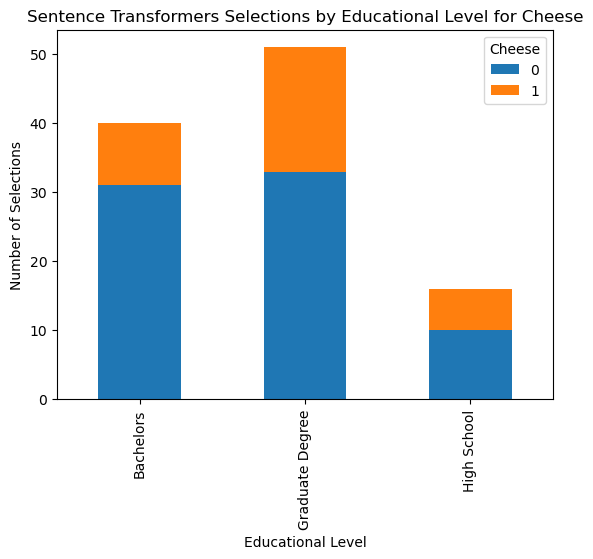


Chi-Square Test for Oil (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 1.000798545224542
p-value: 0.6062885369714137
Degrees of Freedom: 2
Expected frequencies:
[[16.82242991 23.17757009]
 [21.44859813 29.55140187]
 [ 6.72897196  9.27102804]]


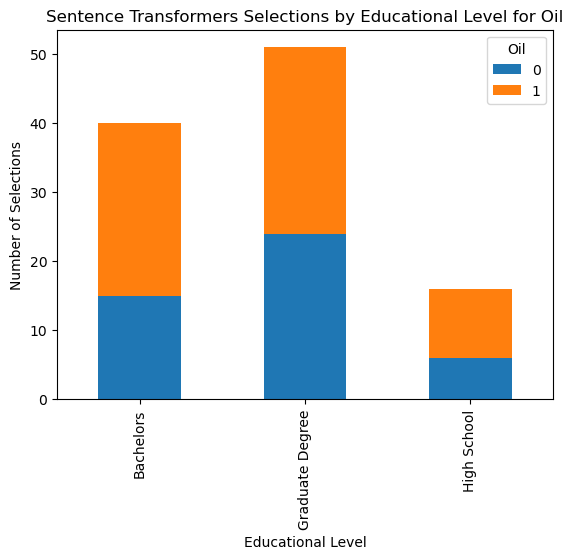


Chi-Square Test for Baking Powder (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 5.792990710270121
p-value: 0.0552163952094611
Degrees of Freedom: 2
Expected frequencies:
[[19.43925234 20.56074766]
 [24.78504673 26.21495327]
 [ 7.77570093  8.22429907]]


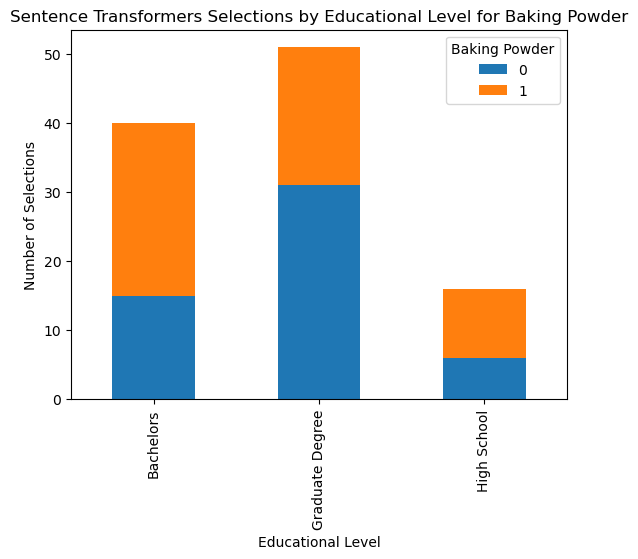


Chi-Square Test for Lomo (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 0.11269440930494061
p-value: 0.9452108972896045
Degrees of Freedom: 2
Expected frequencies:
[[16.82242991 23.17757009]
 [21.44859813 29.55140187]
 [ 6.72897196  9.27102804]]


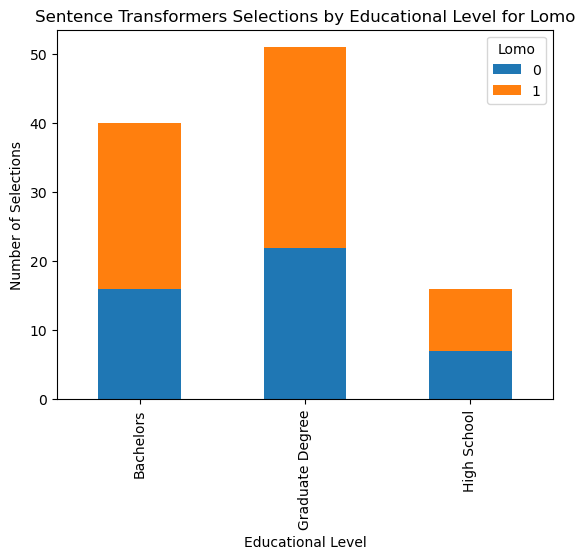


Chi-Square Test for Liqueur (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 0.20903380796763146
p-value: 0.9007595708529812
Degrees of Freedom: 2
Expected frequencies:
[[26.91588785 13.08411215]
 [34.31775701 16.68224299]
 [10.76635514  5.23364486]]


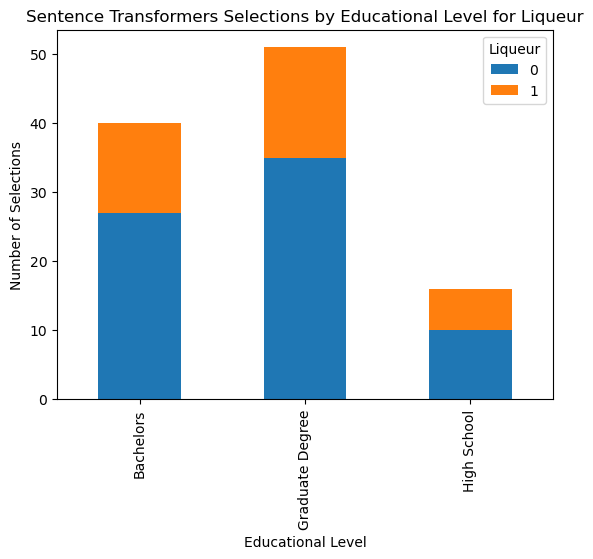


Chi-Square Test for Sardines (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 0.44545755330789955
p-value: 0.8003318885529308
Degrees of Freedom: 2
Expected frequencies:
[[14.57943925 25.42056075]
 [18.58878505 32.41121495]
 [ 5.8317757  10.1682243 ]]


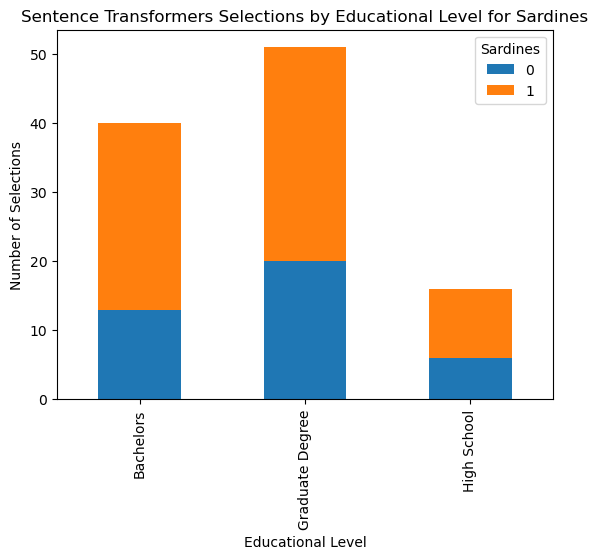


Chi-Square Test for Oat Milk (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 0.3038437534562576
p-value: 0.8590553903374905
Degrees of Freedom: 2
Expected frequencies:
[[12.71028037 27.28971963]
 [16.20560748 34.79439252]
 [ 5.08411215 10.91588785]]


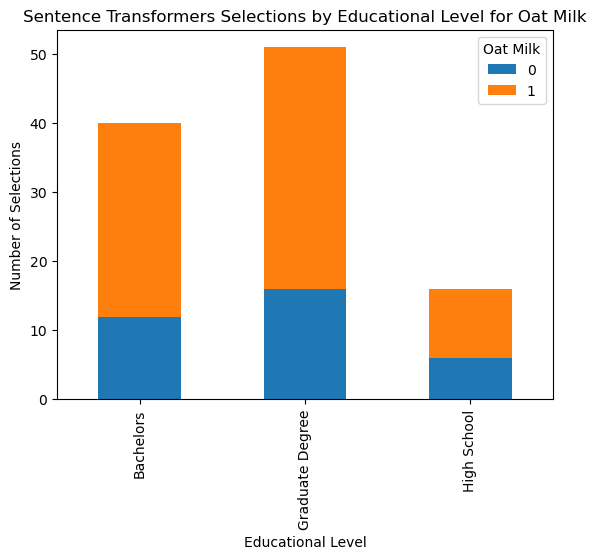


Chi-Square Test for Hot Dog Bread (Sentence Transformers) by Educational Level:
Chi-Square Statistic: 1.0320924567881973
p-value: 0.5968757994268834
Degrees of Freedom: 2
Expected frequencies:
[[10.8411215  29.1588785 ]
 [13.82242991 37.17757009]
 [ 4.3364486  11.6635514 ]]


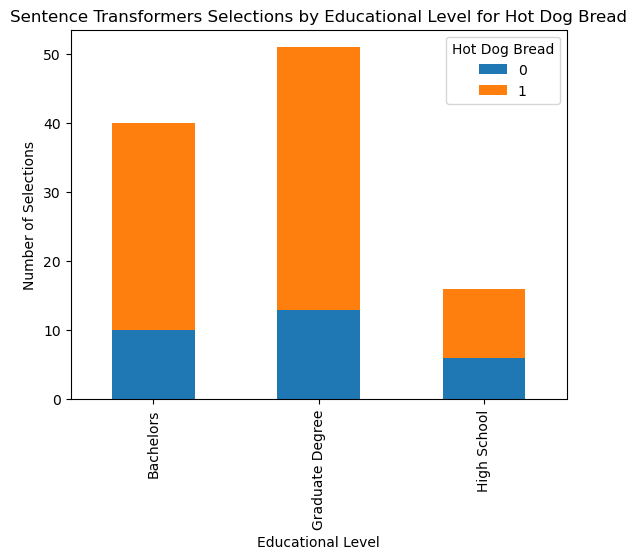

In [63]:
# Perform Chi-Square tests 
for item in df_sentence_transformers_selection.columns[3:]:
    contingency_table = pd.crosstab(df_sentence_transformers_selection['Educational Level'], df_sentence_transformers_selection[item])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {item} (Sentence Transformers) by Educational Level:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Sentence Transformers Selections by Educational Level for {item}')
    plt.ylabel('Number of Selections')
    plt.xlabel('Educational Level')
    plt.show()

No statistical significance between educational levels.